# Economic Freedom of the United States: Freedom in the 50 States (Cato)

In [1]:
import pandas as pd
# https://www.freedominthe50states.org/data
US_econ_freedom_data = pd.read_excel("Freedom_In_The_50_States_2018.xlsx", sheet_name="Overall",
                                    index_col = [0,1])
US_econ_freedom_data

Fiscal Policy  fprank  Regulatory Policy  rprank  \
State         Year                                                     
Alabama       2000       0.096488      17           0.090010      22   
Alaska        2000      -0.159121      47           0.098684      19   
Arizona       2000      -0.012769      27           0.187897       4   
Arkansas      2000       0.048997      19           0.053662      28   
California    2000      -0.042848      36          -0.286139      49   
...                           ...     ...                ...     ...   
Virginia      2016       0.174784      11          -0.023090      20   
Washington    2016       0.054967      28          -0.235243      42   
West Virginia 2016      -0.054446      39          -0.089242      29   
Wisconsin     2016       0.015428      35           0.006799      11   
Wyoming       2016      -0.074057      43           0.030743       6   

                    Personal Freedom  pfrank  Economic Freedom  efrank  \
State         Year                                                       
Alabama       2000         -0.132791      49          0.186498      12   
Alaska        2000          0.077046       6         -0.060437      38   
Arizona       2000         -0.035137      30          0.175128      14   
Arkansas      2000         -0.064302      38          0.102659      23   
California    2000          0.000384      19         -0.328987      49   
...                              ...     ...               ...     ...   
Virginia      2016          0.021430      38          0.151694       8   
Washington    2016          0.154595       8         -0.180276      41   
West Virginia 2016          0.124610      12         -0.143688      39   
Wisconsin     2016          0.052106      29          0.022226      24   
Wyoming       2016          0.004736      42         -0.043314      33   

                    Overall Freedom  ofrank  ...  Overall, non-federalized  \
State         Year                           ...                             
Alabama       2000         0.053707      23  ...                  0.005474   
Alaska        2000         0.016609      32  ...                 -0.046676   
Arizona       2000         0.139991      15  ...                  0.089842   
Arkansas      2000         0.038357      28  ...                  0.020832   
California    2000        -0.328602      49  ...                 -0.343046   
...                             ...     ...  ...                       ...   
Virginia      2016         0.173125      13  ...                  0.233509   
Washington    2016        -0.025681      36  ...                  0.034746   
West Virginia 2016        -0.019077      34  ...                  0.041307   
Wisconsin     2016         0.074332      24  ...                  0.134759   
Wyoming       2016        -0.038578      38  ...                  0.009917   

                    Personal, Pro-Life Overall, Pro-Life  \
State         Year                                         
Alabama       2000           -0.175446          0.011052   
Alaska        2000           -0.180054         -0.240491   
Arizona       2000           -0.332204         -0.157076   
Arkansas      2000           -0.141825         -0.039166   
California    2000           -0.246620         -0.575607   
...                                ...               ...   
Virginia      2016            0.114430          0.266124   
Washington    2016           -0.142887         -0.323163   
West Virginia 2016           -0.038264         -0.181952   
Wisconsin     2016            0.074724          0.096951   
Wyoming       2016           -0.038742         -0.082056   

                    Overall, Pro-Life, no RTW  Personal, Moderate Pro-Choice  \
State         Year                                                             
Alabama       2000                  -0.015751                      -0.127713   
Alaska        2000                  -0.218087                       0.063767   
Ariz

# Saving Kauffman Micro Data

In [2]:
import requests
import time
import random
years = [str(i)[-2:] for i in range(96, 121)]

downloads_dct = {}
for year in years:
    # on average should take 5 seconds 
        # drawn from uniform distribution [2,8]
#    time.sleep(1)# + random.random() * 3)
# https://www.kauffman.org/historical-kauffman-index/microdata/
# Available at: https://people.ucsc.edu/~rfairlie/data/microdata/        
    file = "https://people.ucsc.edu/~rfairlie/data/microdata/kieadata"+year + ".csv"    
    downloads_dct[year] = pd.read_csv(file)
downloads_dct

{'96':         month  grdatn  marstat  age  class  region  state  hours  mlr  natvty  \
 0          12      43        1   44      4       2     47     48    1     555   
 1          12      40        1   52      4       2     47     40    1      57   
 2          12      44        1   57      3       2     46     40    1      57   
 3          12      40        1   52      4       2     46     40    1      57   
 4          12      39        4   52      4       3     56     48    1      57   
 ...       ...     ...      ...  ...    ...     ...    ...    ...  ...     ...   
 595838     11      40        1   59      4       1     15     40    1      57   
 595839     11      39        7   25      4       1     15     40    1      57   
 595840     11      41        7   30      4       1     15     55    1      57   
 595841     11      39        1   45      3       2     43    114    1      57   
 595842     11      39        1   41      4       2     43     40    1      57   
 
        

# Download Aggregate Kauffman Data, save as files

This time we will download files instead of saving them in a dictionary. Each header is in a different row, so it will be easier if we work with these files one at a time.

In [3]:
files = ["bedvars9618.xlsx", "entage9618.xlsx", "enteducation9618.xlsx", 
         "entimmigrant9618.xlsx", "entrace9618.xlsx",
         "entsex9618.xlsx",
         "entveteran9618.xlsx",
         "oppshareage9618.xlsx",
         "oppshareeducation9618.xlsx",
         "oppshareimmigrant9618.xlsx",
         "oppsharerace9618.xlsx",
         "oppsharesex9618.xlsx",
         "oppsharetotal9618.xlsx",
         "oppshareveteran9618.xlsx",
         "zsummaryindexcpsbed9618.xlsx"]
directory = 'https://people.ucsc.edu/~rfairlie/data/kauffmanindicators/'
agg_kauffman = {}
for file in files:
    url = directory + file
    response = requests.get(url)
    file = open(file, "wb")
    file.write(response.content)
    file.close()


# State Level Kauffman Data

In [4]:
url = "https://indicators.kauffman.org/wp-content/uploads/sites/2/2021/04/Kauffman_Indicators_New_Employer_Business_Data_April_2021.csv"
state_kauffman_data = pd.read_csv(url, index_col = [1,4])

# Drop rows with null values from index column 

In [5]:
state_kauffman_data = state_kauffman_data.loc[state_kauffman_data["index"].dropna(axis = 0).index]
state_kauffman_data.rename(columns = {column:"Kauffman: " + column for column in state_kauffman_data.keys()}, inplace = True)
state_kauffman_data

Kauffman: fips Kauffman: type Kauffman: category  \
name          year                                                     
Alabama       2005               1          Total              Total   
              2006               1          Total              Total   
              2007               1          Total              Total   
              2008               1          Total              Total   
              2009               1          Total              Total   
...                            ...            ...                ...   
United States 2012               0          Total              Total   
              2013               0          Total              Total   
              2014               0          Total              Total   
              2015               0          Total              Total   
              2016               0          Total              Total   

                    Kauffman: actualization  Kauffman: bf_per_capita  \
name          year                                                     
Alabama       2005                 0.204772                 0.140859   
              2006                 0.170335                 0.125060   
              2007                 0.150445                 0.109163   
              2008                 0.124713                 0.083973   
              2009                 0.121517                 0.075432   
...                                     ...                      ...   
United States 2012                 0.127038                 0.104281   
              2013                 0.128247                 0.105978   
              2014                 0.126627                 0.106081   
              2015                 0.123199                 0.108456   
              2016                 0.116346                 0.107188   

                    Kauffman: velocity  Kauffman: newness  Kauffman: index  
name          year                                                          
Alabama       2005            1.171631                NaN         1.037311  
              2006            1.194260           0.087601         0.981797  
              2007            1.245213           0.075281         0.939951  
              2008            1.299593           0.065143         0.887913  
              2009            1.386808           0.053535         0.862967  
...                                ...                ...              ...  
United States 2012            1.750222           0.064155         0.781846  
              2013            1.876766           0.065105         0.749732  
              2014            1.943557           0.065887         0.729231  
              2015            1.984098           0.066898         0.713536  
              2016            2.009712           0.066333         0.697700  

[473 rows x 8 columns]

# Merge Kauffman and ECON Freeedom Data

In [6]:
for key in US_econ_freedom_data:
    state_kauffman_data[key] = US_econ_freedom_data[key]
all_data = state_kauffman_data
all_data[["Kauffman: index", "Economic Freedom"]].corr()

Kauffman: index  Economic Freedom
Kauffman: index          1.000000          0.117998
Economic Freedom         0.117998          1.000000

# Add State GDP

In [7]:
# https://apps.bea.gov/itable/iTable.cfm?ReqID=70&step=1&acrdn=1
measures = ["Real GDP (millions of chained 2012 dollars)", "Chain-type quantity indexes for real GDP", "Current-dollar GDP (millions of current dollars)"]
state_GDP = pd.read_excel("stateGDP.xls", header = [5], parse_dates = True).dropna(axis = 0)
# take quarterly average to generate annual GDP
years = [i for i in range(2005,2021)]
for year in years:
    cols = [str(year)+":Q" + str(i) for i in range(1,5)]
    state_GDP[year] = state_GDP[cols].mean(axis = 1)
    
panel_GDP = state_GDP.melt(id_vars=['GeoName', "Description"], 
               value_vars=years).rename(columns={"variable":"Date"}).set_index(["GeoName", "Date"])
GDP_dct = {}
for measure in  measures:
    GDP_dct[measure] = panel_GDP[panel_GDP["Description"] == measure]
    print(GDP_dct[measure])

                                                     Description         value
GeoName        Date                                                           
United States  2005  Real GDP (millions of chained 2012 dollars)  1.491251e+07
Alabama        2005  Real GDP (millions of chained 2012 dollars)  1.818710e+05
Alaska         2005  Real GDP (millions of chained 2012 dollars)  4.506468e+04
Arizona        2005  Real GDP (millions of chained 2012 dollars)  2.630474e+05
Arkansas       2005  Real GDP (millions of chained 2012 dollars)  1.047586e+05
...                                                          ...           ...
Plains         2020  Real GDP (millions of chained 2012 dollars)  1.144542e+06
Southeast      2020  Real GDP (millions of chained 2012 dollars)  3.854787e+06
Southwest      2020  Real GDP (millions of chained 2012 dollars)  2.307730e+06
Rocky Mountain 2020  Real GDP (millions of chained 2012 dollars)  6.778264e+05
Far West       2020  Real GDP (millions of chained 2

In [8]:
real_GDP_name = measures[0]
all_data["Real GDP"] = GDP_dct[real_GDP_name]["value"]
all_data

Kauffman: fips Kauffman: type Kauffman: category  \
name          year                                                     
Alabama       2005               1          Total              Total   
              2006               1          Total              Total   
              2007               1          Total              Total   
              2008               1          Total              Total   
              2009               1          Total              Total   
...                            ...            ...                ...   
United States 2012               0          Total              Total   
              2013               0          Total              Total   
              2014               0          Total              Total   
              2015               0          Total              Total   
              2016               0          Total              Total   

                    Kauffman: actualization  Kauffman: bf_per_capita  \
name          year                                                     
Alabama       2005                 0.204772                 0.140859   
              2006                 0.170335                 0.125060   
              2007                 0.150445                 0.109163   
              2008                 0.124713                 0.083973   
              2009                 0.121517                 0.075432   
...                                     ...                      ...   
United States 2012                 0.127038                 0.104281   
              2013                 0.128247                 0.105978   
              2014                 0.126627                 0.106081   
              2015                 0.123199                 0.108456   
              2016                 0.116346                 0.107188   

                    Kauffman: velocity  Kauffman: newness  Kauffman: index  \
name          year                                                           
Alabama       2005            1.171631                NaN         1.037311   
              2006            1.194260           0.087601         0.981797   
              2007            1.245213           0.075281         0.939951   
              2008            1.299593           0.065143         0.887913   
              2009            1.386808           0.053535         0.862967   
...                                ...                ...              ...   
United States 2012            1.750222           0.064155         0.781846   
              2013            1.876766           0.065105         0.749732   
              2014            1.943557           0.065887         0.729231   
              2015            1.984098           0.066898         0.713536   
              2016            2.009712           0.066333         0.697700   

                    Fiscal Policy  fprank  ...  Personal, Pro-Life  \
name          year                         ...                       
Alabama       2005       0.075023    13.0  ...           -0.098480   
              2006       0.084349    14.0  ...           -0.081440   
              2007       0.050676    16.0  ...           -0.090925   
              2008       0.061741    15.0  ...           -0.092429   
              2009       0.042556    16.0  ...           -0.088359   
...                           ...     ...  ...                 ...   
United States 2012            NaN     NaN  ...                 NaN   
              2013            NaN     NaN  ...                 NaN   
              2014            NaN     NaN  ...                 NaN   
              2015            NaN     NaN  ...                 NaN   
              2016            NaN     NaN  ...                 NaN   

                    Overall, Pro-Life  Overall, Pro-Life, no RTW  \
name          year                                                 
Alabama       2005           0.082226                   0.055423   
              20

# Population Data

In [9]:
import numpy as np
#https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html
population = pd.read_csv("statePopulation.csv")
years = [year for year in range(2010, 2020)]
keys = ["POPESTIMATE" + str(year) for year in years]
states = sorted(list(set(all_data.index.get_level_values("name"))))
population = population.rename(columns = {"POPESTIMATE" + str(year):year for year in years})
population = population[population["NAME"].isin(states)]
population = population.melt(id_vars=['NAME'], 
               value_vars=years).rename(columns={"variable":"year"}).set_index(["NAME", "year"])
all_data["Population"] = population["value"]
all_data["Real GDP per Capita"] = all_data["Real GDP"].div(all_data["Population"]).mul(10**6)
all_data

Kauffman: fips Kauffman: type Kauffman: category  \
name          year                                                     
Alabama       2005               1          Total              Total   
              2006               1          Total              Total   
              2007               1          Total              Total   
              2008               1          Total              Total   
              2009               1          Total              Total   
...                            ...            ...                ...   
United States 2012               0          Total              Total   
              2013               0          Total              Total   
              2014               0          Total              Total   
              2015               0          Total              Total   
              2016               0          Total              Total   

                    Kauffman: actualization  Kauffman: bf_per_capita  \
name          year                                                     
Alabama       2005                 0.204772                 0.140859   
              2006                 0.170335                 0.125060   
              2007                 0.150445                 0.109163   
              2008                 0.124713                 0.083973   
              2009                 0.121517                 0.075432   
...                                     ...                      ...   
United States 2012                 0.127038                 0.104281   
              2013                 0.128247                 0.105978   
              2014                 0.126627                 0.106081   
              2015                 0.123199                 0.108456   
              2016                 0.116346                 0.107188   

                    Kauffman: velocity  Kauffman: newness  Kauffman: index  \
name          year                                                           
Alabama       2005            1.171631                NaN         1.037311   
              2006            1.194260           0.087601         0.981797   
              2007            1.245213           0.075281         0.939951   
              2008            1.299593           0.065143         0.887913   
              2009            1.386808           0.053535         0.862967   
...                                ...                ...              ...   
United States 2012            1.750222           0.064155         0.781846   
              2013            1.876766           0.065105         0.749732   
              2014            1.943557           0.065887         0.729231   
              2015            1.984098           0.066898         0.713536   
              2016            2.009712           0.066333         0.697700   

                    Fiscal Policy  fprank  ...  Overall, Pro-Life, no RTW  \
name          year                         ...                              
Alabama       2005       0.075023    13.0  ...                   0.055423   
              2006       0.084349    14.0  ...                   0.083674   
              2007       0.050676    16.0  ...                   0.053698   
              2008       0.061741    15.0  ...                   0.064024   
              2009       0.042556    16.0  ...                   0.021736   
...                           ...     ...  ...                        ...   
United States 2012            NaN     NaN  ...                        NaN   
              2013            NaN     NaN  ...                        NaN   
              2014            NaN     NaN  ...                        NaN   
              2015            NaN     NaN  ...                        NaN   
              2016            NaN     NaN  ...                        NaN   

                    Personal, Moderate Pro-Choice  \
name          year                                  
Alabama       2005     

# Calculate rates of growth of Real GDP, Population, Real GDP per Capita

In [10]:
calc_rates = ["Real GDP", "Population", "Real GDP per Capita"]
for key in calc_rates:
    all_data["%d "+key] = np.nan
    all_data["%d "+key+ " Lag"] = np.nan    
    for state in states:
        all_data["%d " + key][all_data.index.get_level_values("name") == state] = all_data[key].loc[state].pct_change() 
        all_data["%d " + key + " Lag"][all_data.index.get_level_values("name") == state] = all_data[key].loc[state].diff() 

all_data
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Kauffman: fips Kauffman: type Kauffman: category  \
name          year                                                     
Alabama       2005               1          Total              Total   
              2006               1          Total              Total   
              2007               1          Total              Total   
              2008               1          Total              Total   
              2009               1          Total              Total   
...                            ...            ...                ...   
United States 2012               0          Total              Total   
              2013               0          Total              Total   
              2014               0          Total              Total   
              2015               0          Total              Total   
              2016               0          Total              Total   

                    Kauffman: actualization  Kauffman: bf_per_capita  \
name          year                                                     
Alabama       2005                 0.204772                 0.140859   
              2006                 0.170335                 0.125060   
              2007                 0.150445                 0.109163   
              2008                 0.124713                 0.083973   
              2009                 0.121517                 0.075432   
...                                     ...                      ...   
United States 2012                 0.127038                 0.104281   
              2013                 0.128247                 0.105978   
              2014                 0.126627                 0.106081   
              2015                 0.123199                 0.108456   
              2016                 0.116346                 0.107188   

                    Kauffman: velocity  Kauffman: newness  Kauffman: index  \
name          year                                                           
Alabama       2005            1.171631                NaN         1.037311   
              2006            1.194260           0.087601         0.981797   
              2007            1.245213           0.075281         0.939951   
              2008            1.299593           0.065143         0.887913   
              2009            1.386808           0.053535         0.862967   
...                                ...                ...              ...   
United States 2012            1.750222           0.064155         0.781846   
              2013            1.876766           0.065105         0.749732   
              2014            1.943557           0.065887         0.729231   
              2015            1.984098           0.066898         0.713536   
              2016            2.009712           0.066333         0.697700   

                    Fiscal Policy  fprank  ...  \
name          year                         ...   
Alabama       2005       0.075023    13.0  ...   
              2006       0.084349    14.0  ...   
              2007       0.050676    16.0  ...   
              2008       0.061741    15.0  ...   
              2009       0.042556    16.0  ...   
...                           ...     ...  ...   
United States 2012            NaN     NaN  ...   
              2013            NaN     NaN  ...   
              2014            NaN     NaN  ...   
              2015            NaN     NaN  ...   
              2016            NaN     NaN  ...   

                    Overall, Strong Pro-Choice, no RTW      Real GDP  \
name          year                                                     
Alabama       2005                           -0.016647  1.818710e+05   
              2006                           -0.011214  1.853370e+05   
              2007                           -0.041190  1.864995e+05   
              2008                           -0.030864  1.852806e+05   
              2009                           -0.

# A First Look at the Data

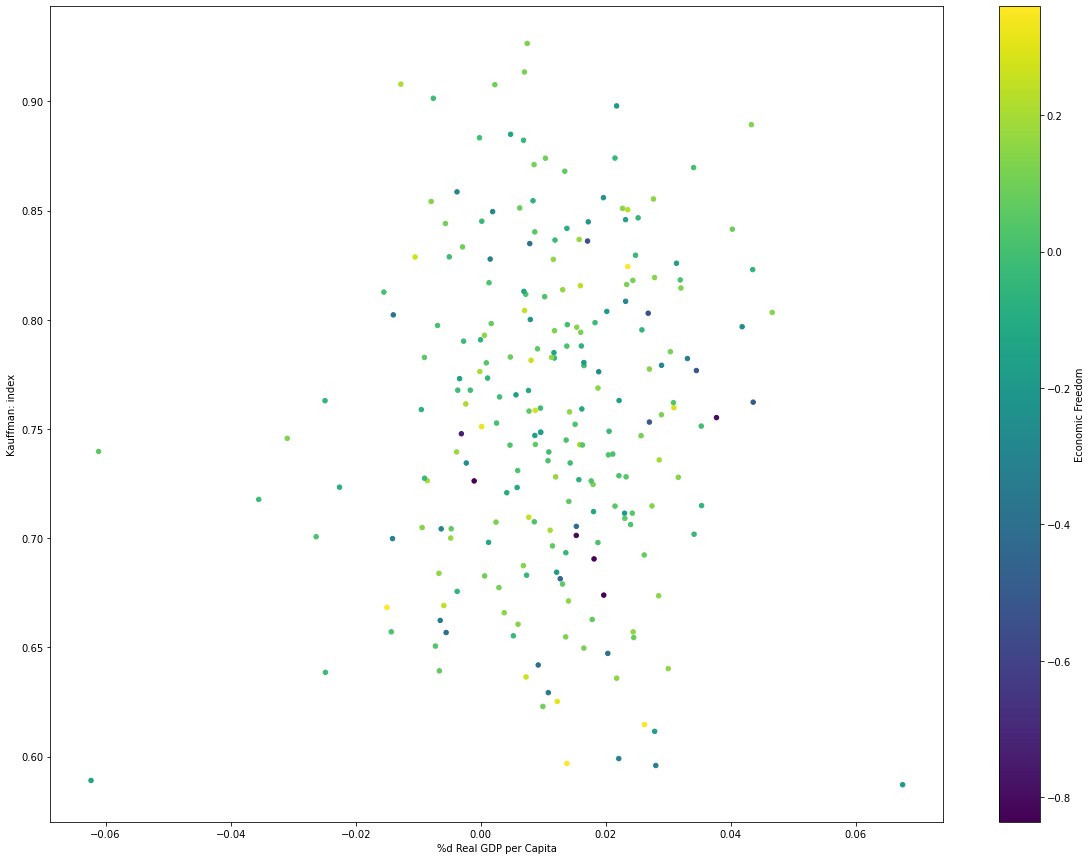

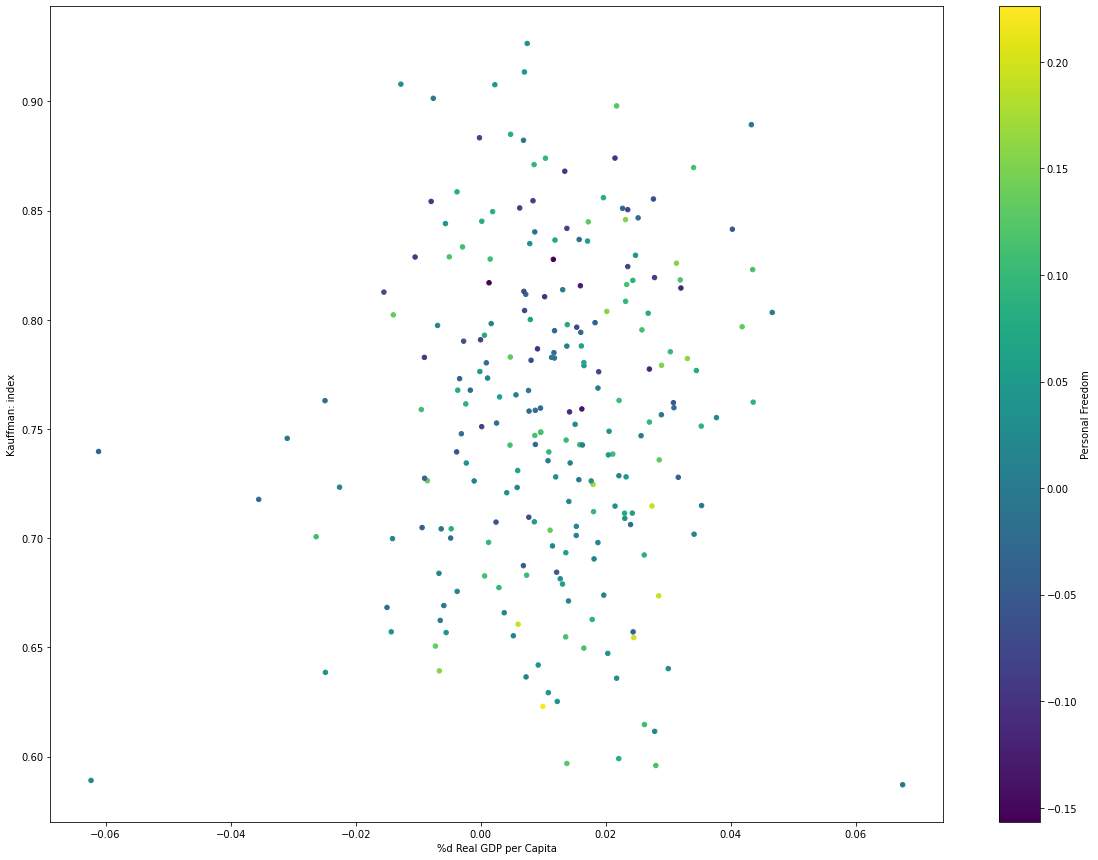

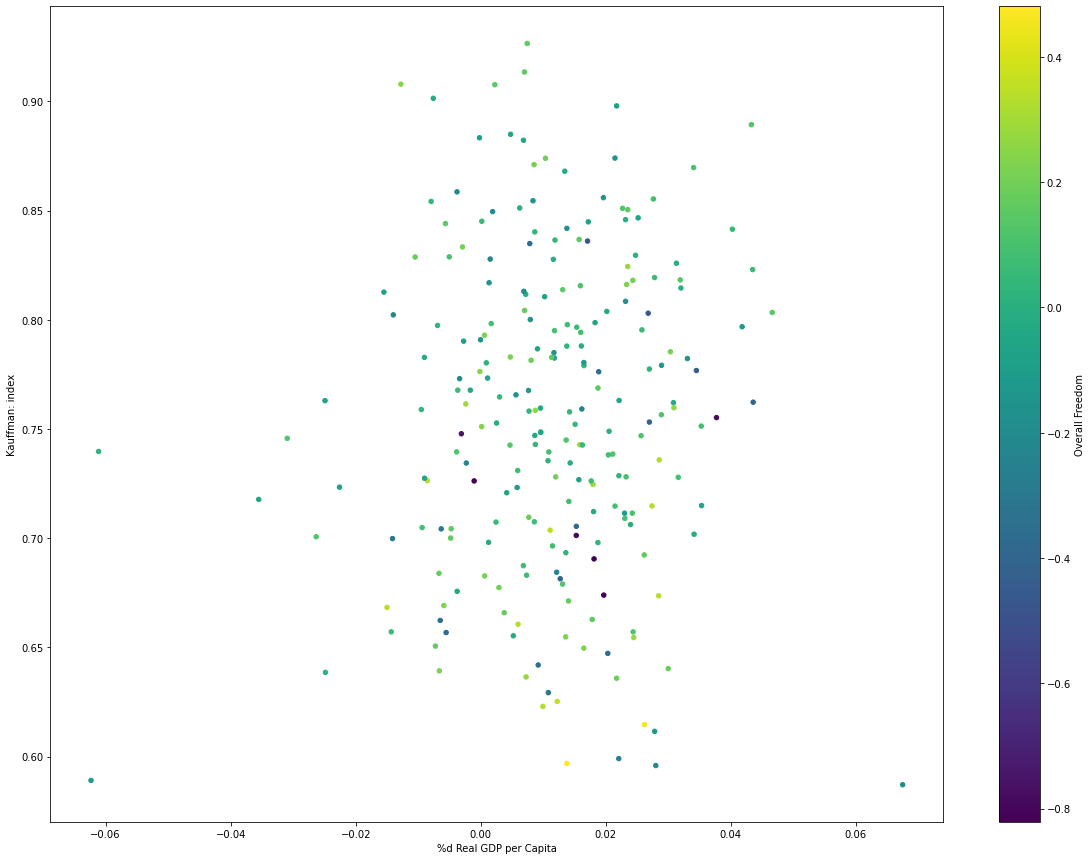

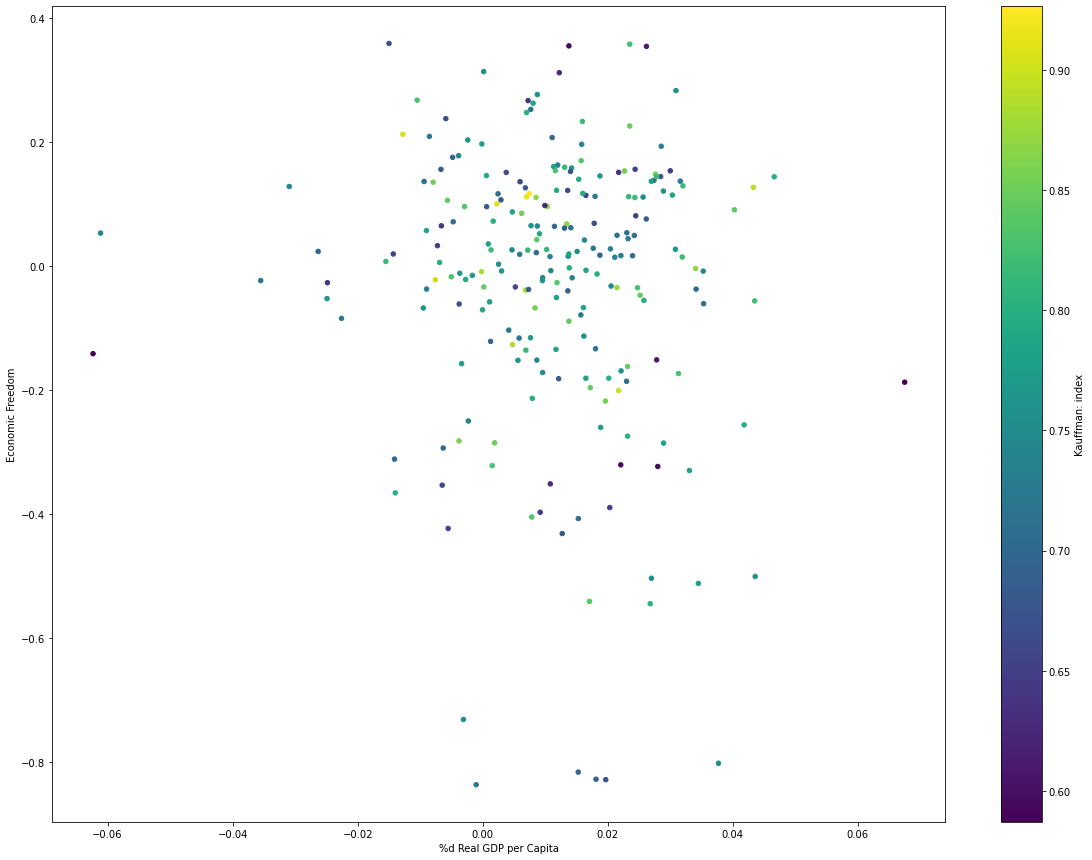

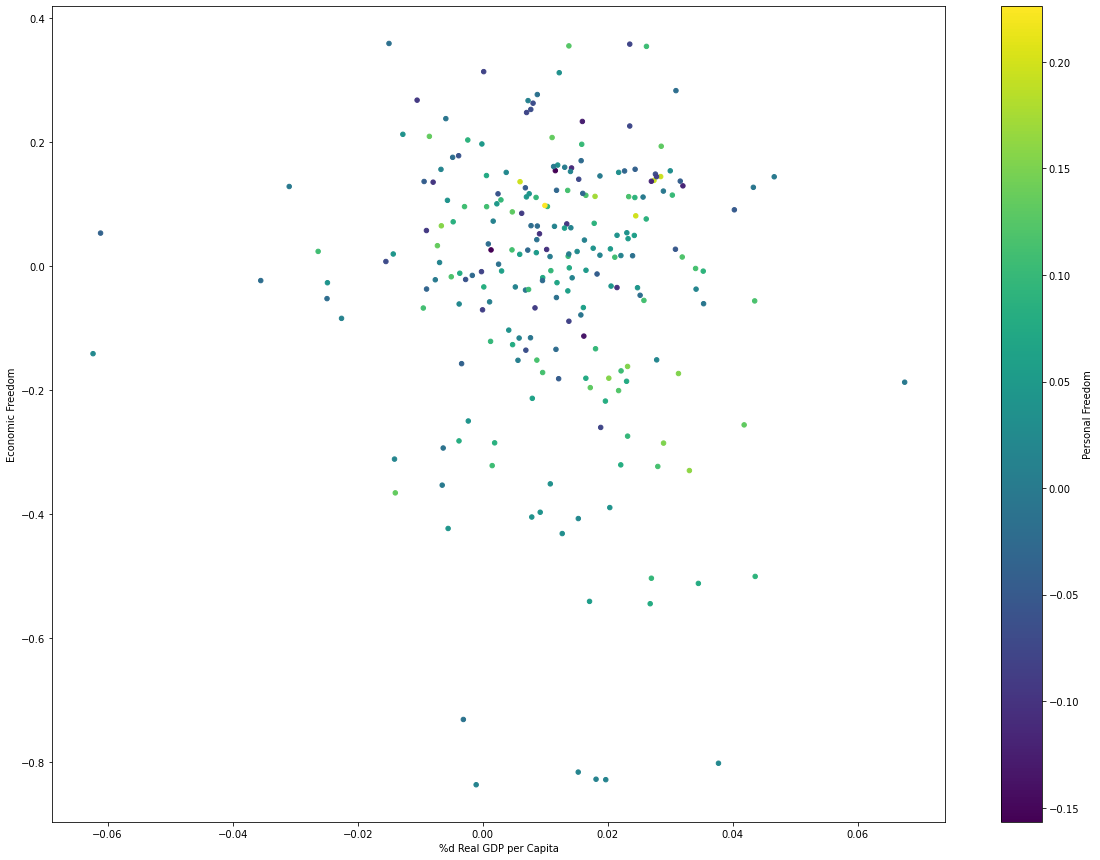

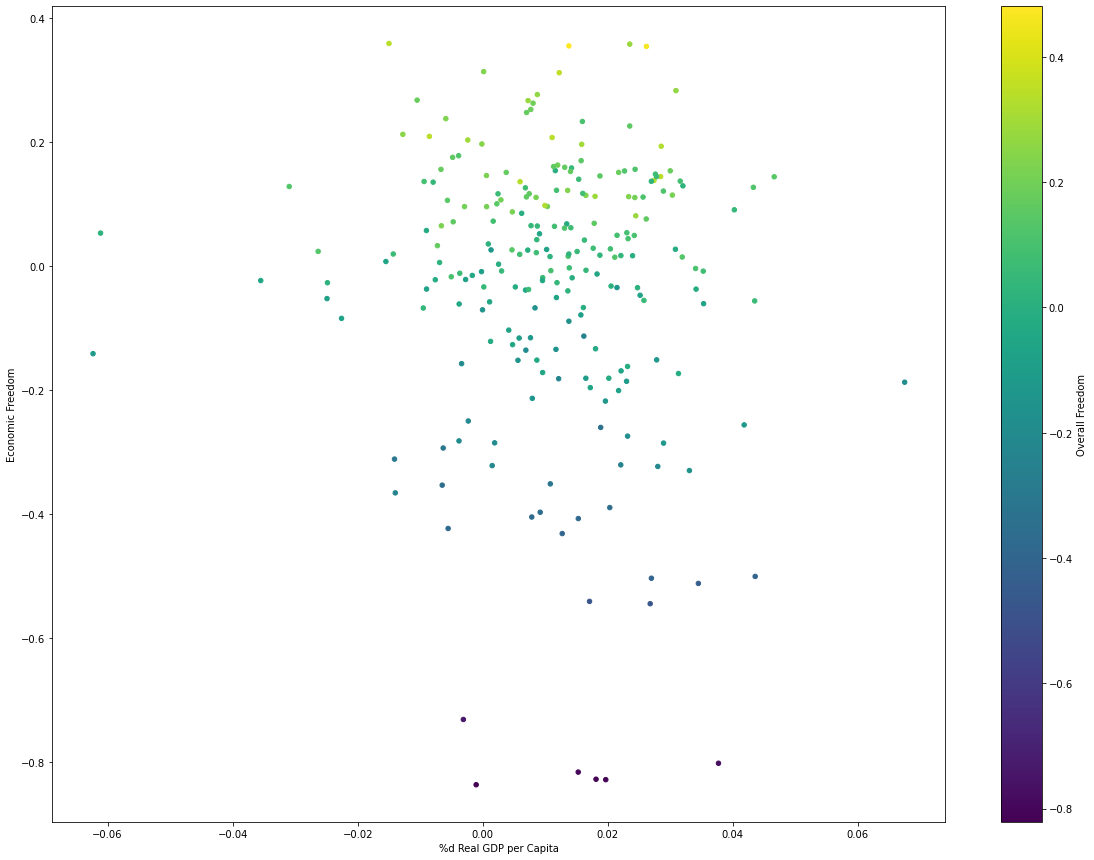

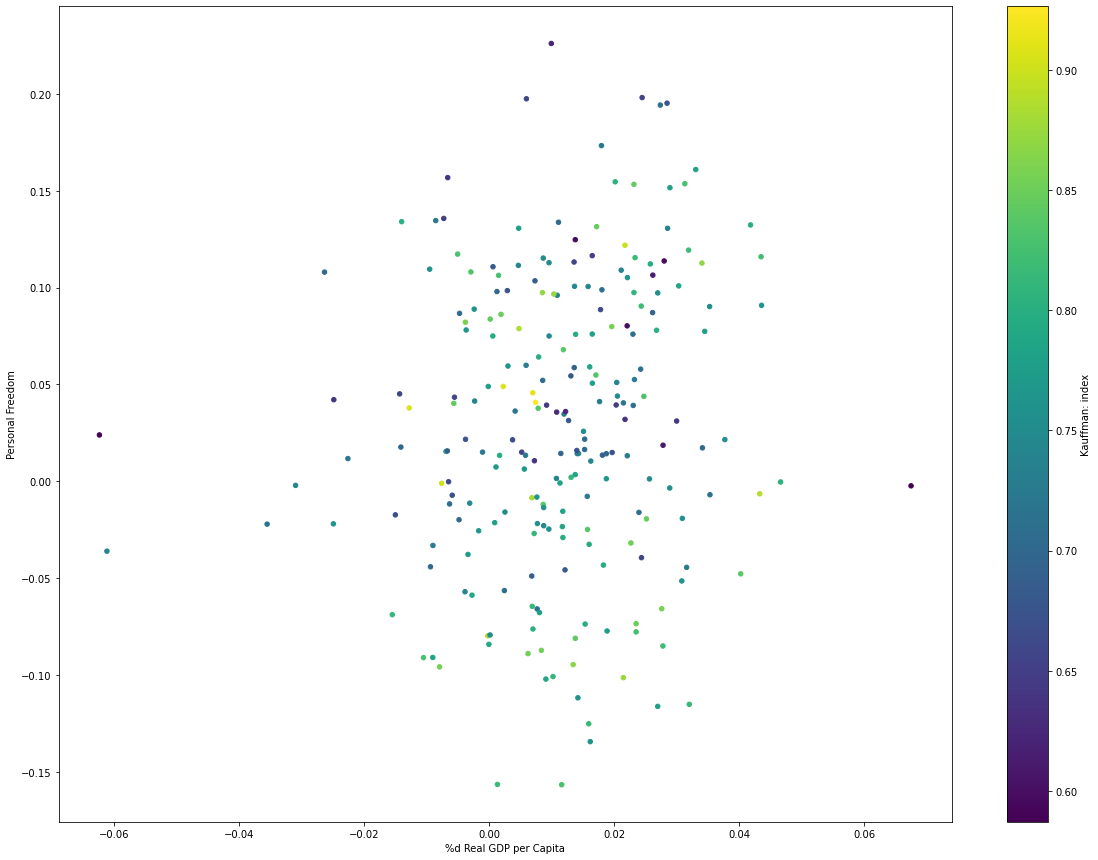

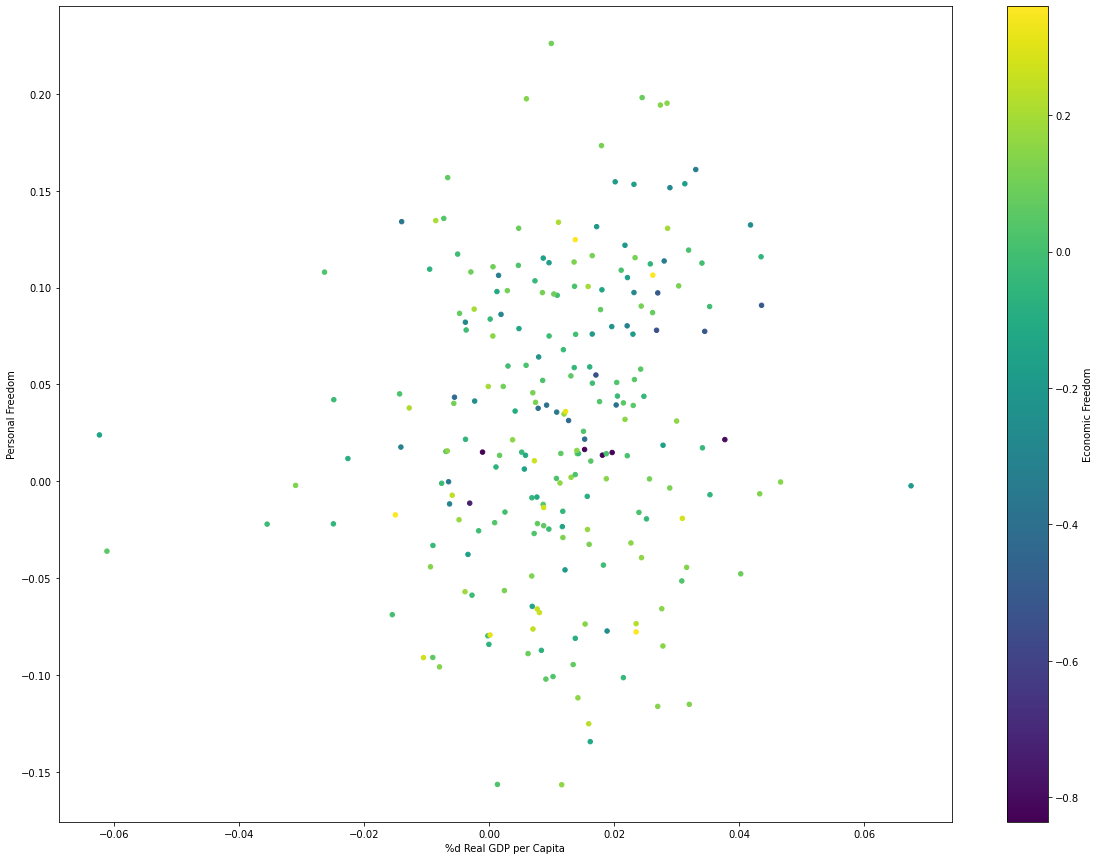

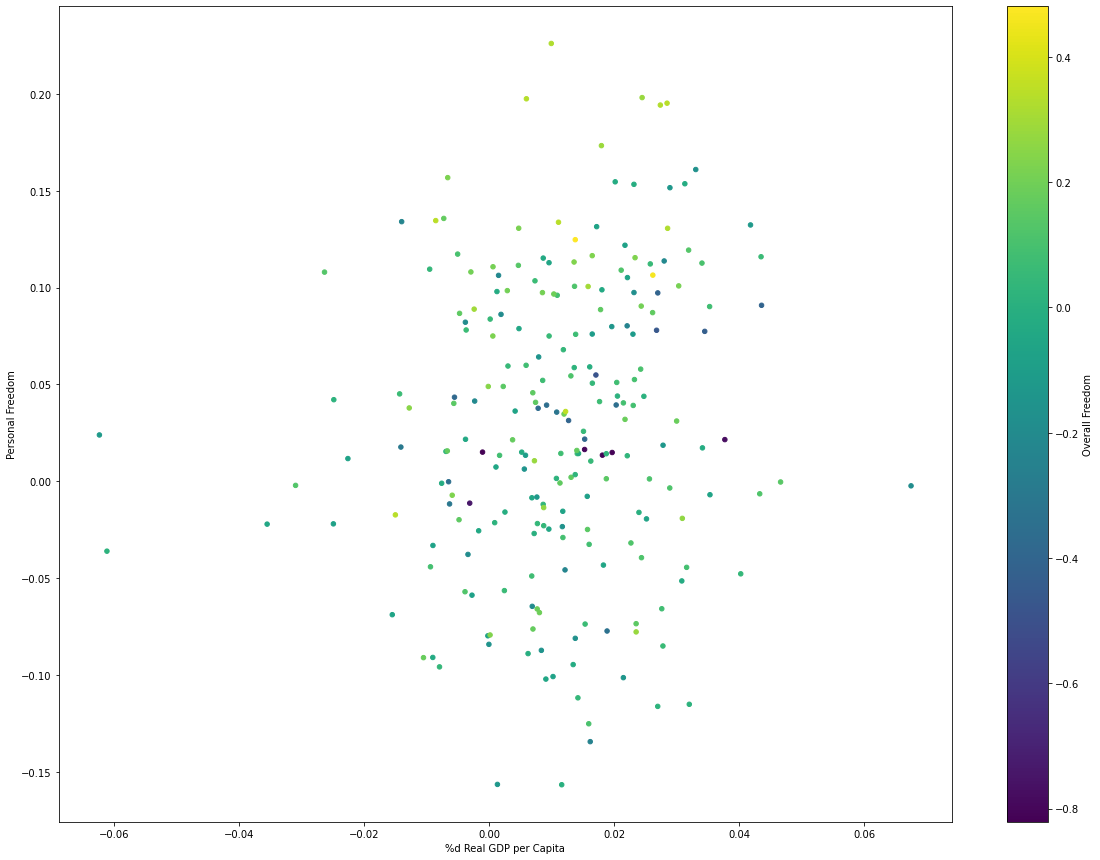

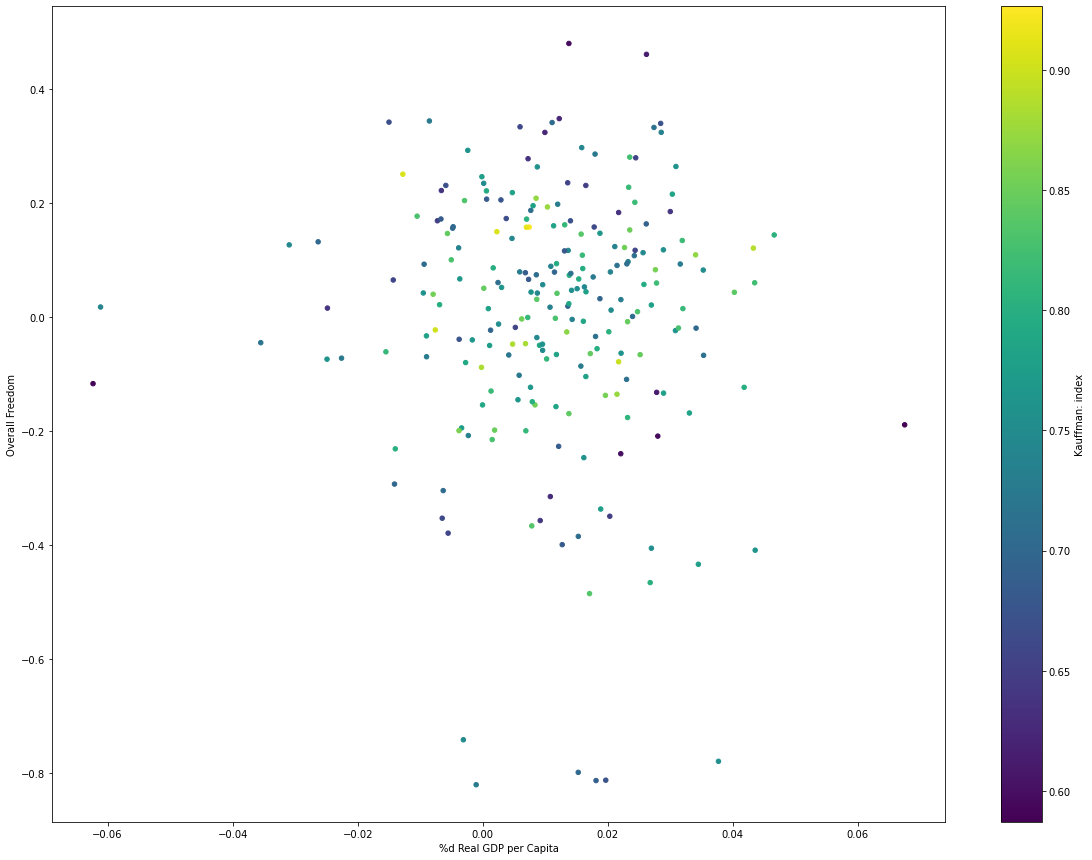

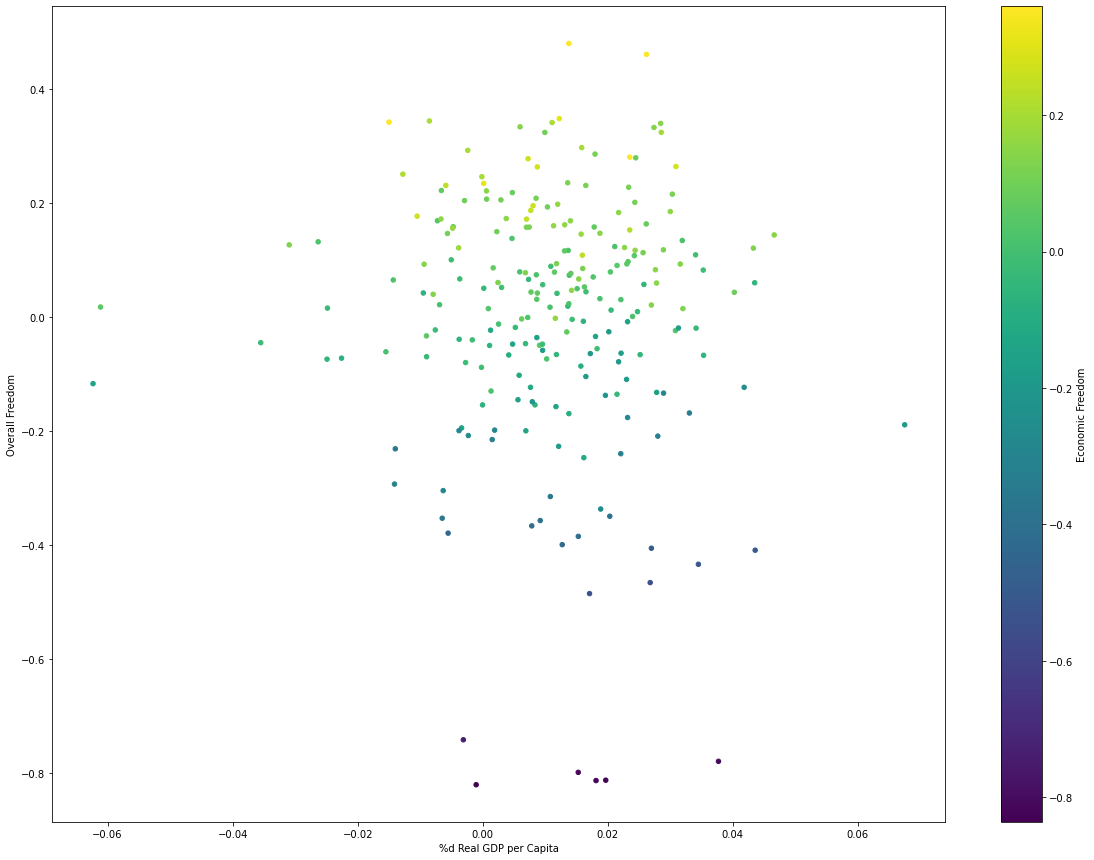

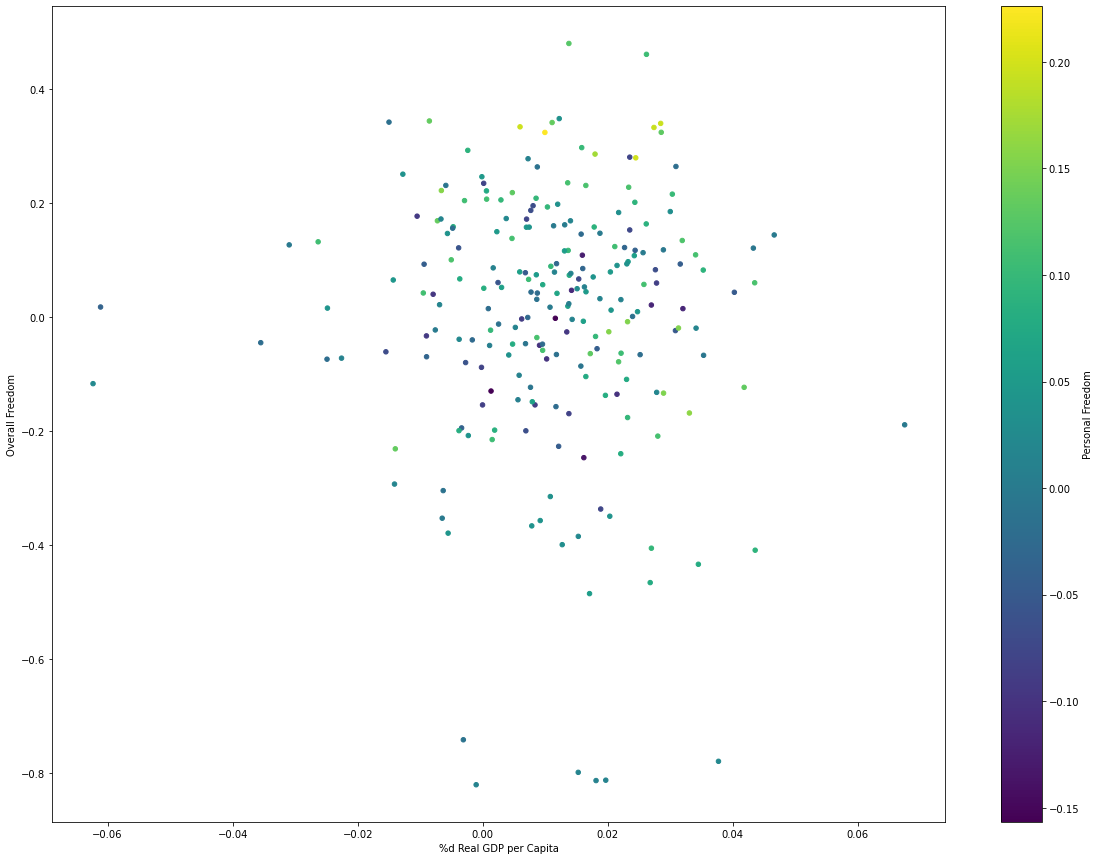

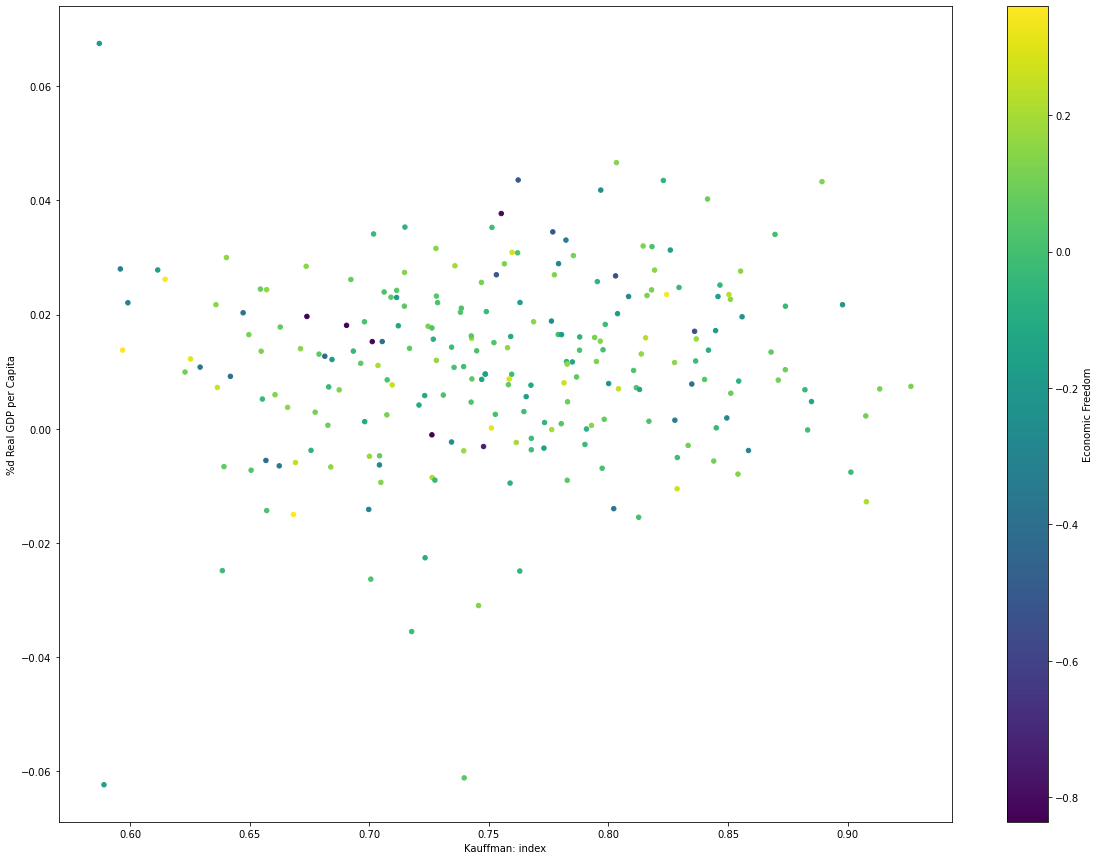

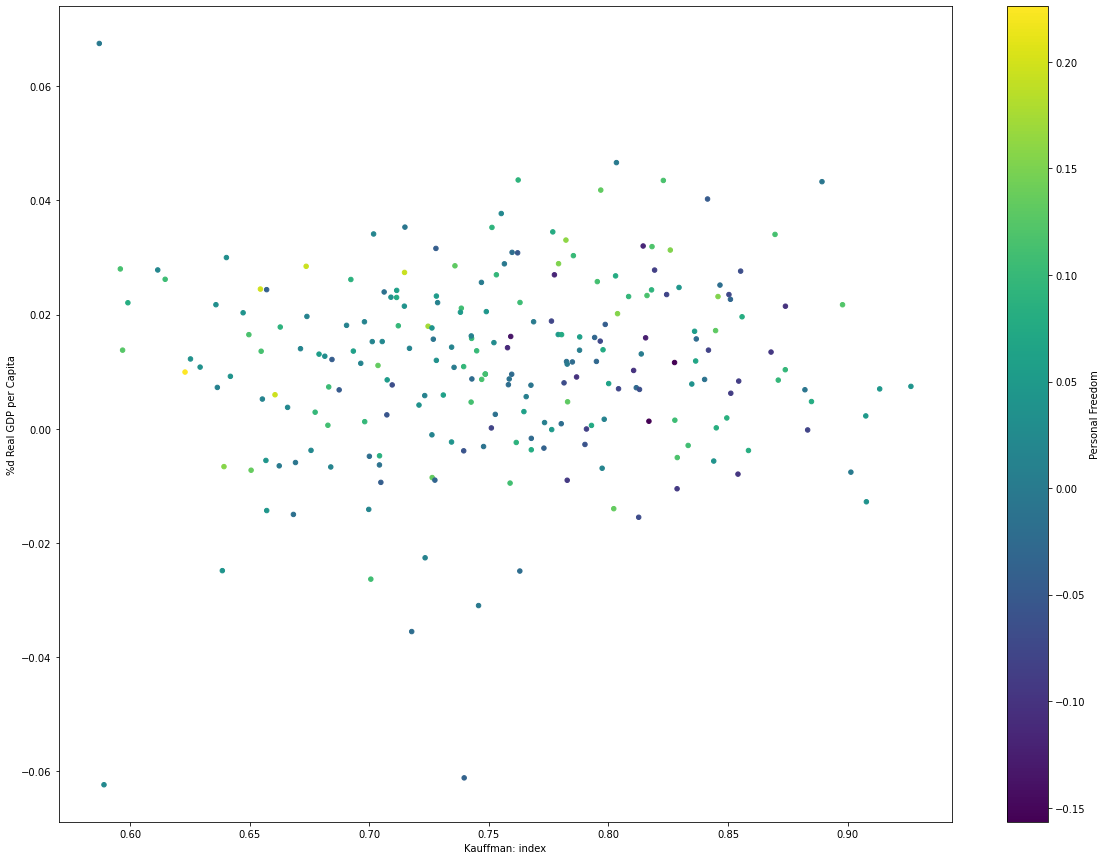

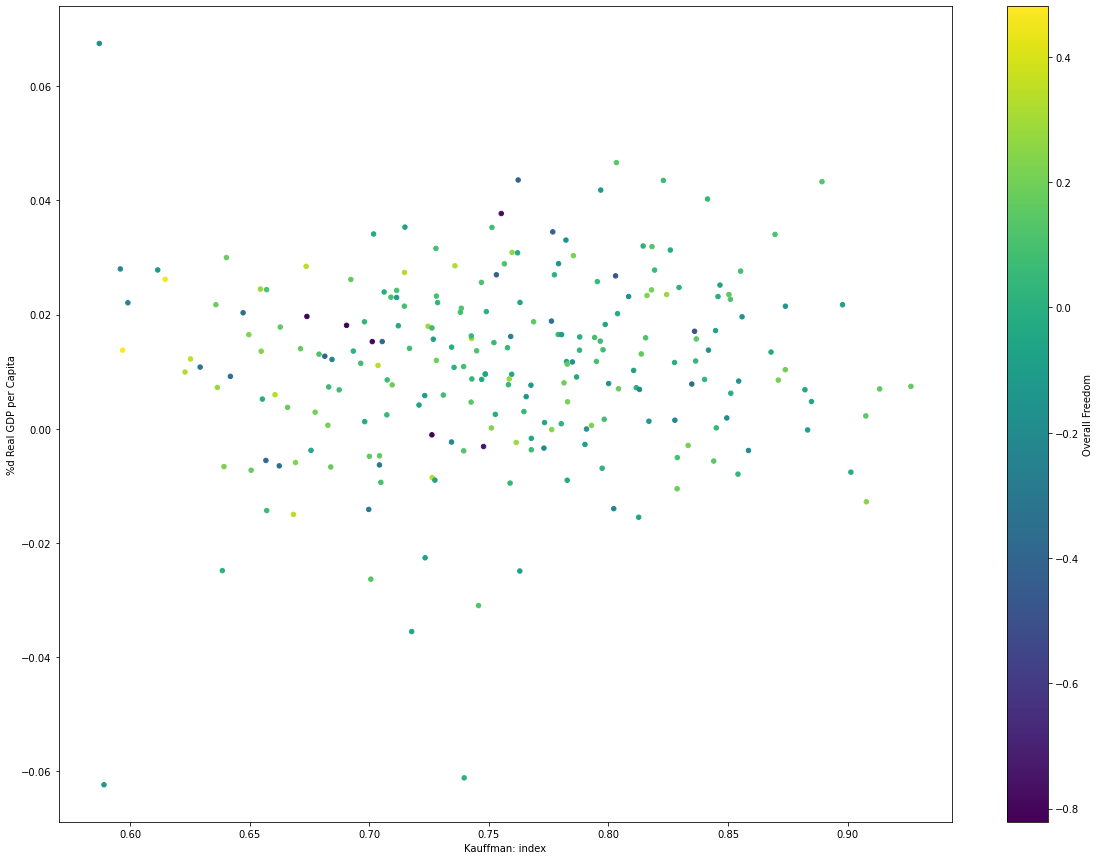

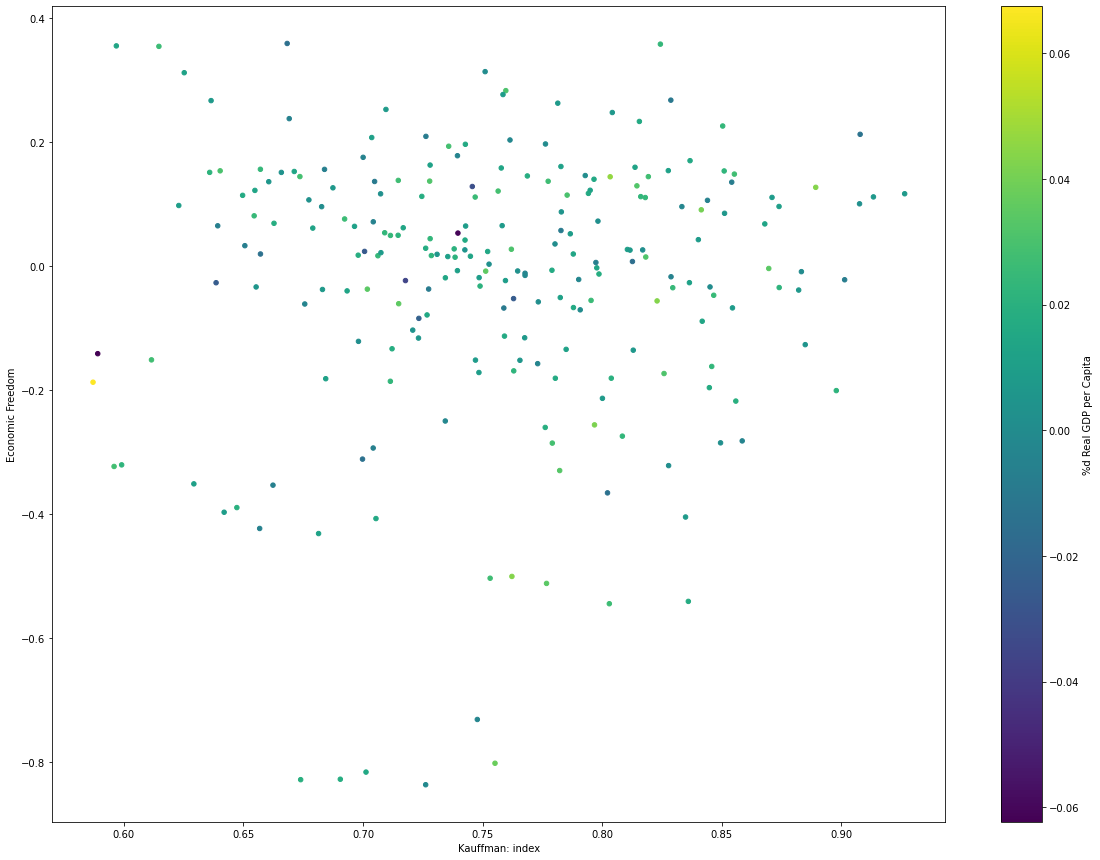

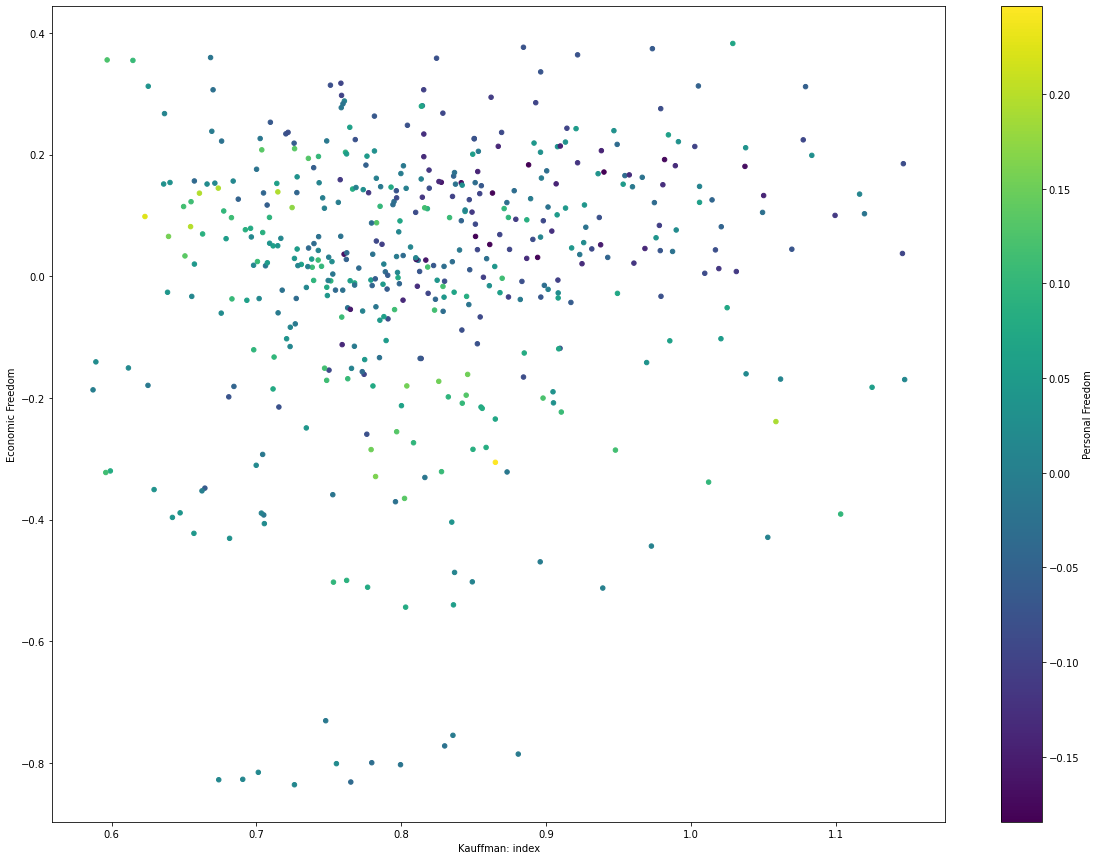

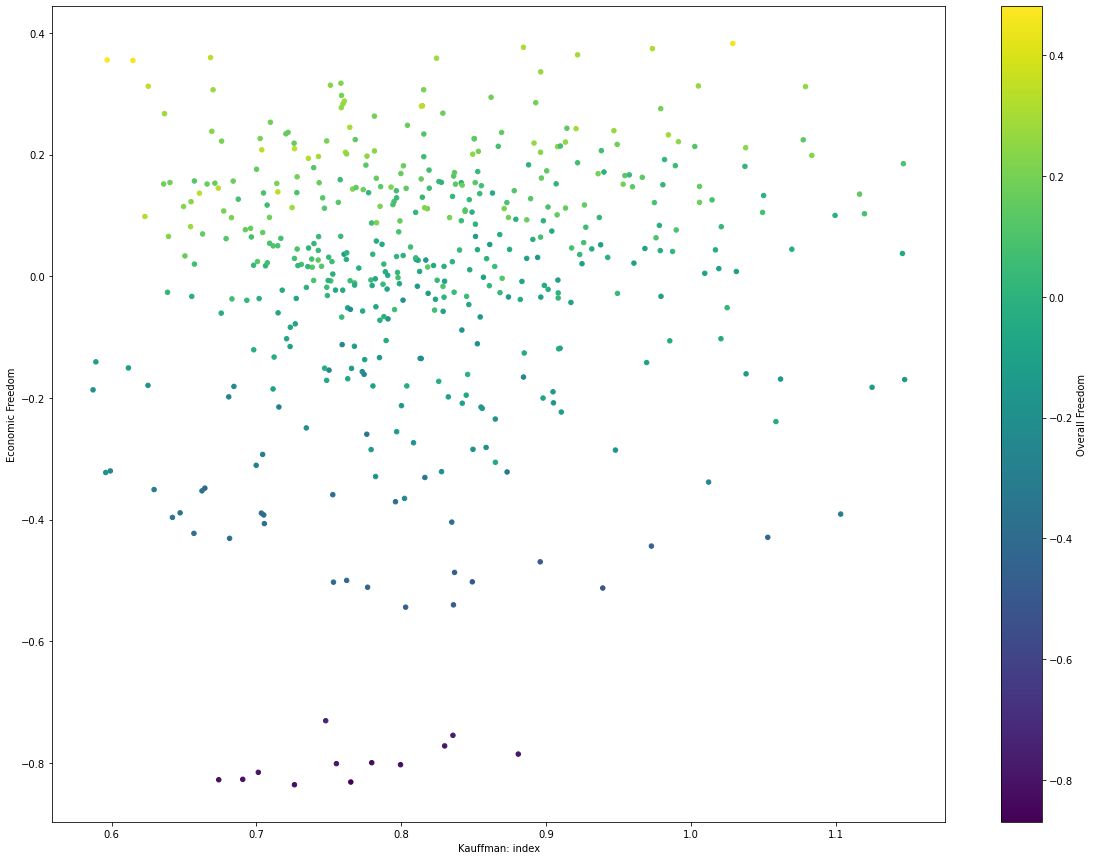

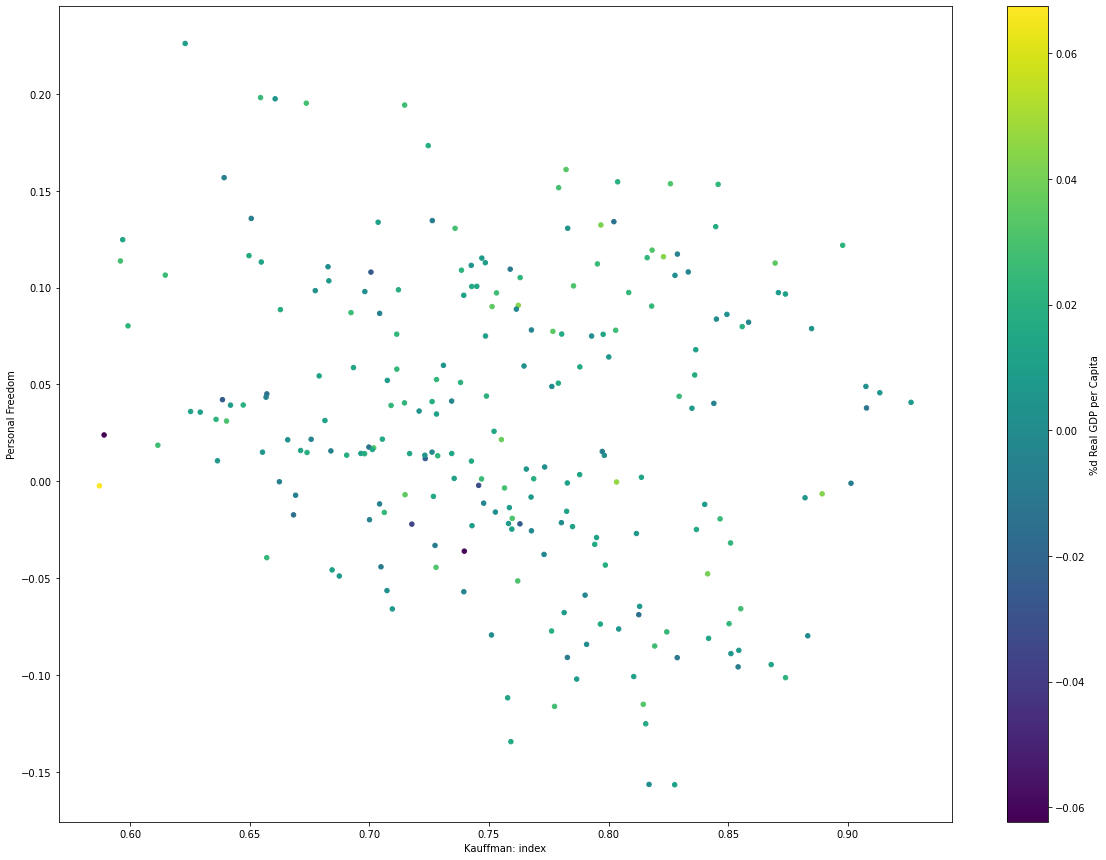

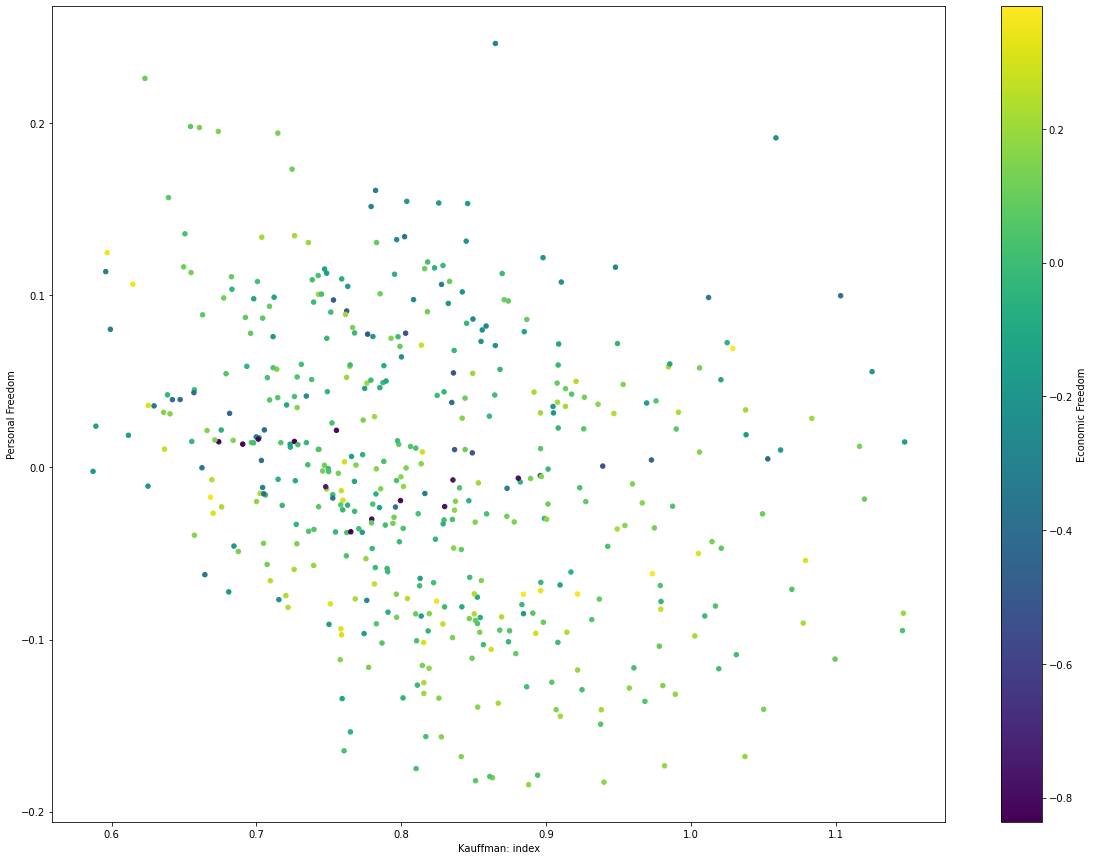

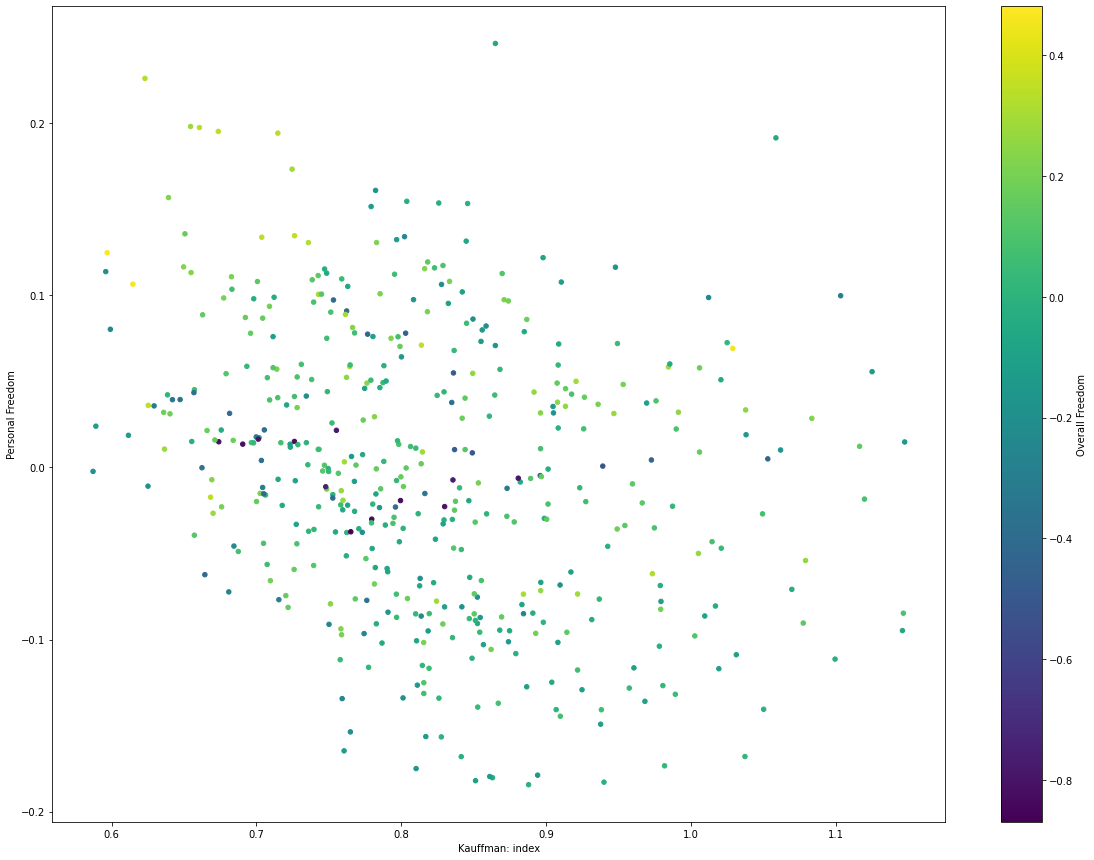

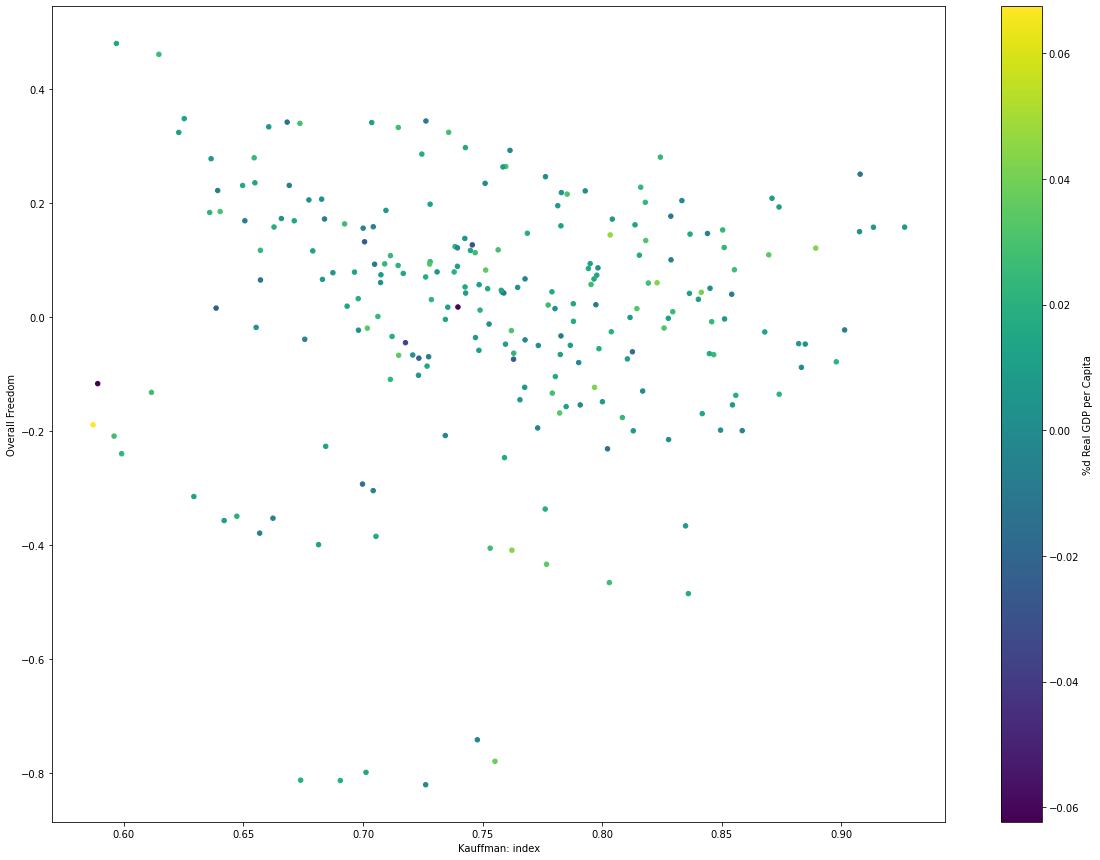

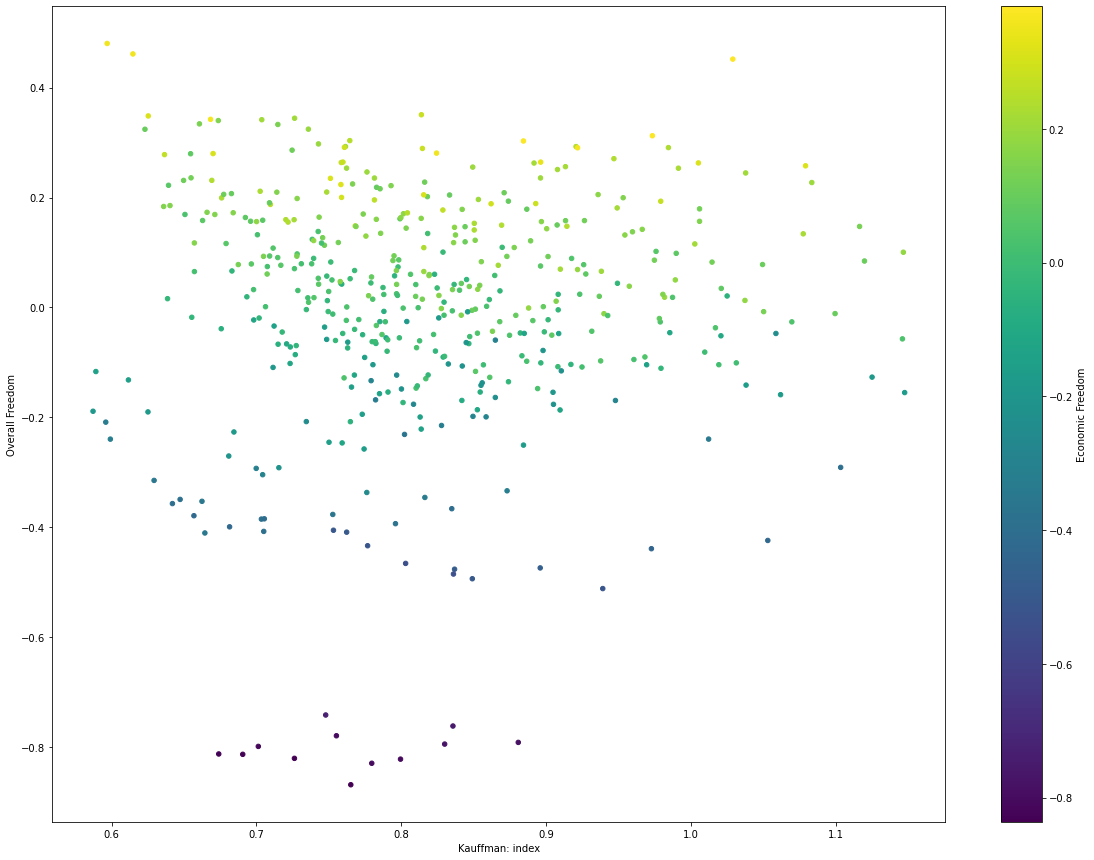

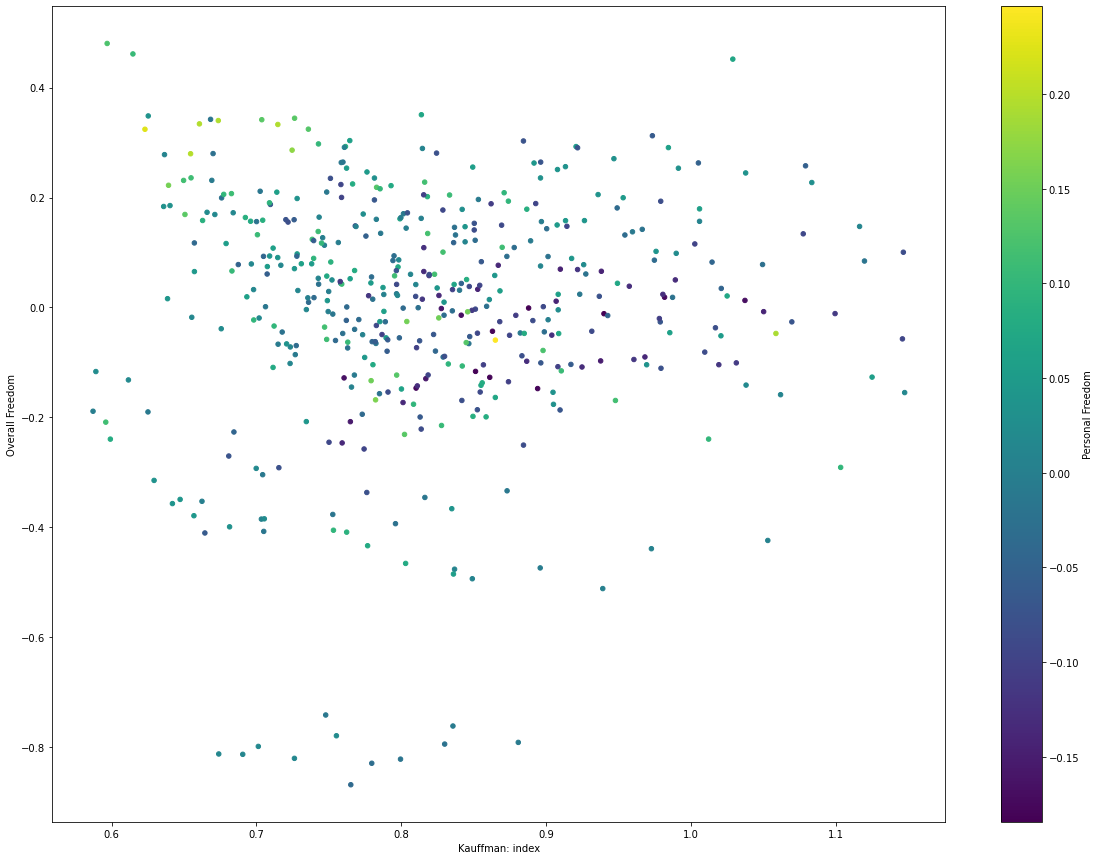

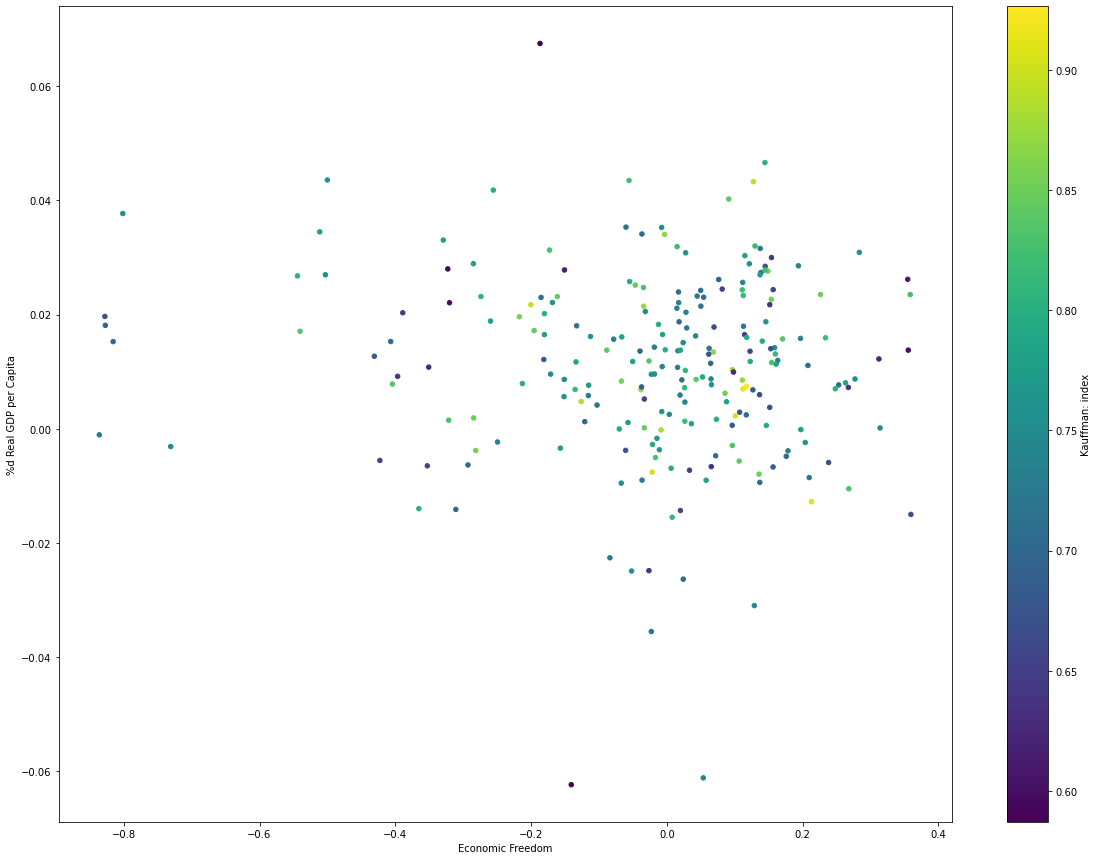

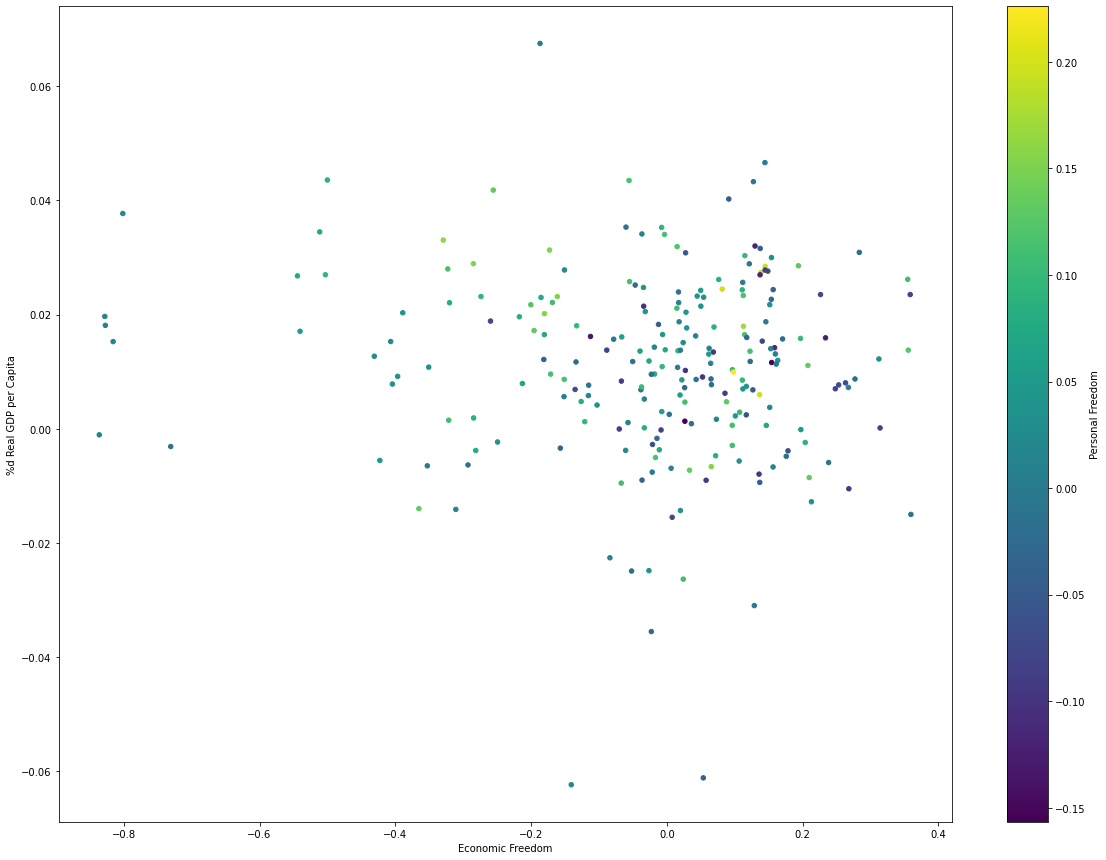

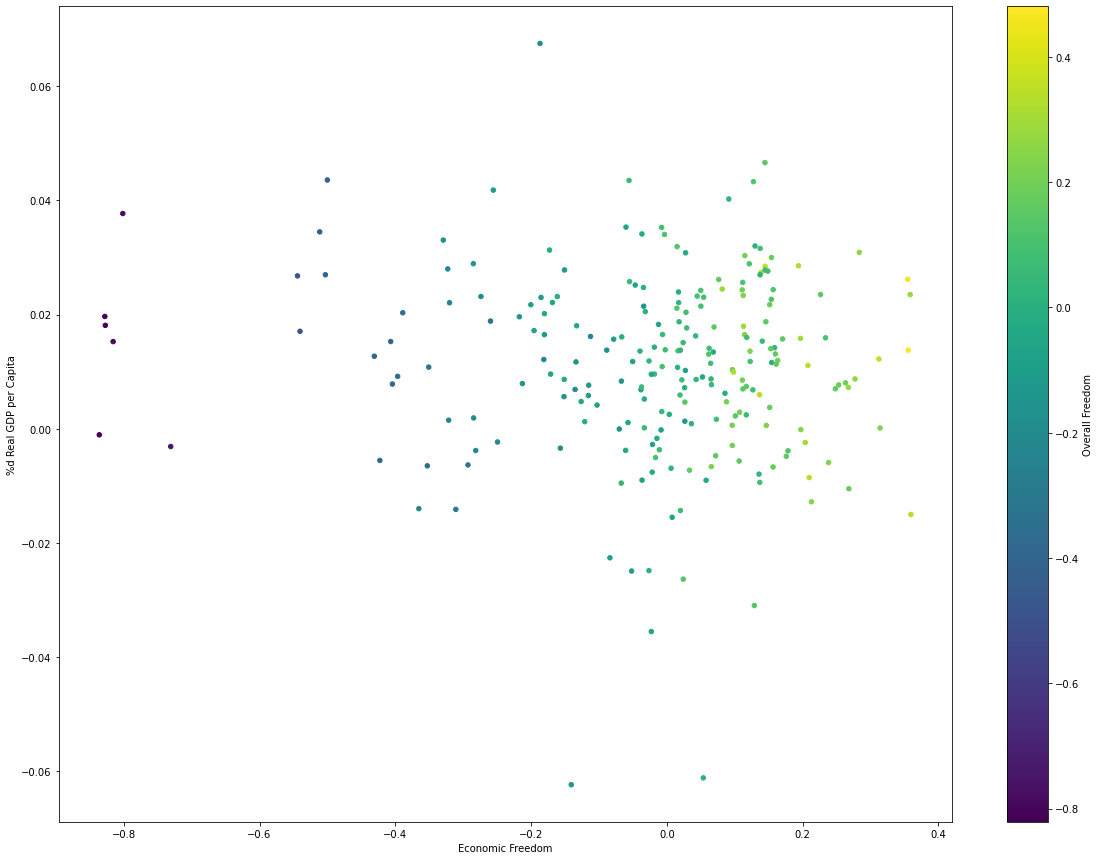

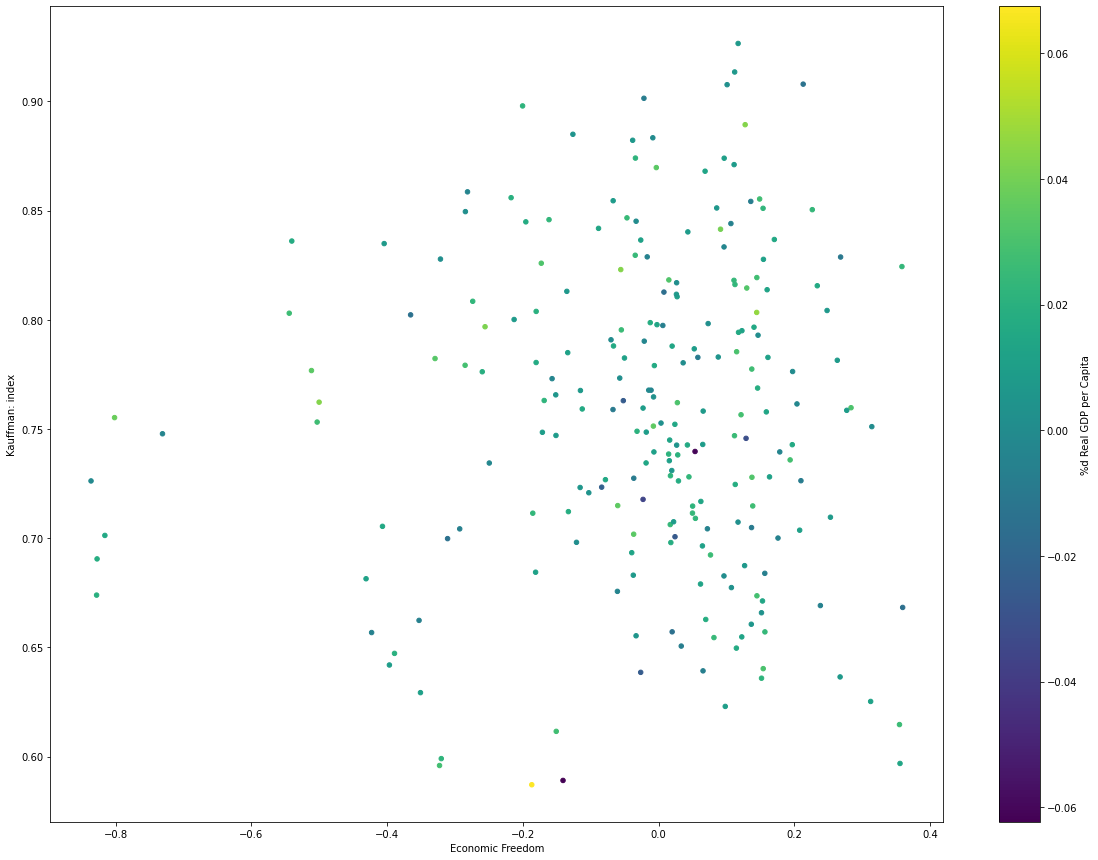

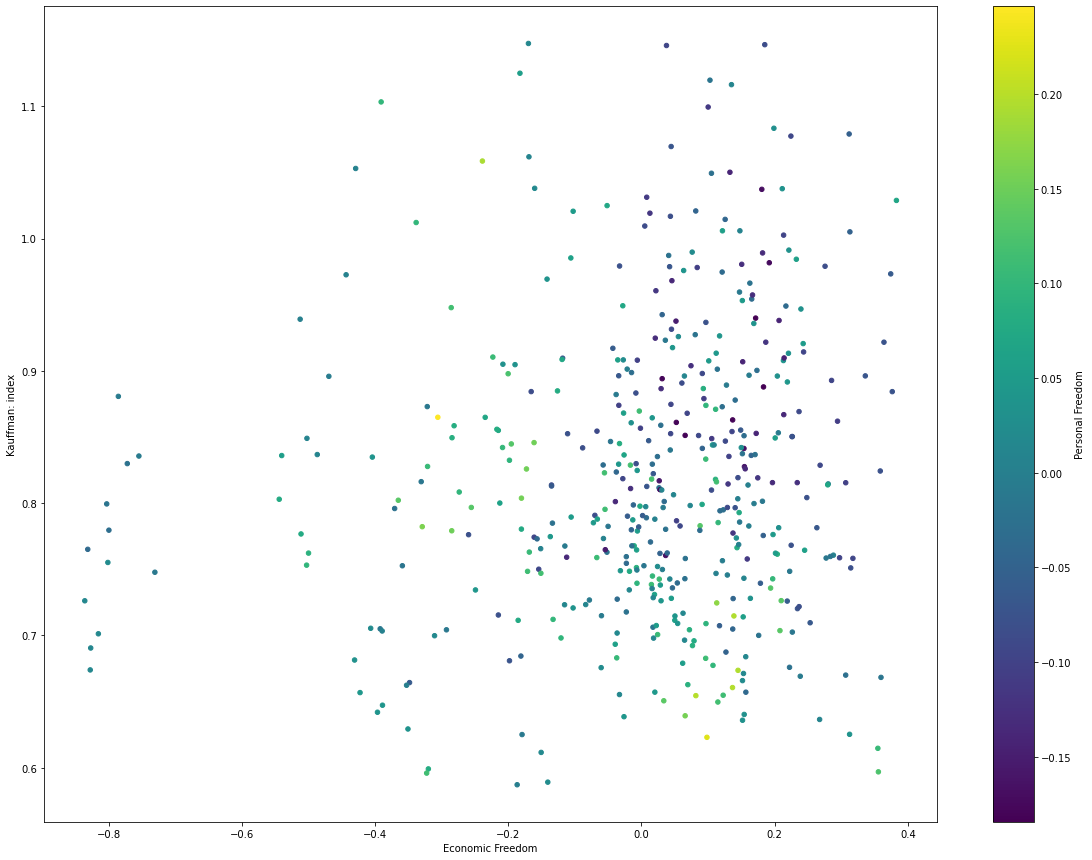

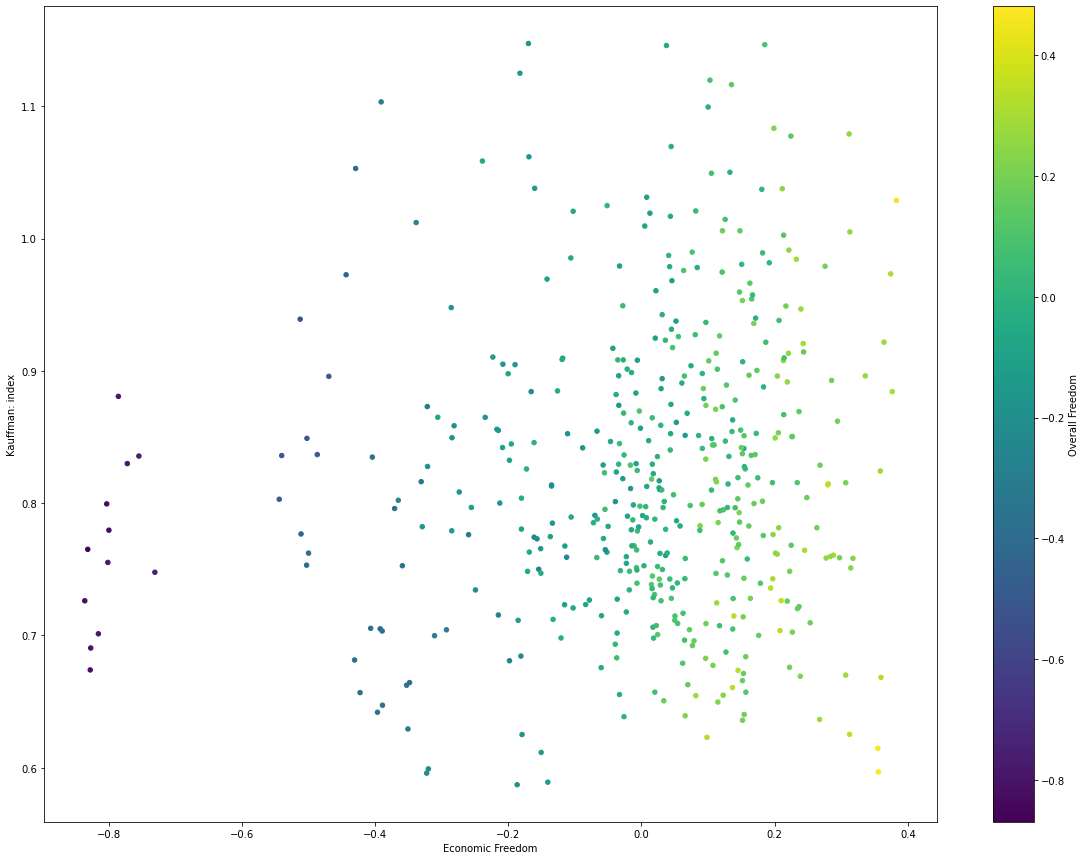

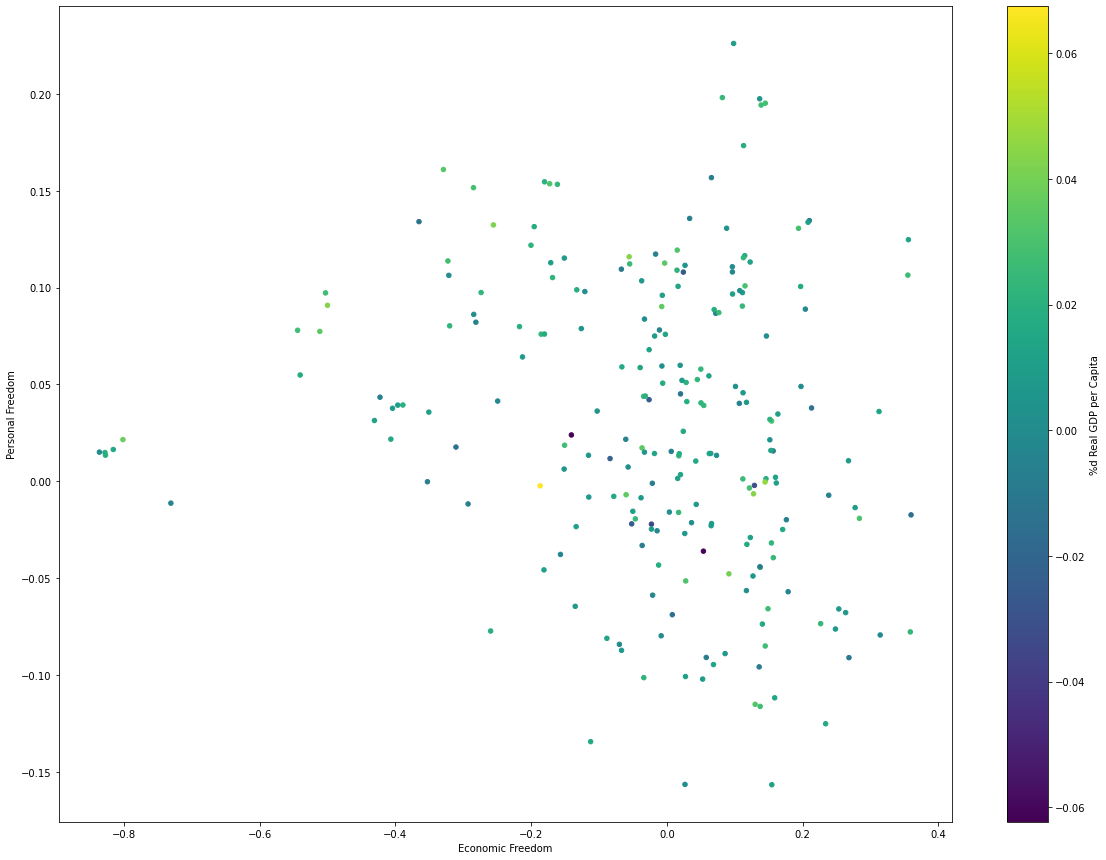

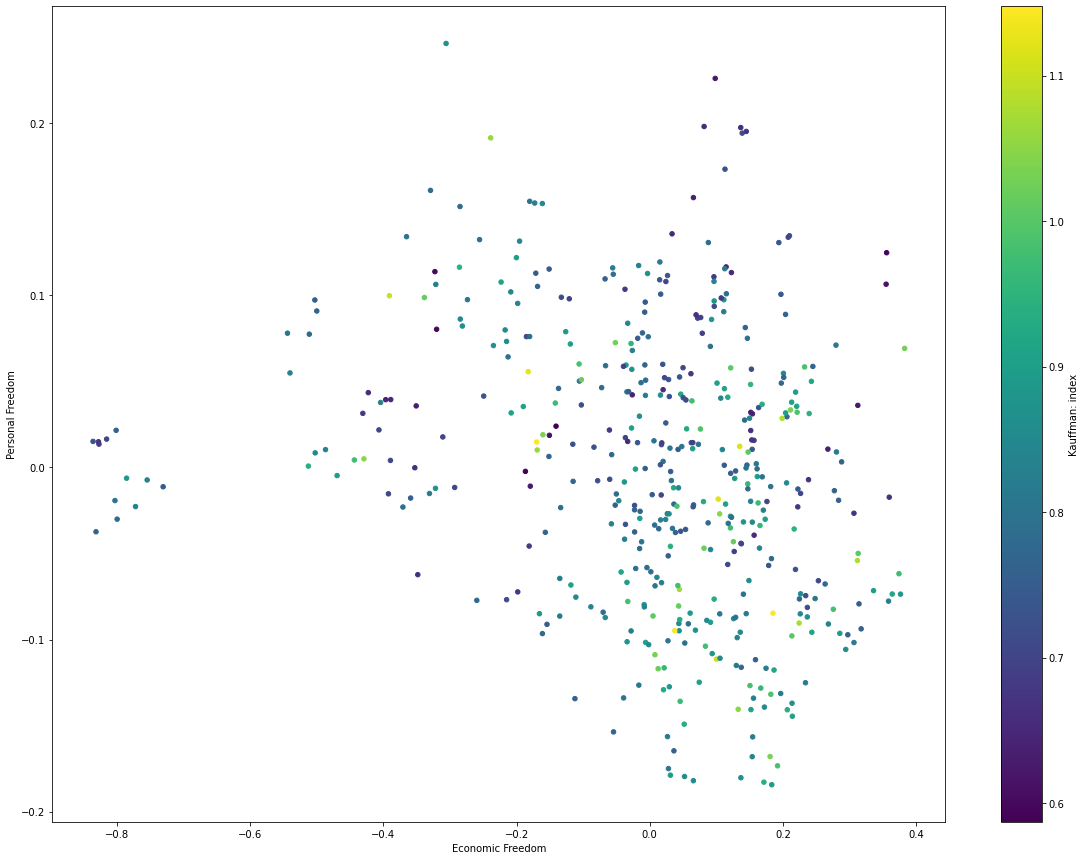

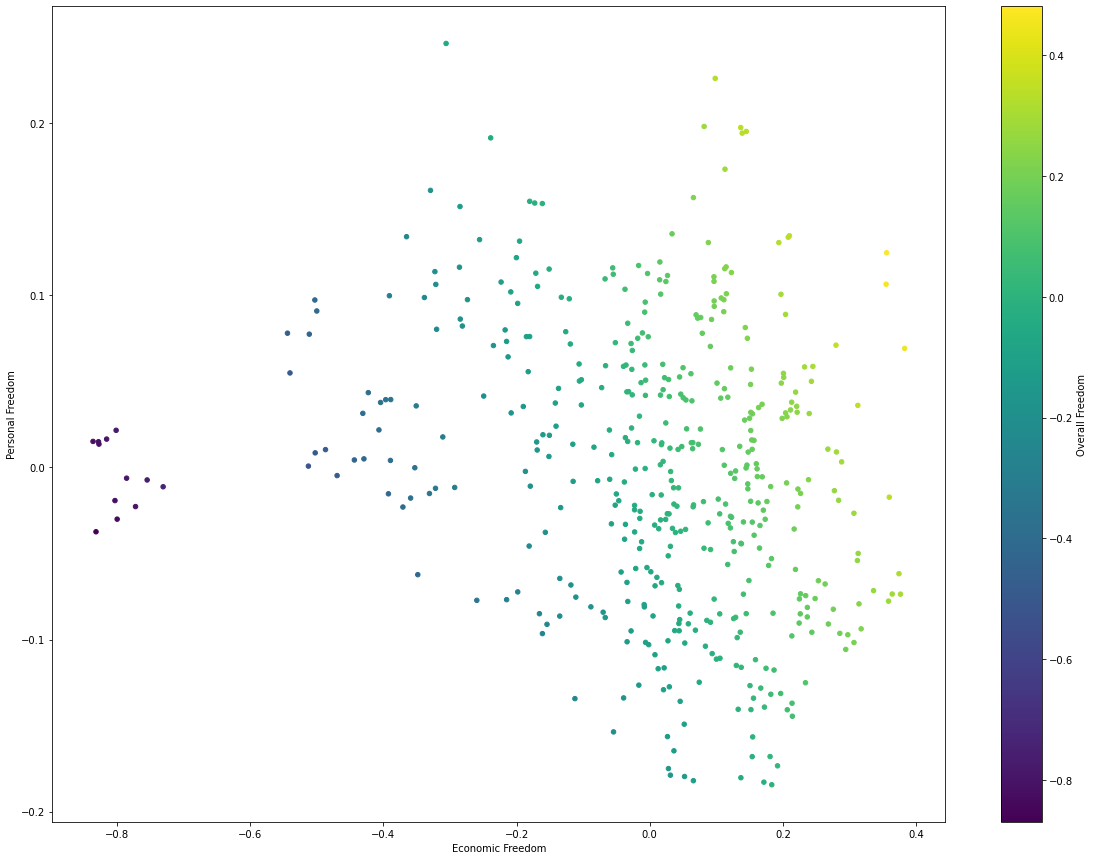

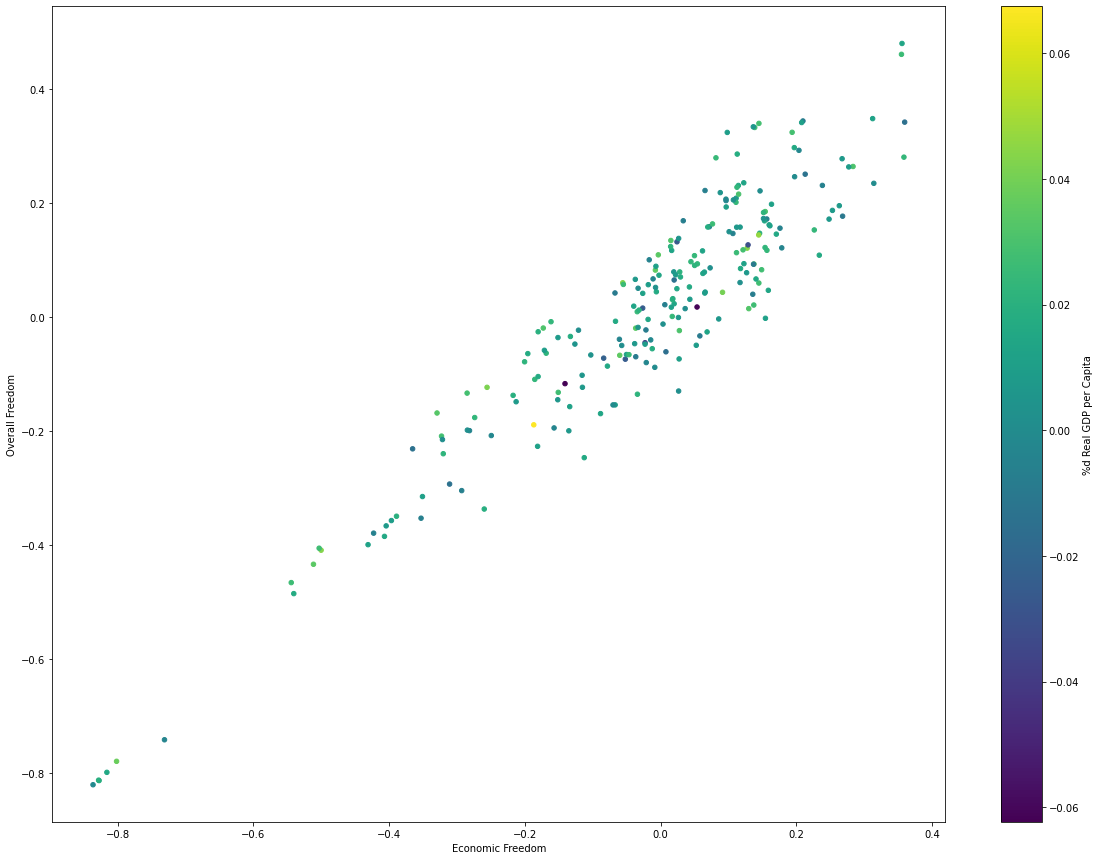

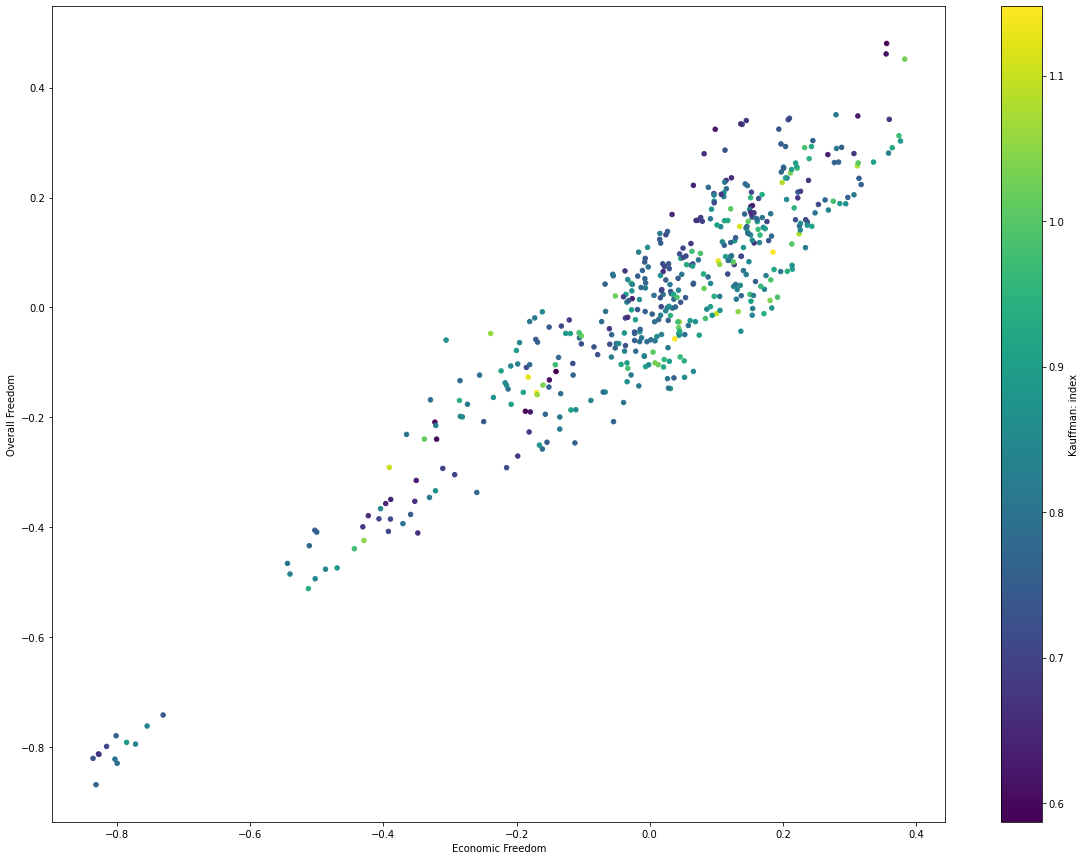

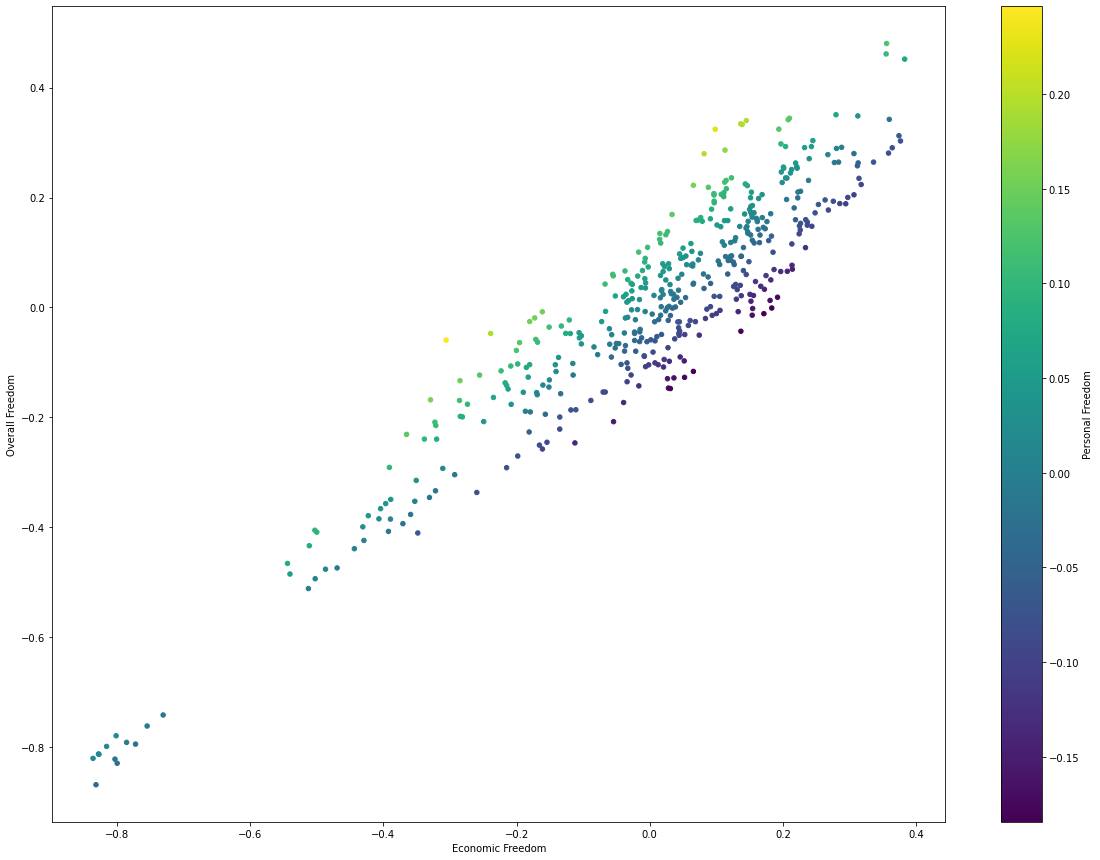

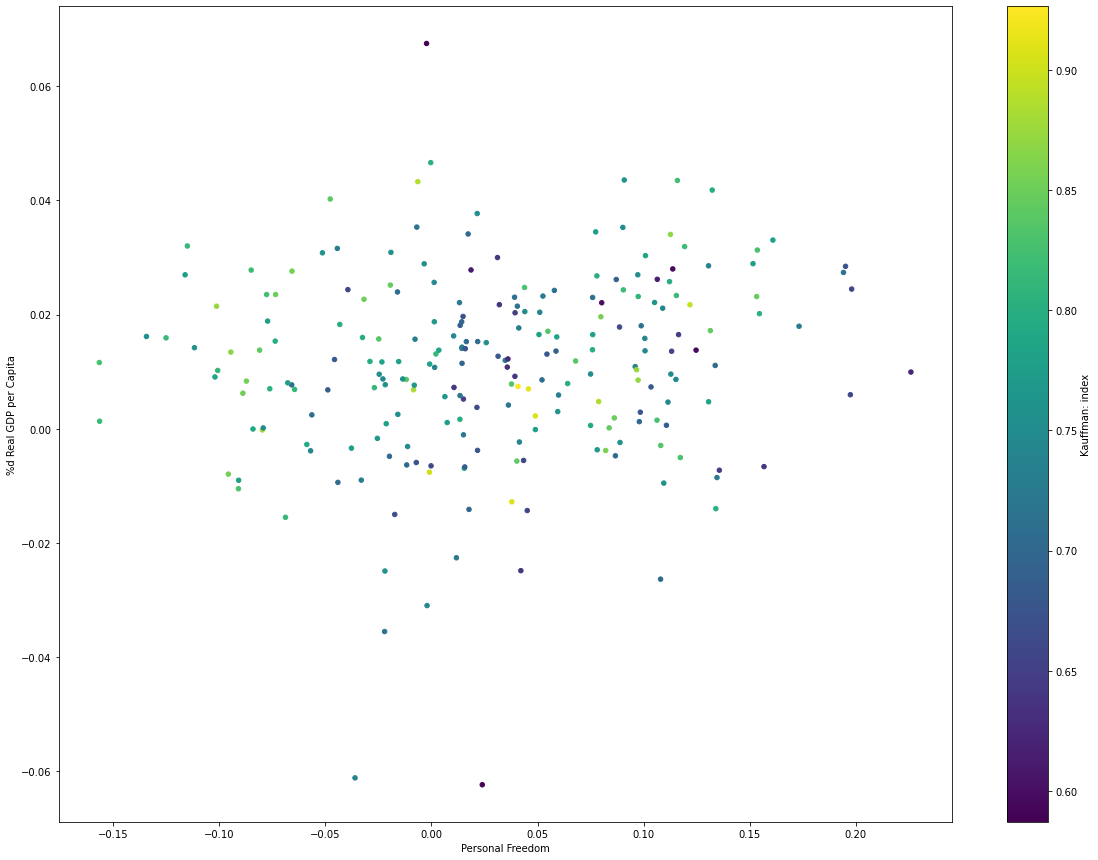

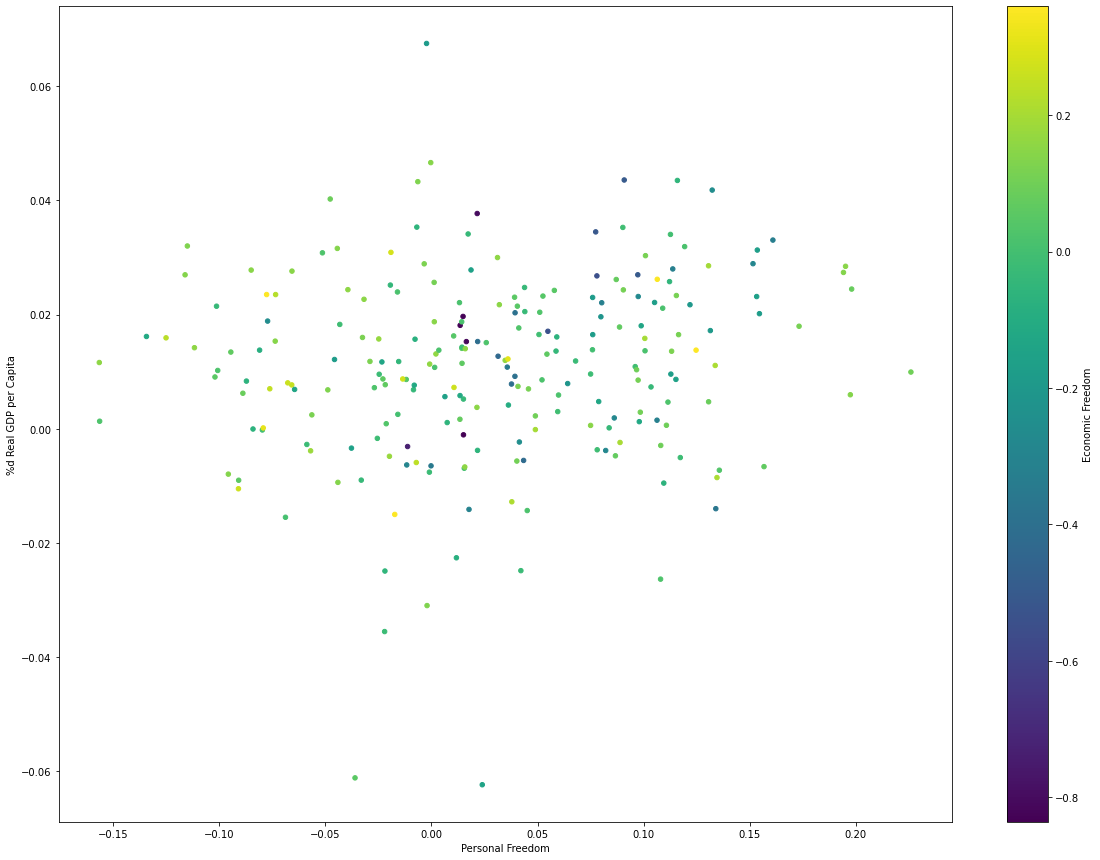

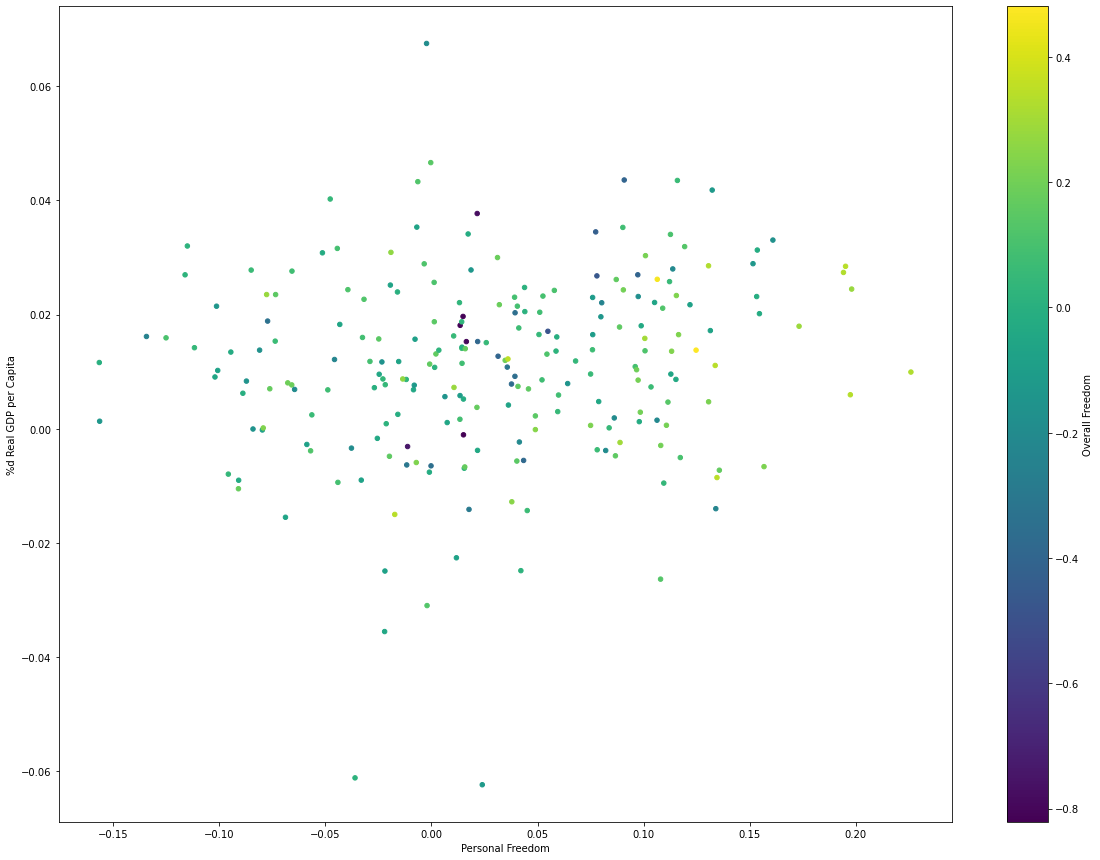

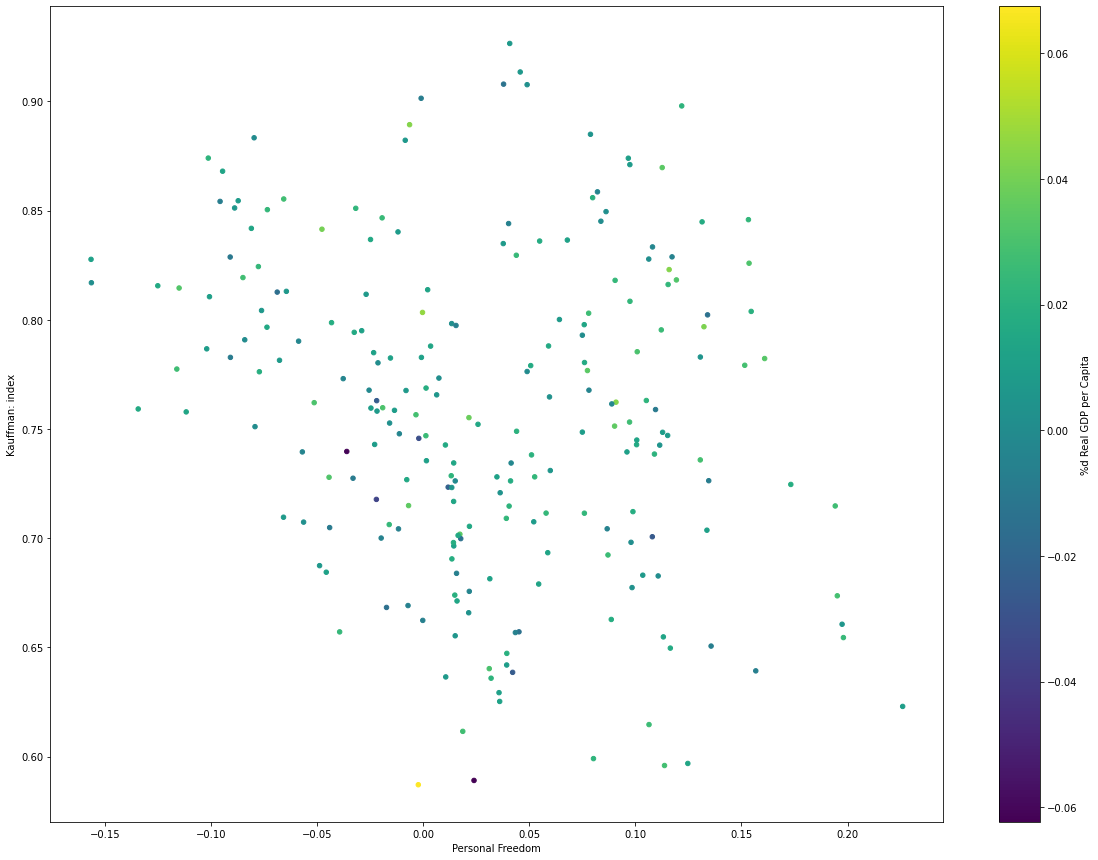

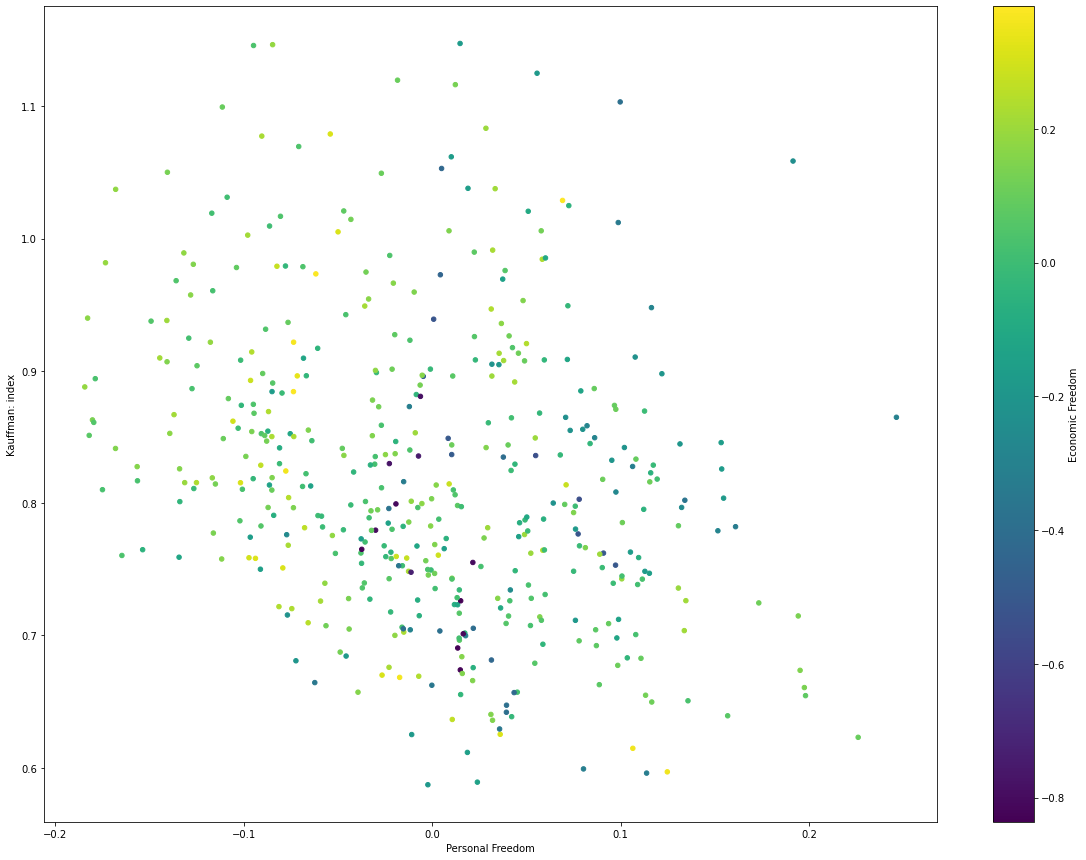

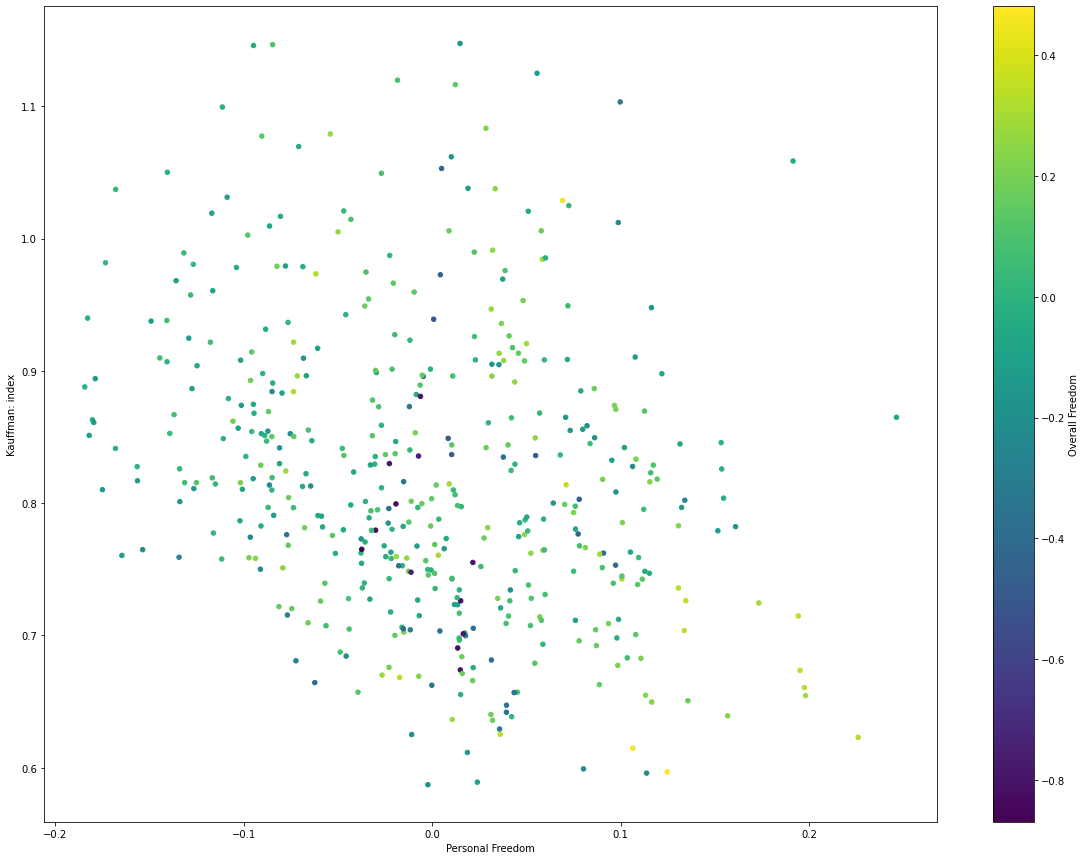

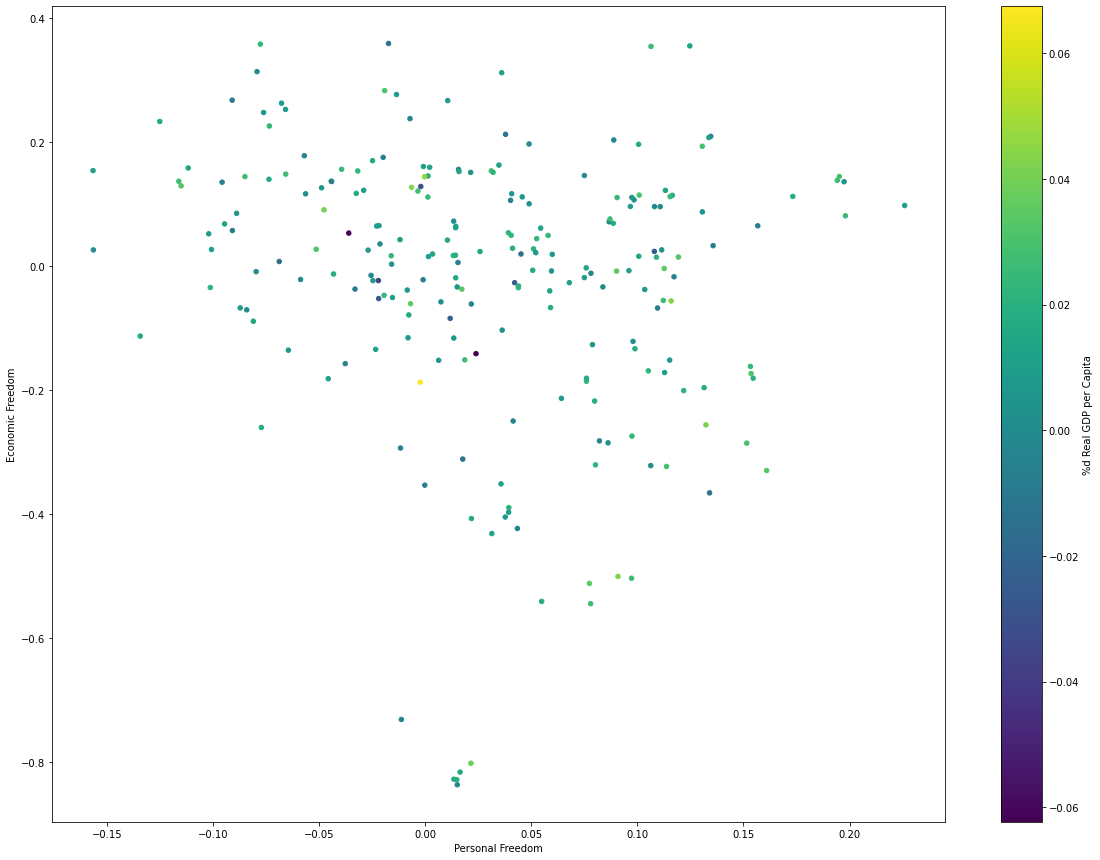

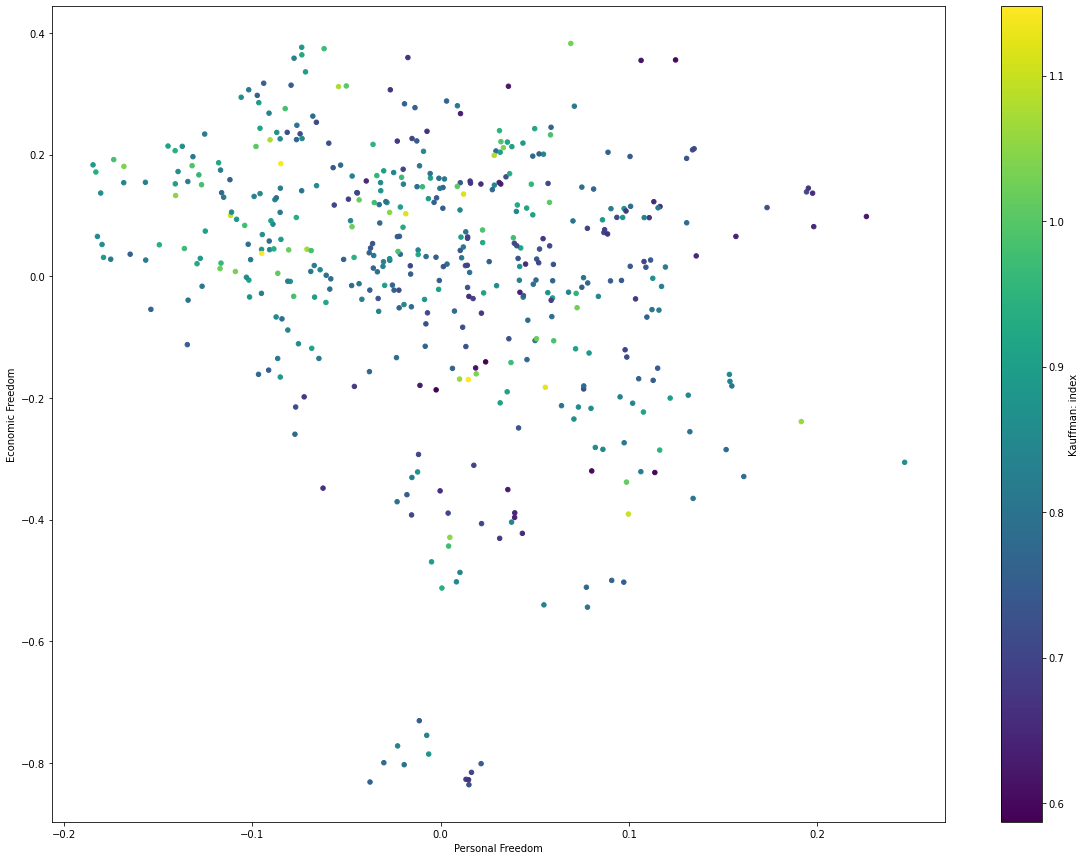

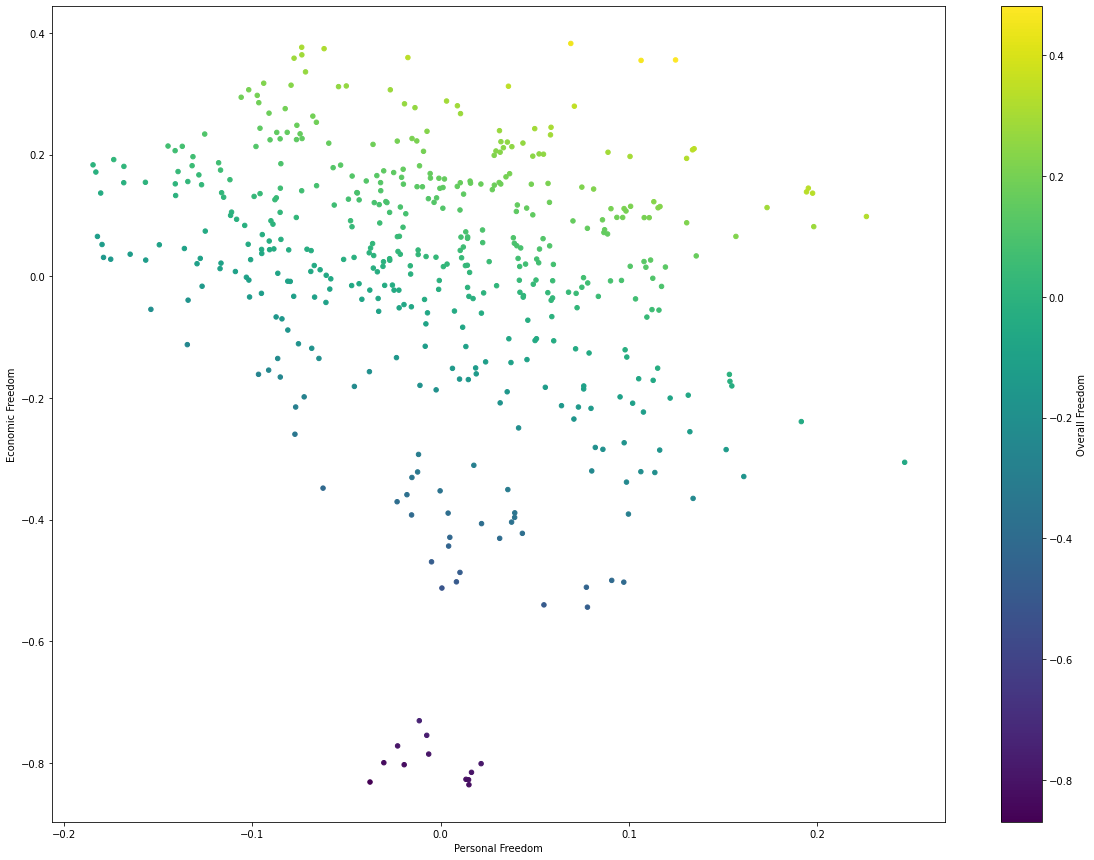

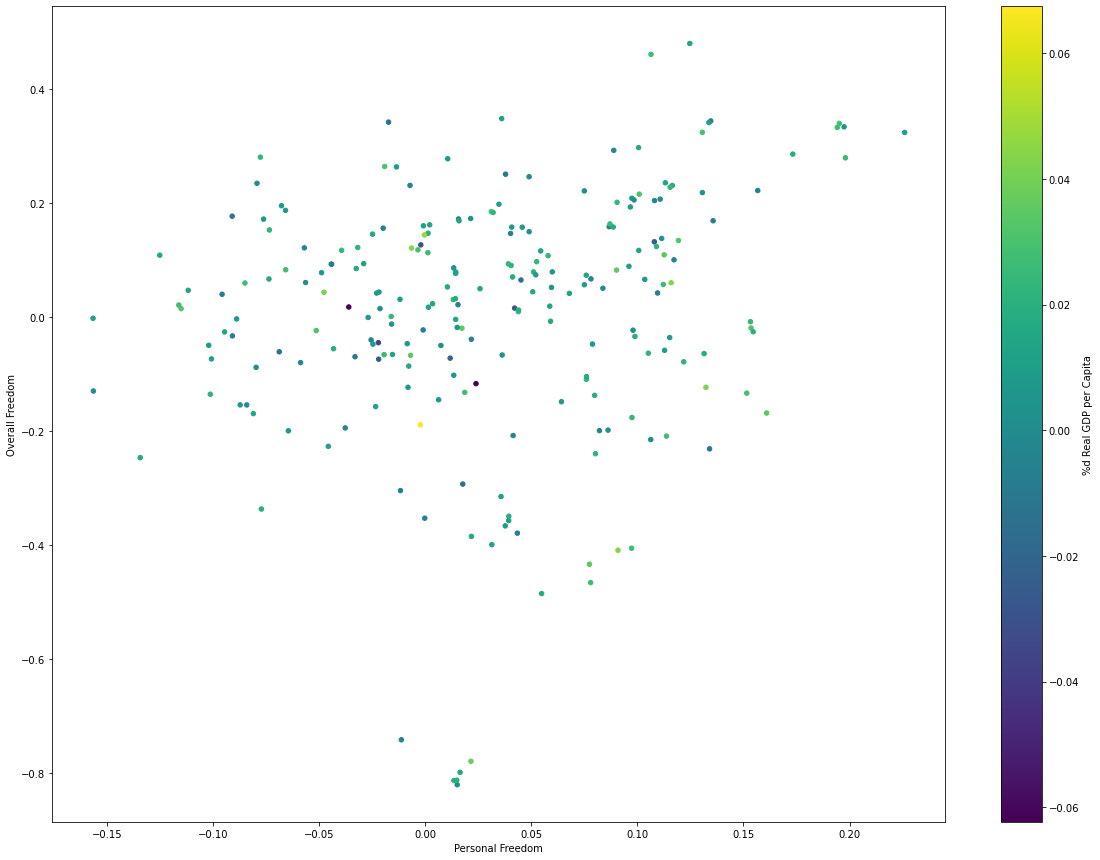

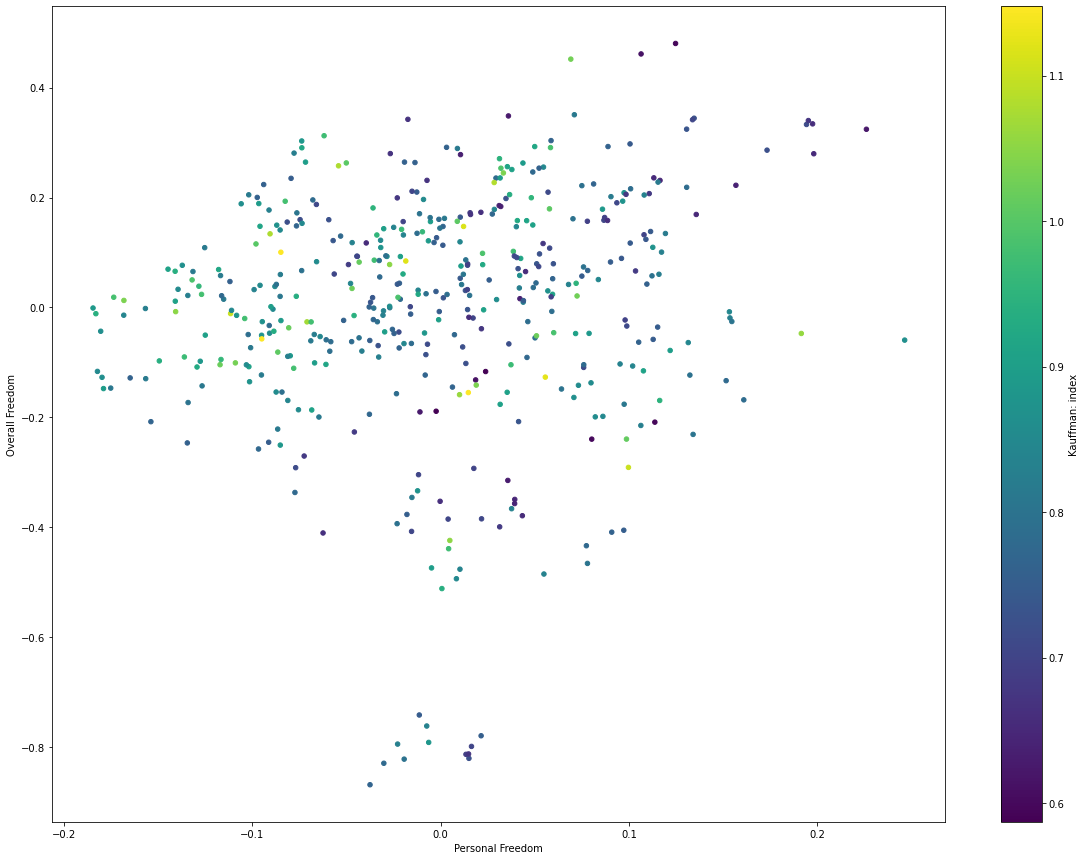

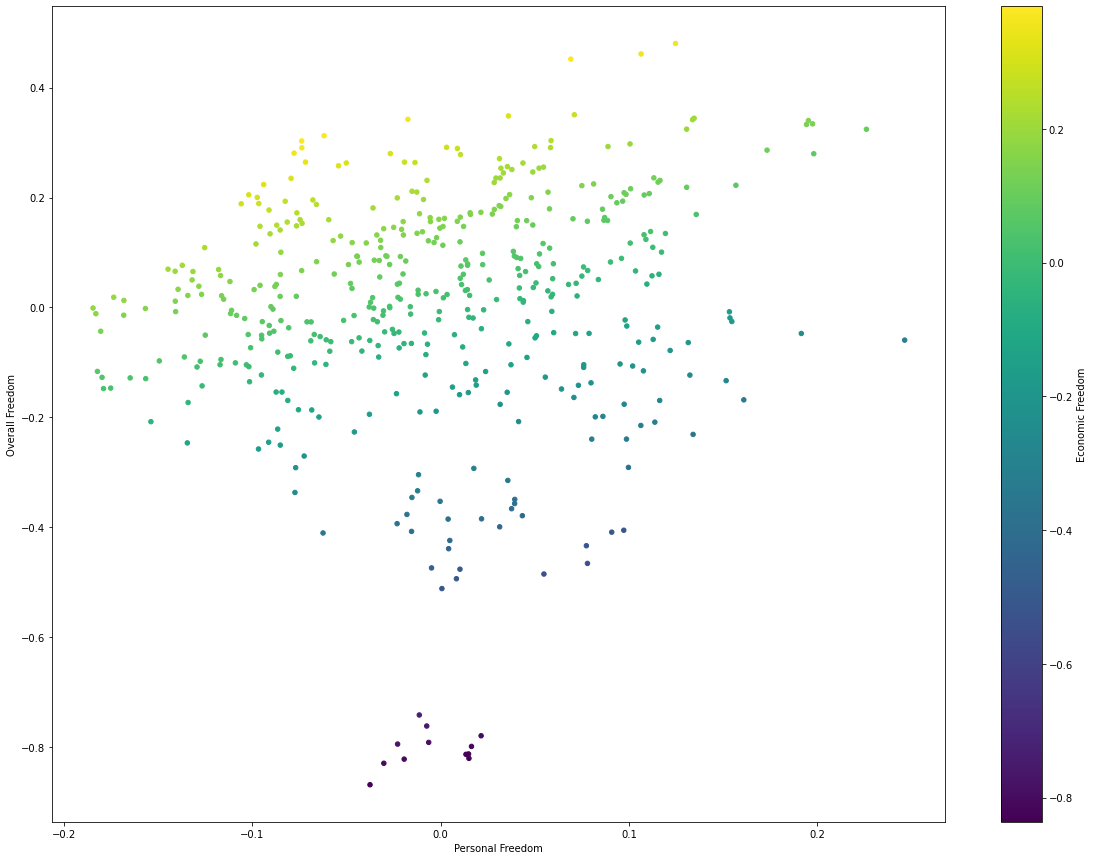

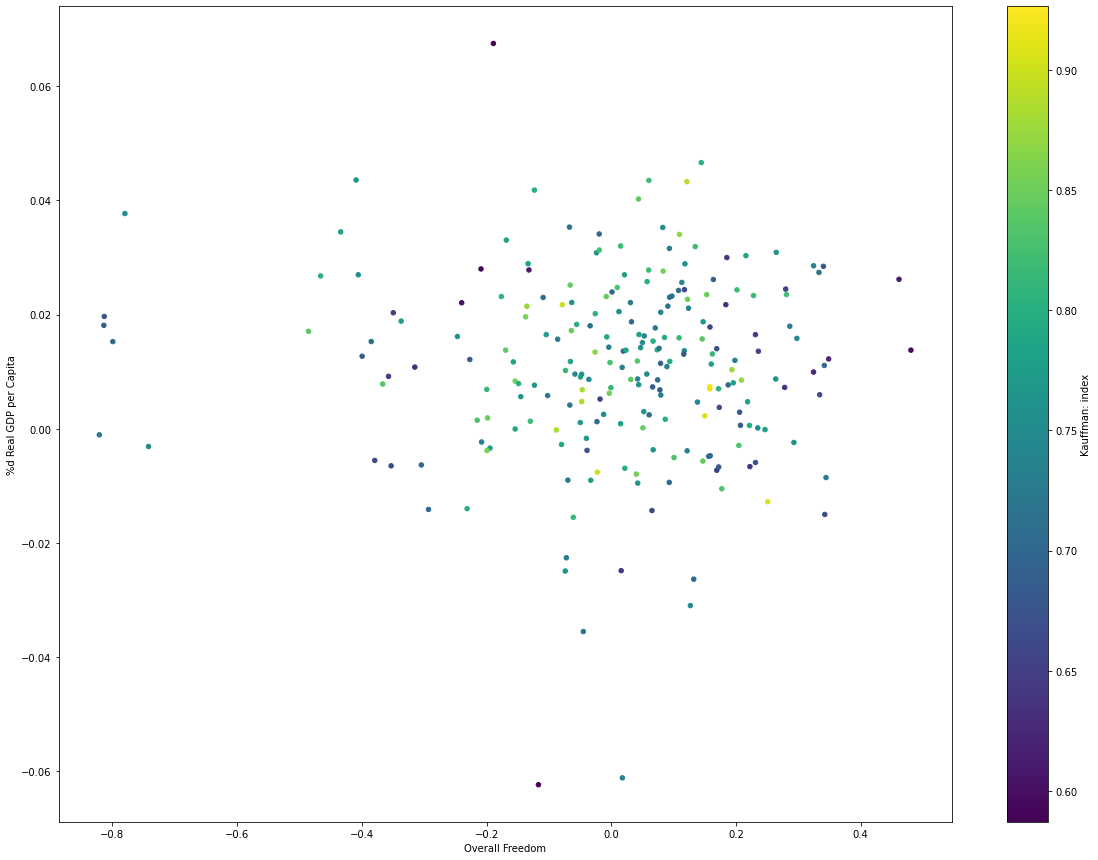

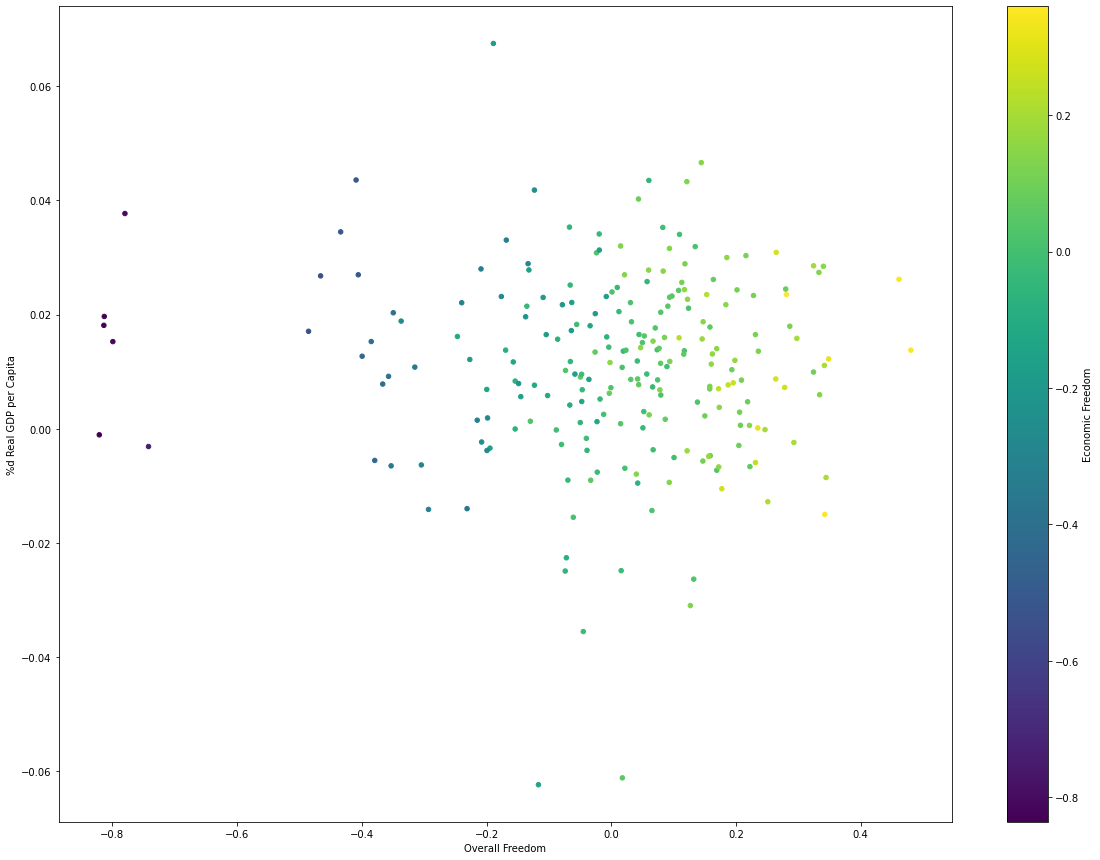

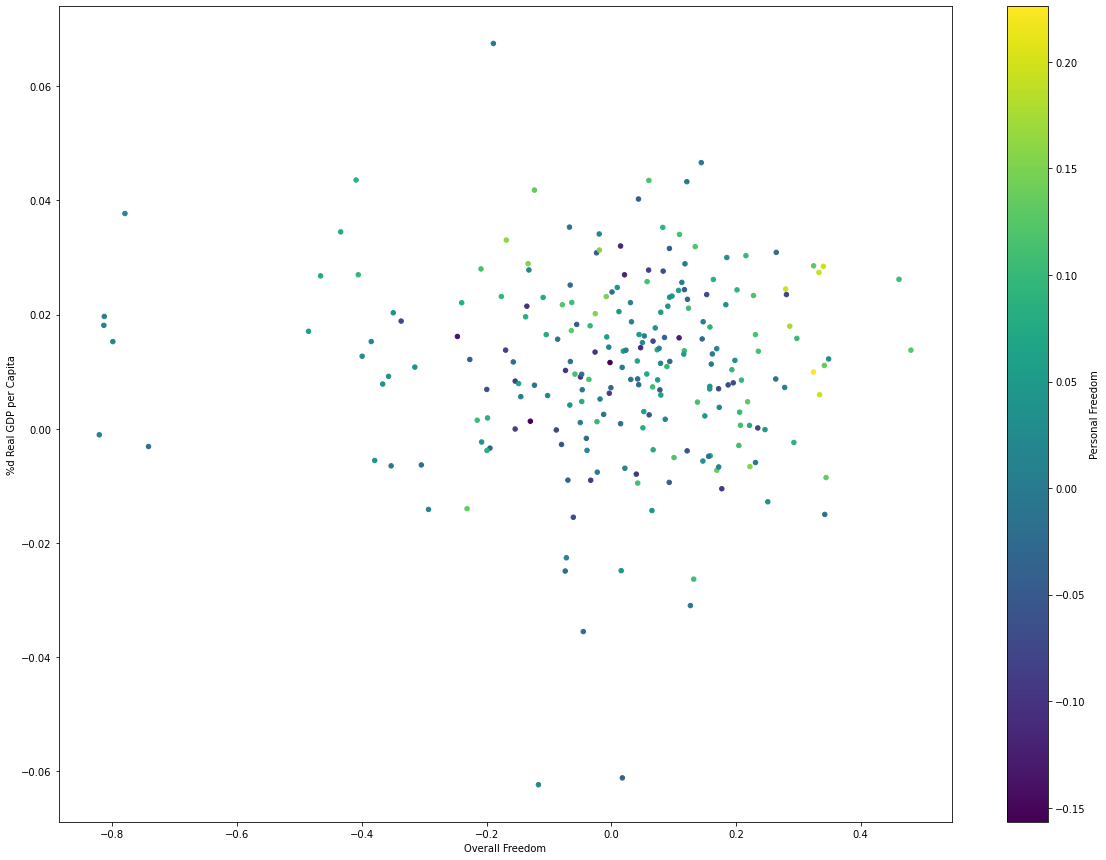

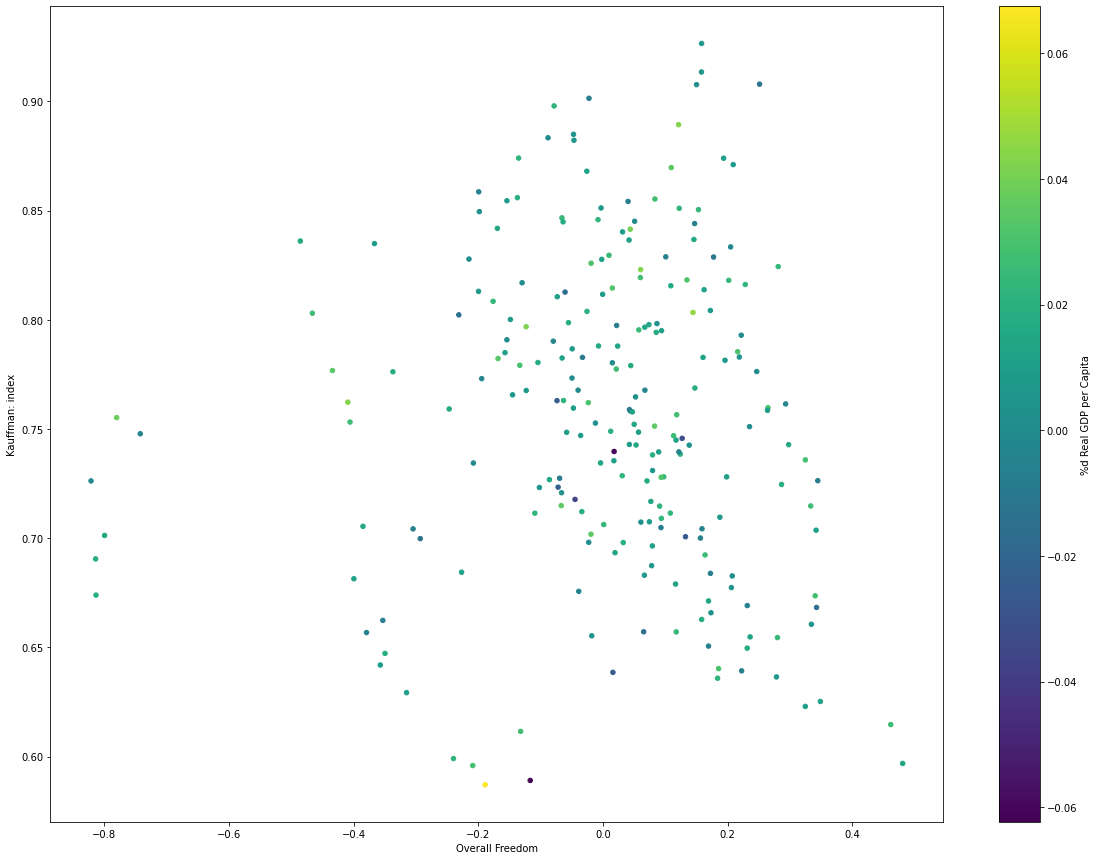

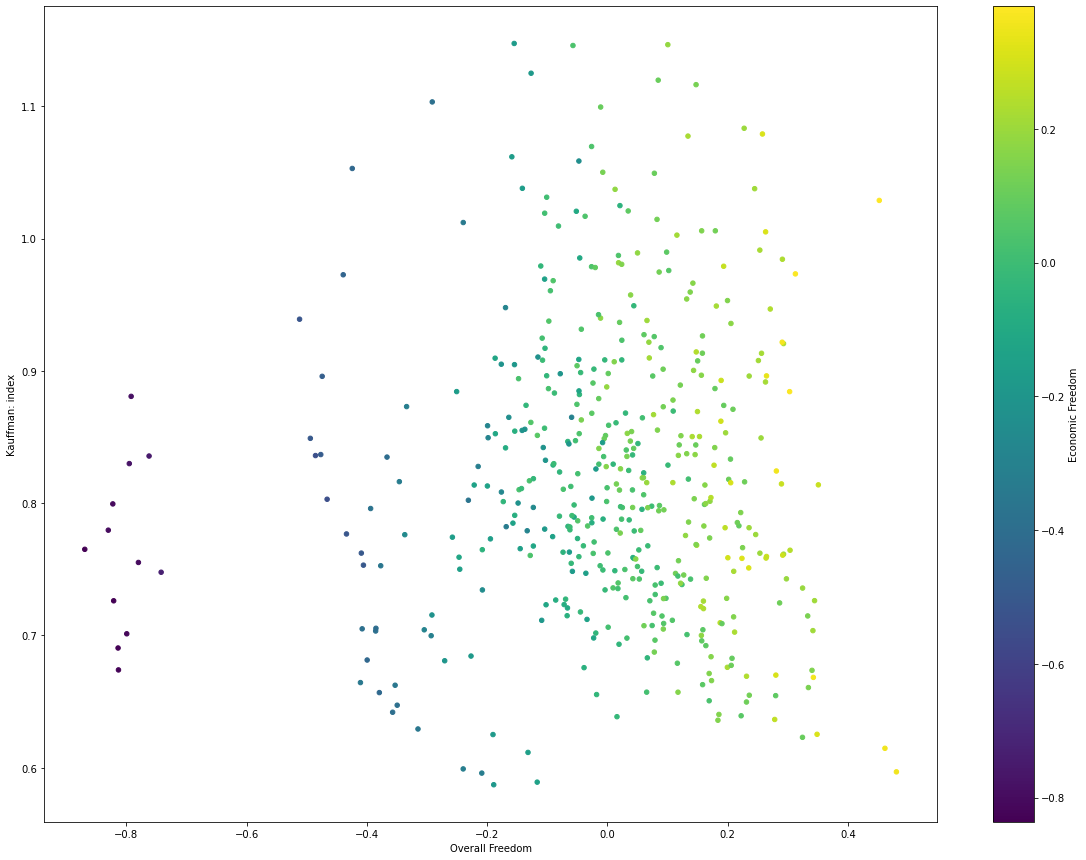

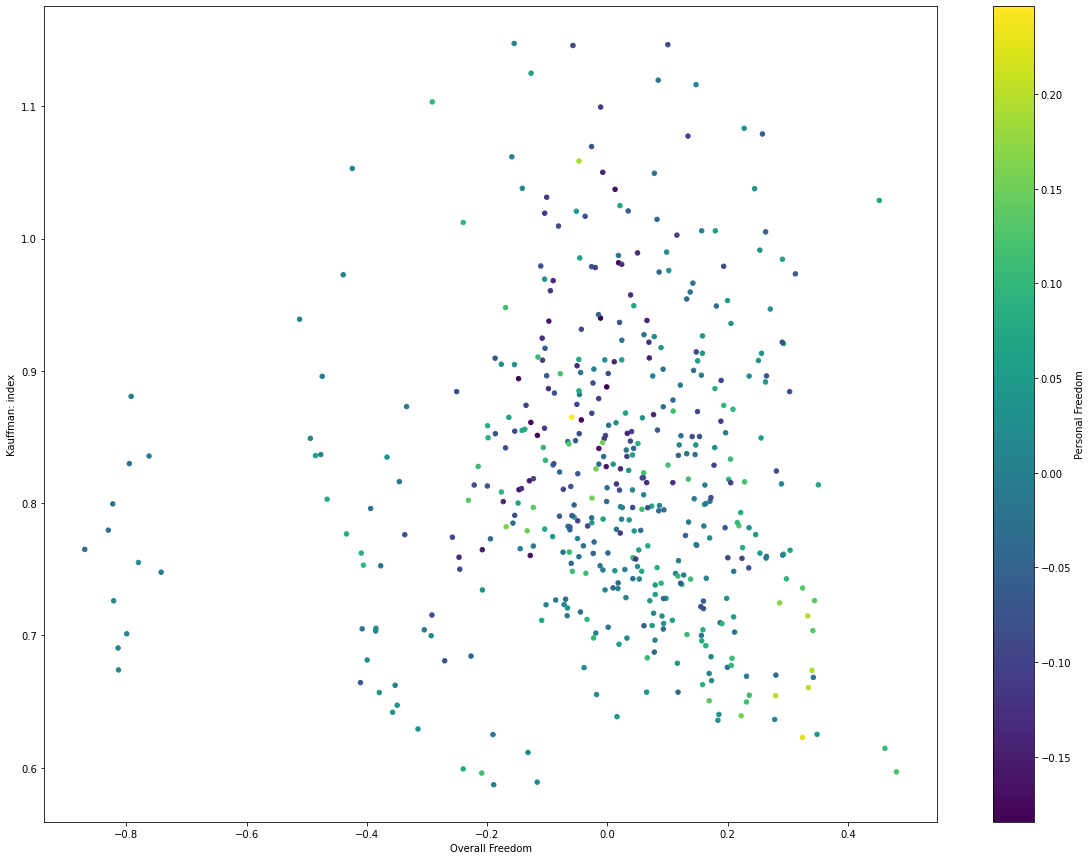

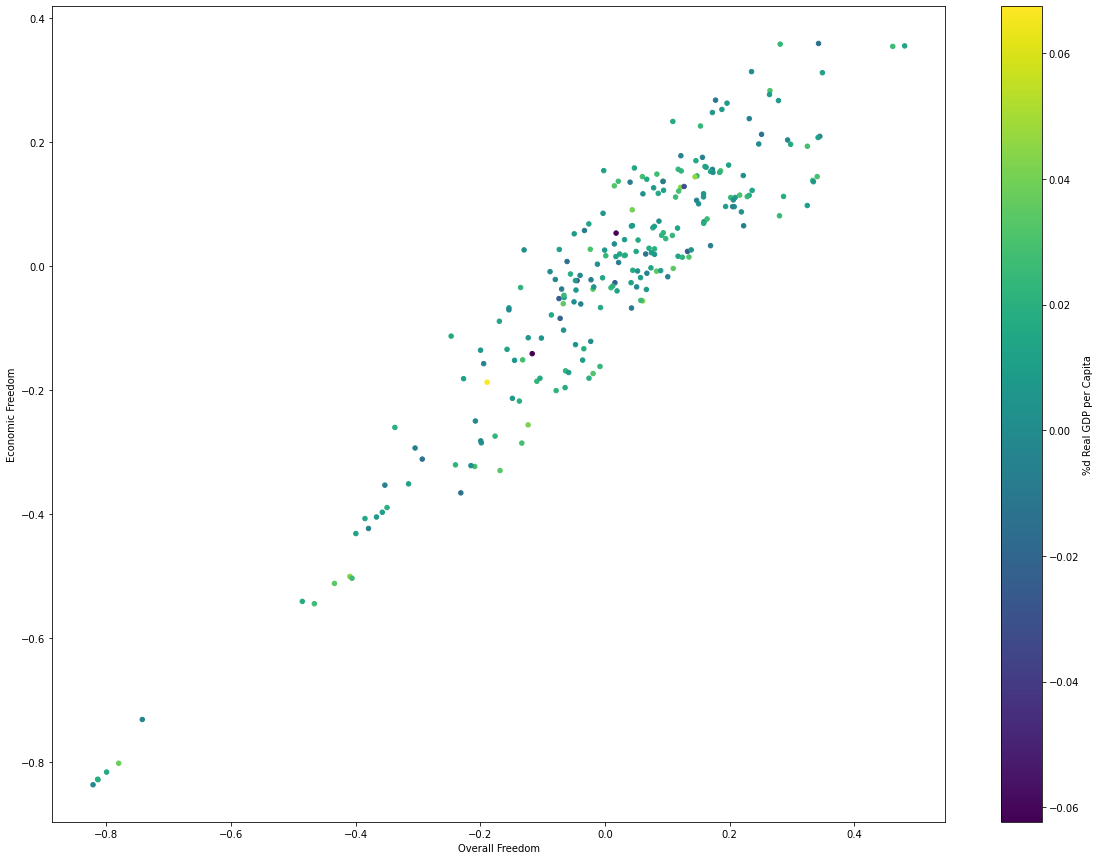

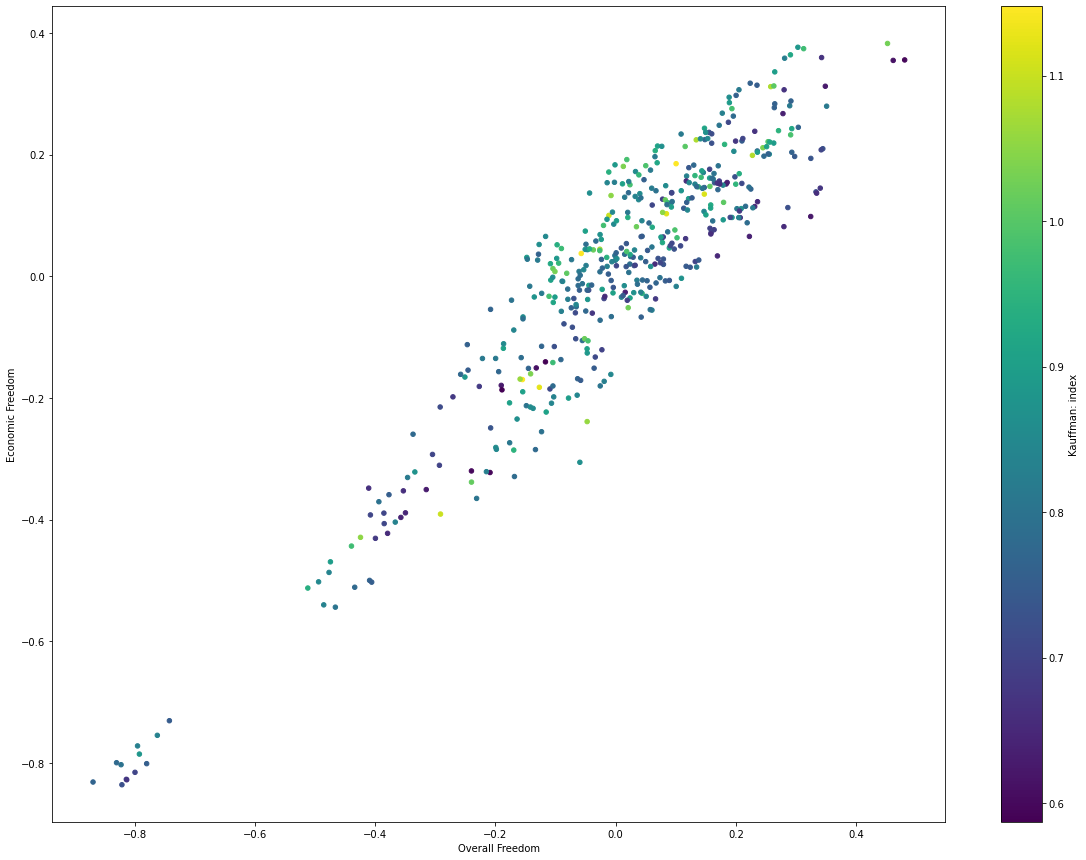

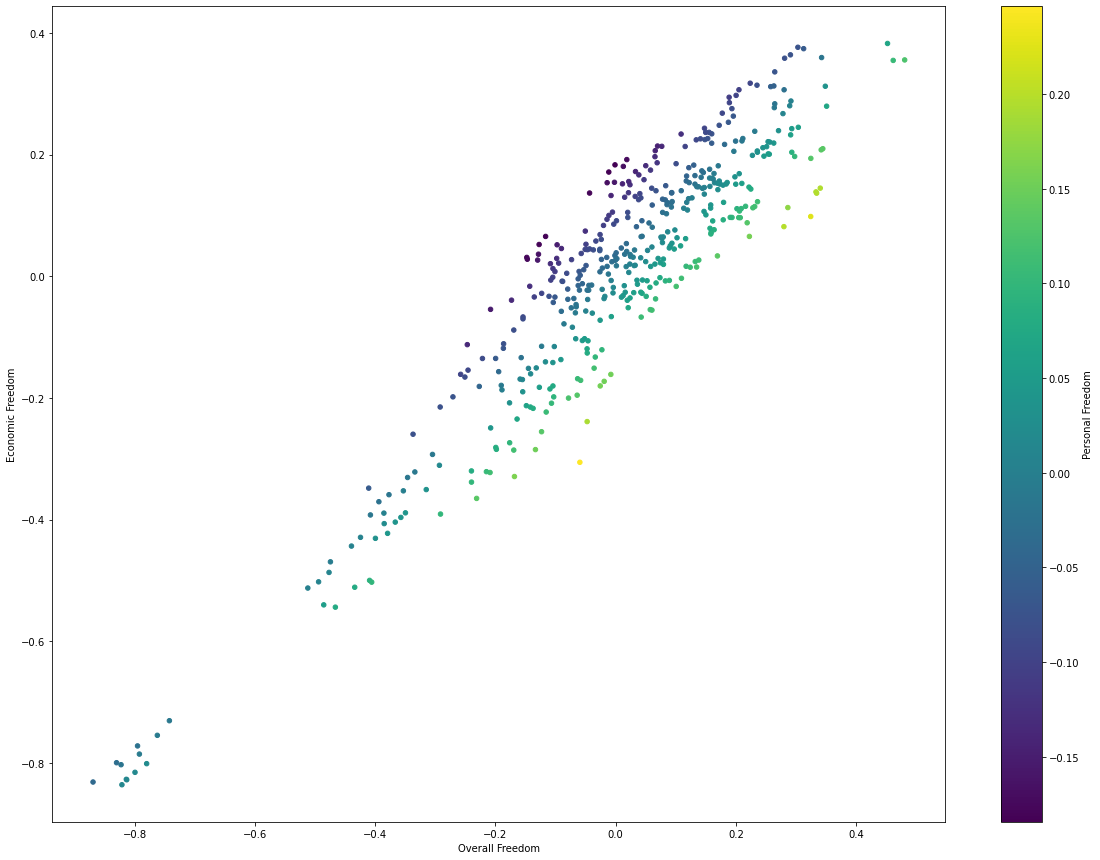

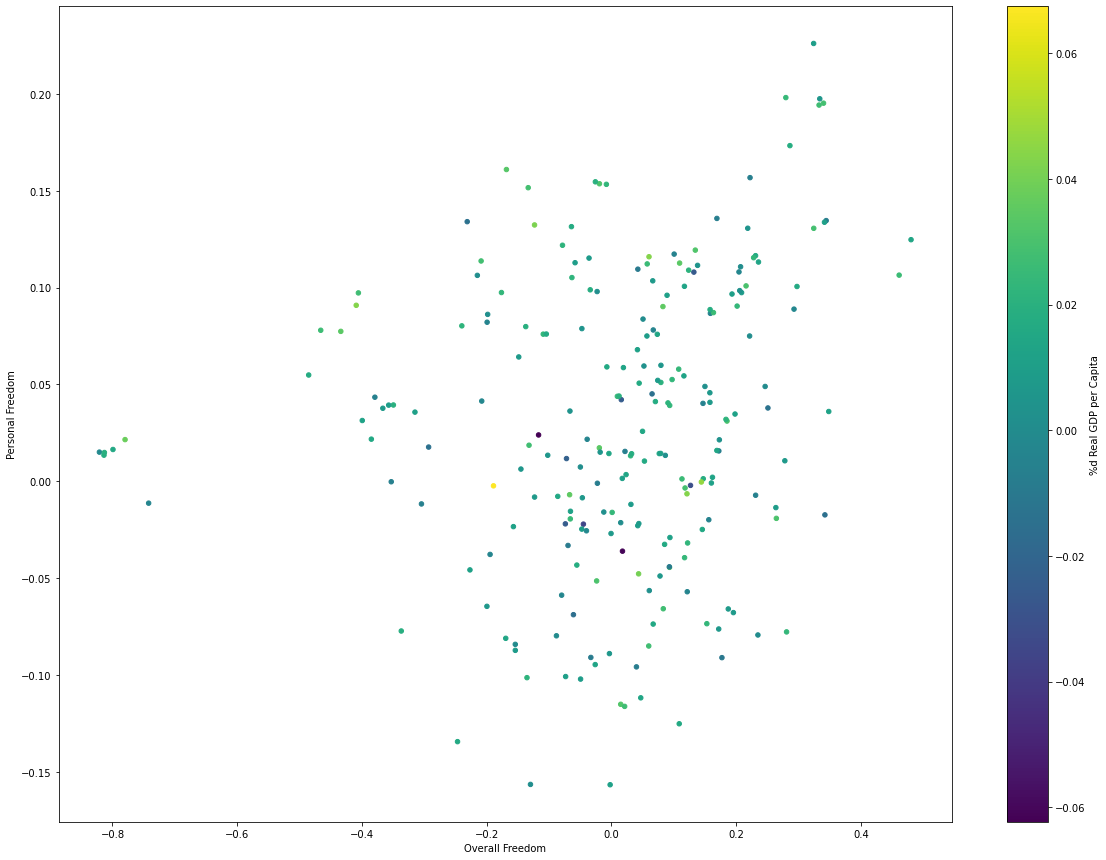

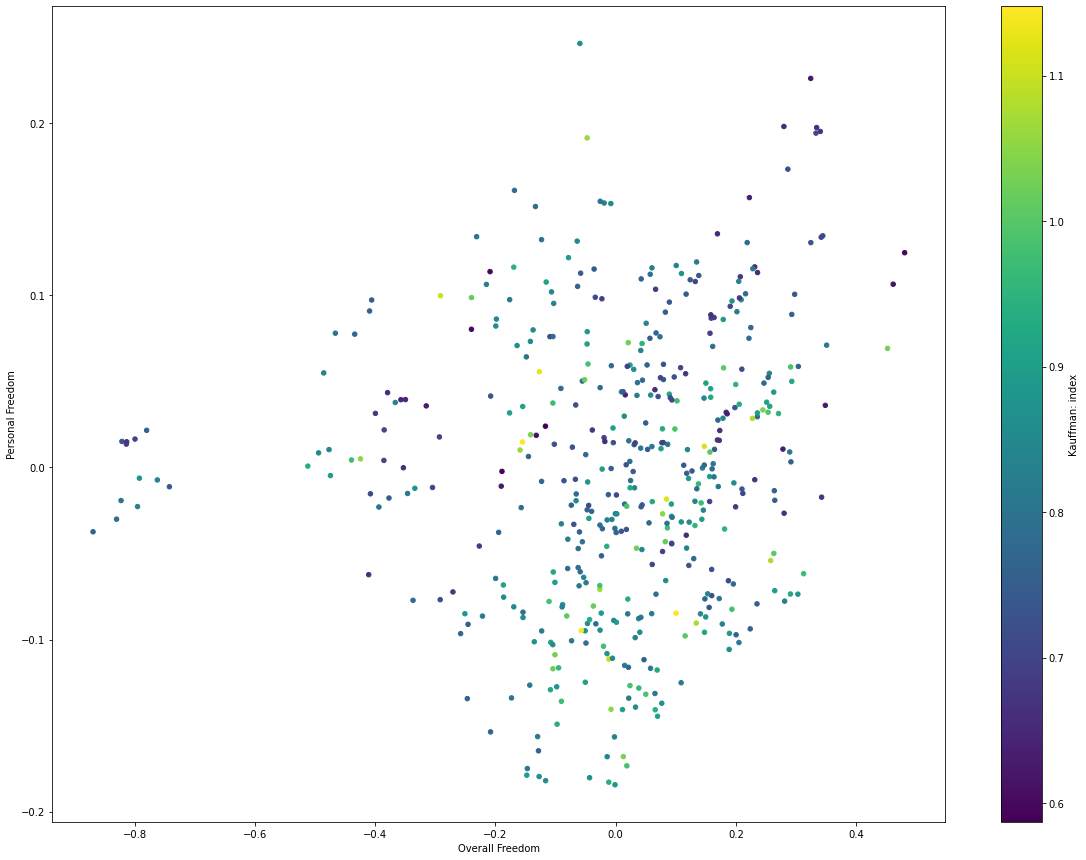

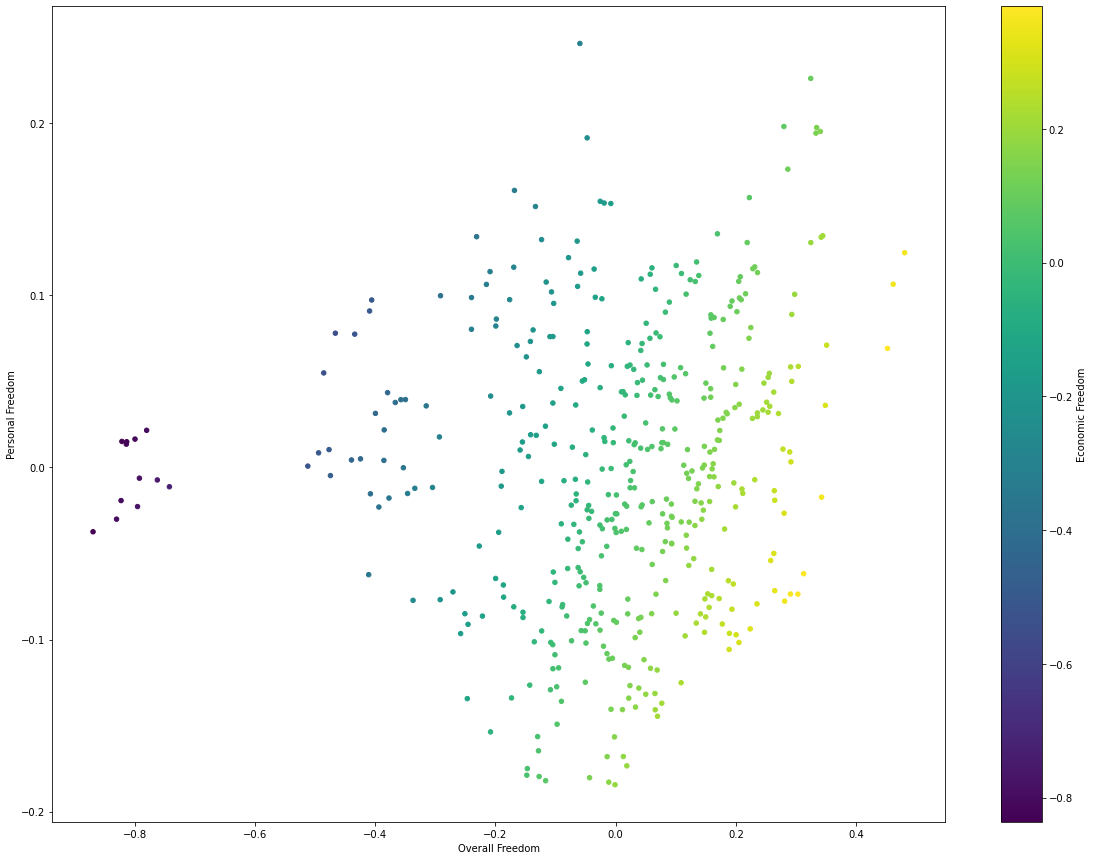

In [12]:
import matplotlib.pyplot as plt
def plot_scatter(data, key1, key2, key3):
    fig, ax = plt.subplots(figsize = (20,15))
    data.plot.scatter(x = key1, y = key2, c= key3,cmap = "viridis", ax = ax)
    plt.show()
    plt.close()
    
keys = "%d Real GDP per Capita", "Kauffman: index", "Economic Freedom", "Personal Freedom", "Overall Freedom"
for key1 in keys:
    for key2 in keys:
        for key3 in keys:
            if key1 != key2 and key1 != key3 and key2 != key3:
                plot_scatter(all_data, key1, key2, key3)


# Panel OLS

In [13]:
#import statsmodels.api as sm
from linearmodels import PanelOLS

def panel_regression(reg_df, x, y, num_exog = 1):
    #results = model.fit(cov_type='HC1')
    if num_exog == 1:
        X = reg_df[[x]]
        X["Constant"] = 1
        Y = reg_df[[y]]
        model = PanelOLS(Y, X, entity_effects=True, time_effects=False)
        results = model.fit(cov_type='clustered', cluster_entity=True)
        reg_df["predict:" + y + "~" + x] = results.predict()
        #reg_df["residual:" + y + "~" + x] = reg_df[y] - results.predict()

        print(results)

        fig, ax = plt.subplots(figsize = (20,14))
        reg_df.plot.scatter(x = x, y = y, ax = ax)
        reg_df.plot.line(x = x, y = "predict:" + y + "~" + x, ax = ax)
    else:
        X = reg_df[x]
        X["Constant"] = 1
        Y = reg_df[y]
        model = PanelOLS(Y, X, entity_effects=True, time_effects=False)
        results = model.fit(cov_type='clustered', cluster_entity=True)
        reg_df["predict:" + y[0]] = results.predict()
        #reg_df["residual:" + y + "~" + x] = reg_df[y] - results.predict()

        print(results)

        fig, ax = plt.subplots(figsize = (20,14))
        reg_df.plot.scatter(x = y[0], y = "predict:" + y[0], ax = ax)

        
        
        
    plt.show()
    plt.close()


                          PanelOLS Estimation Summary                           
Dep. Variable:        Kauffman: index   R-squared:                        0.0341
Estimator:                   PanelOLS   R-squared (Between):             -1.0621
No. Observations:                 461   R-squared (Within):               0.0341
Date:                Thu, Jun 10 2021   R-squared (Overall):             -0.3735
Time:                        20:39:52   Log-likelihood                    490.06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      14.706
Entities:                          51   P-value                           0.0001
Avg Obs:                       9.0392   Distribution:                   F(1,416)
Min Obs:                       0.0000                                           
Max Obs:                       12.000   F-statistic (robust):             7.0388
                            

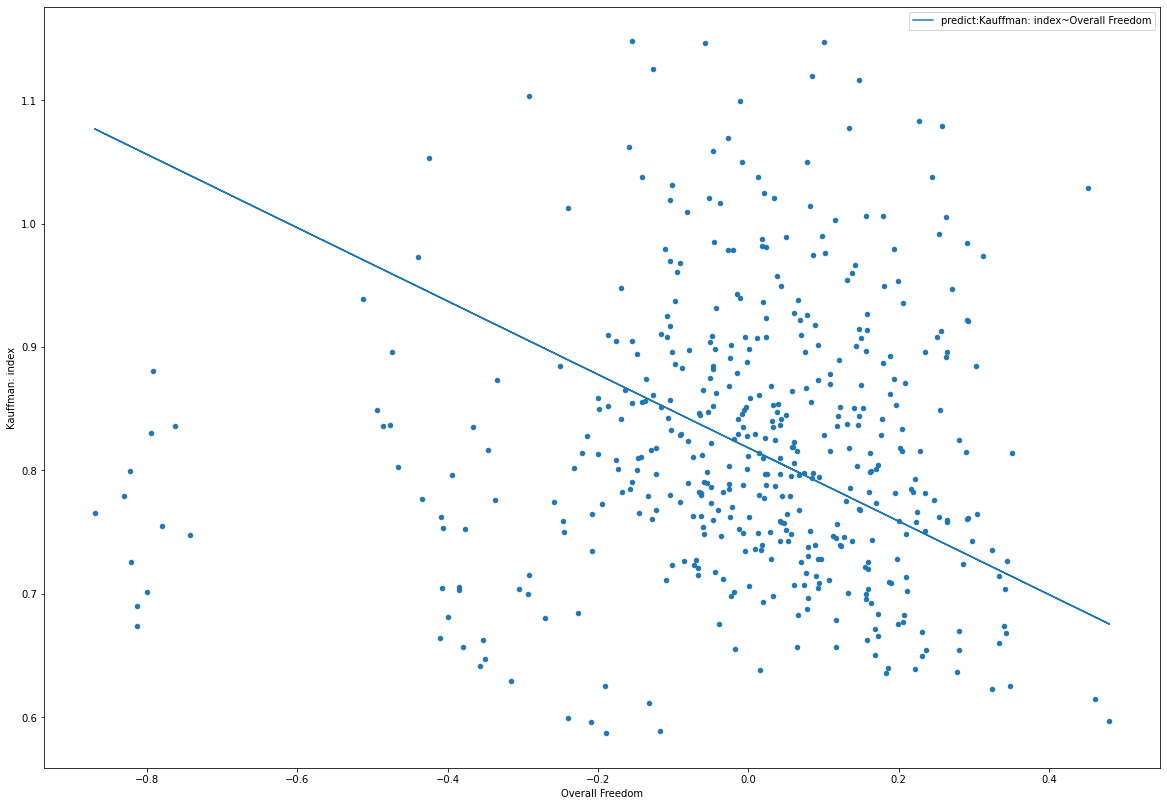

In [14]:
states.remove("United States")

x = "Overall Freedom"
y = "Kauffman: index"
reg_df = all_data.loc[states][[x,y]].dropna()

panel_regression(reg_df, x, y)


                          PanelOLS Estimation Summary                           
Dep. Variable:        Kauffman: index   R-squared:                        0.4625
Estimator:                   PanelOLS   R-squared (Between):             -1.6614
No. Observations:                 461   R-squared (Within):               0.4625
Date:                Thu, Jun 10 2021   R-squared (Overall):             -0.3059
Time:                        20:39:52   Log-likelihood                    625.17
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      357.98
Entities:                          51   P-value                           0.0000
Avg Obs:                       9.0392   Distribution:                   F(1,416)
Min Obs:                       0.0000                                           
Max Obs:                       12.000   F-statistic (robust):             86.658
                            

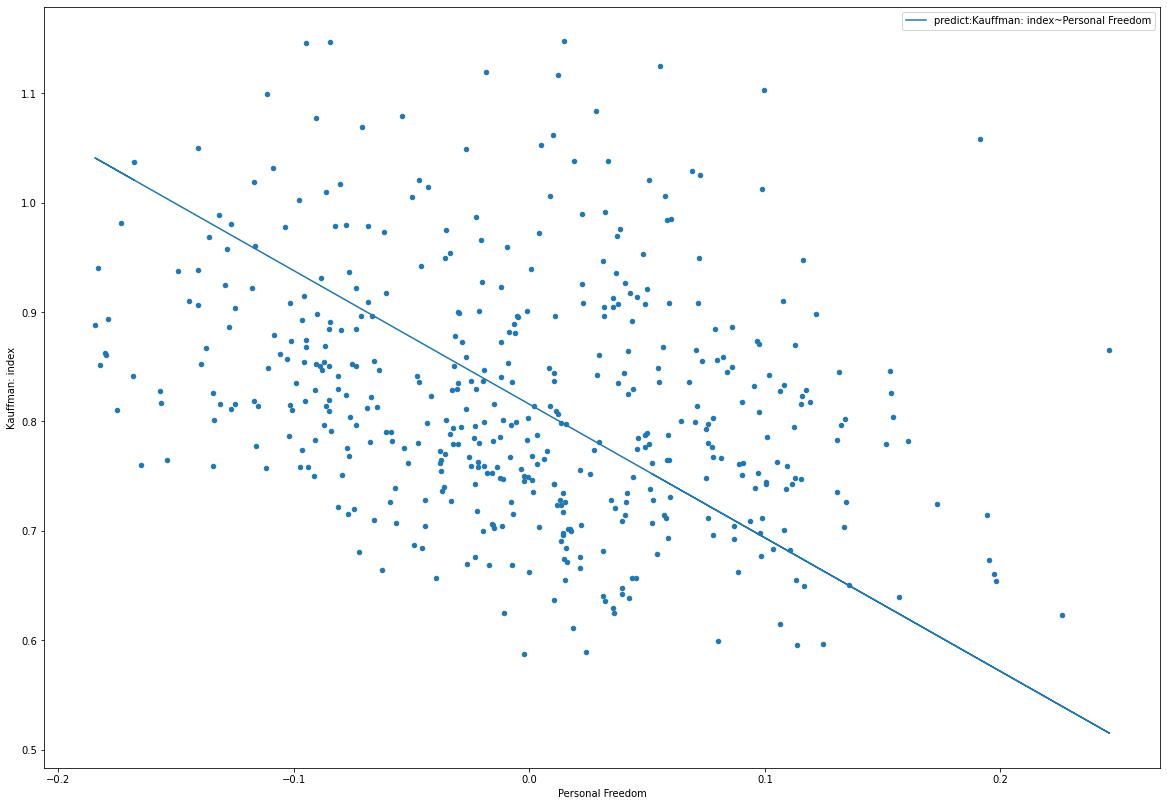

In [15]:
#import statsmodels.api as sm
import matplotlib.pyplot as plt
from linearmodels import PanelOLS

x = "Personal Freedom"
y = "Kauffman: index"
reg_df = all_data.loc[states][[x,y]].dropna()
panel_regression(reg_df, x, y)


                          PanelOLS Estimation Summary                           
Dep. Variable:        Kauffman: index   R-squared:                        0.1700
Estimator:                   PanelOLS   R-squared (Between):             -2.4712
No. Observations:                 461   R-squared (Within):               0.1700
Date:                Thu, Jun 10 2021   R-squared (Overall):             -1.4158
Time:                        20:39:53   Log-likelihood                    525.02
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      85.235
Entities:                          51   P-value                           0.0000
Avg Obs:                       9.0392   Distribution:                   F(1,416)
Min Obs:                       0.0000                                           
Max Obs:                       12.000   F-statistic (robust):             55.697
                            

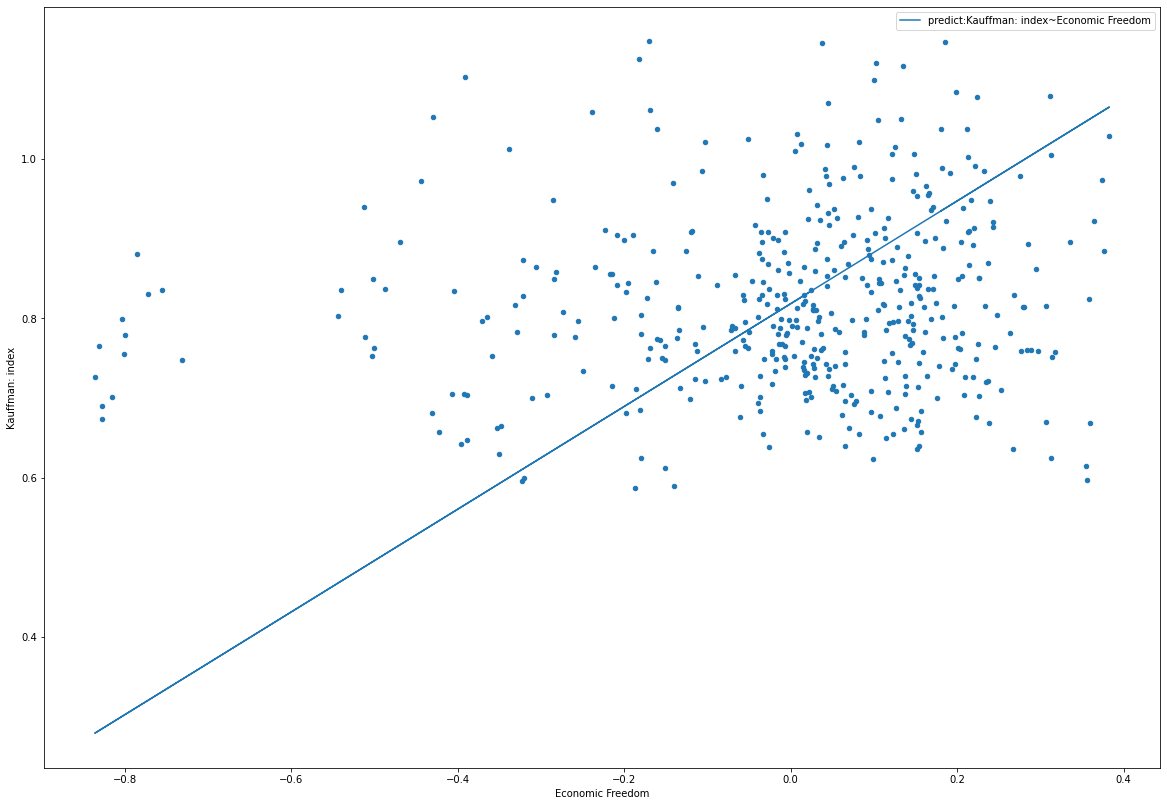

In [16]:
x = "Economic Freedom"
y = "Kauffman: index"
reg_df = all_data.loc[states][[x,y]].dropna()

panel_regression(reg_df, x, y)

                            PanelOLS Estimation Summary                             
Dep. Variable:     %d Real GDP per Capita   R-squared:                        0.0258
Estimator:                       PanelOLS   R-squared (Between):             -0.6546
No. Observations:                     229   R-squared (Within):               0.0258
Date:                    Thu, Jun 10 2021   R-squared (Overall):             -0.1420
Time:                            20:43:06   Log-likelihood                    654.66
Cov. Estimator:                 Clustered                                           
                                            F-statistic:                      4.9729
Entities:                              51   P-value                           0.0269
Avg Obs:                           4.4902   Distribution:                   F(1,188)
Min Obs:                           0.0000                                           
Max Obs:                           6.0000   F-statistic (robust):

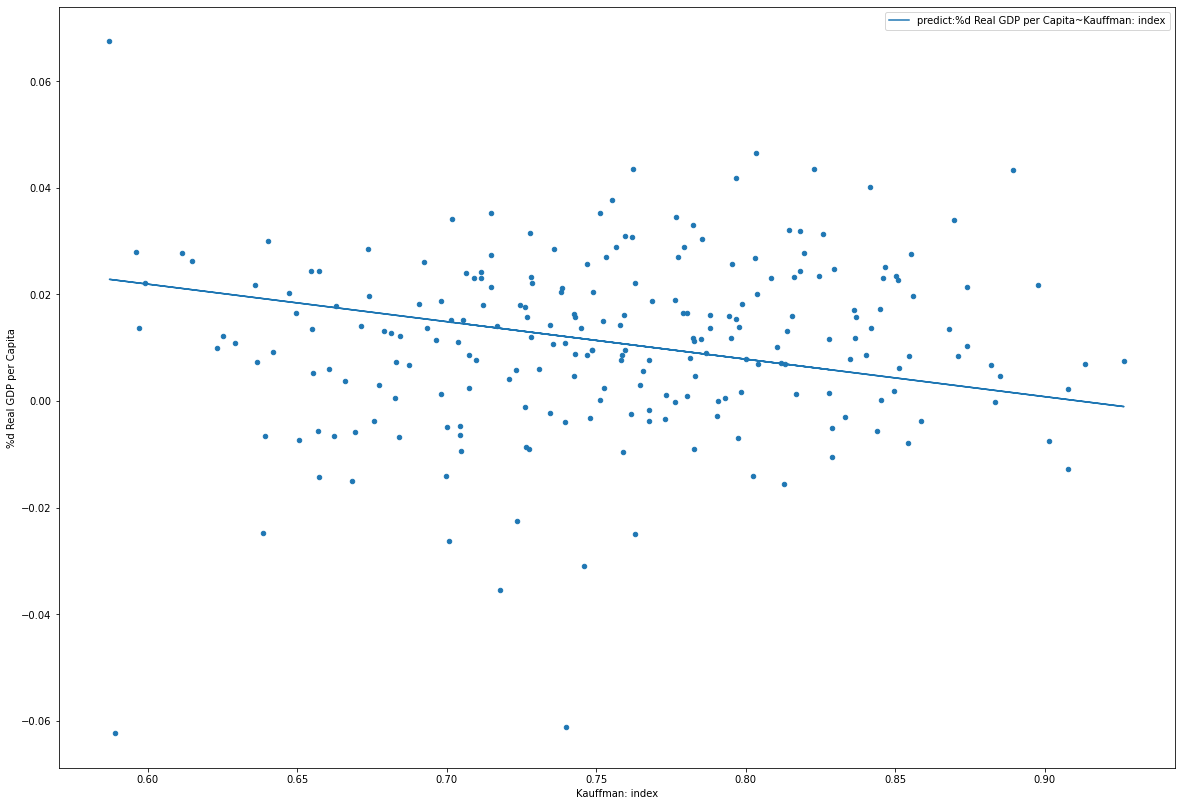

In [33]:
x = "Kauffman: index"
y = "%d Real GDP per Capita"
reg_df = all_data.loc[states][[x,y]].dropna()
panel_regression(reg_df, x, y)


                            PanelOLS Estimation Summary                             
Dep. Variable:     %d Real GDP per Capita   R-squared:                        0.0234
Estimator:                       PanelOLS   R-squared (Between):             -1.3100
No. Observations:                     229   R-squared (Within):               0.0234
Date:                    Thu, Jun 10 2021   R-squared (Overall):             -0.3366
Time:                            20:43:25   Log-likelihood                    654.38
Cov. Estimator:                 Clustered                                           
                                            F-statistic:                      4.5020
Entities:                              51   P-value                           0.0352
Avg Obs:                           4.4902   Distribution:                   F(1,188)
Min Obs:                           0.0000                                           
Max Obs:                           6.0000   F-statistic (robust):

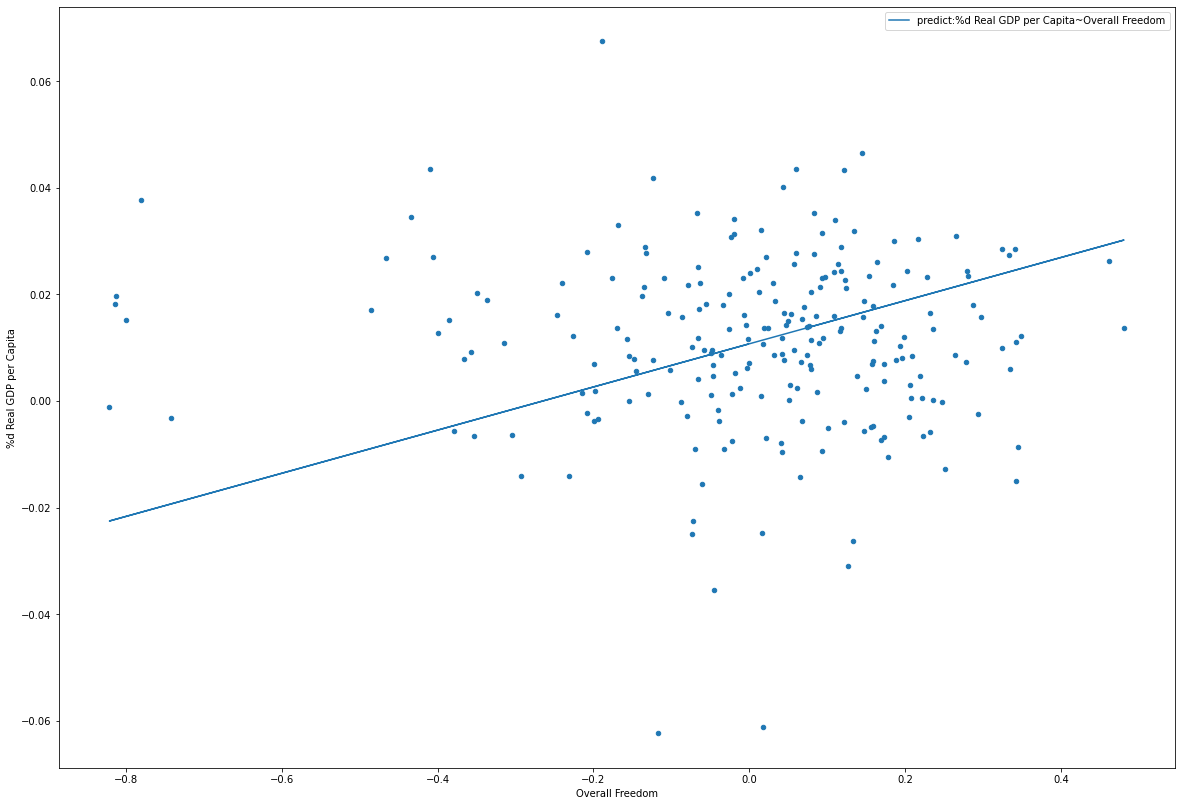

In [35]:
x = "Overall Freedom"
y = "%d Real GDP per Capita"
reg_df = all_data.loc[states][[x,y]].dropna()
panel_regression(reg_df, x, y)


                            PanelOLS Estimation Summary                             
Dep. Variable:     %d Real GDP per Capita   R-squared:                        0.9662
Estimator:                       PanelOLS   R-squared (Between):              0.9476
No. Observations:                     229   R-squared (Within):               0.9662
Date:                    Thu, Jun 10 2021   R-squared (Overall):              0.9622
Time:                            20:39:54   Log-likelihood                    1039.6
Cov. Estimator:                 Clustered                                           
                                            F-statistic:                      5376.7
Entities:                              51   P-value                           0.0000
Avg Obs:                           4.4902   Distribution:                   F(1,188)
Min Obs:                           0.0000                                           
Max Obs:                           6.0000   F-statistic (robust):

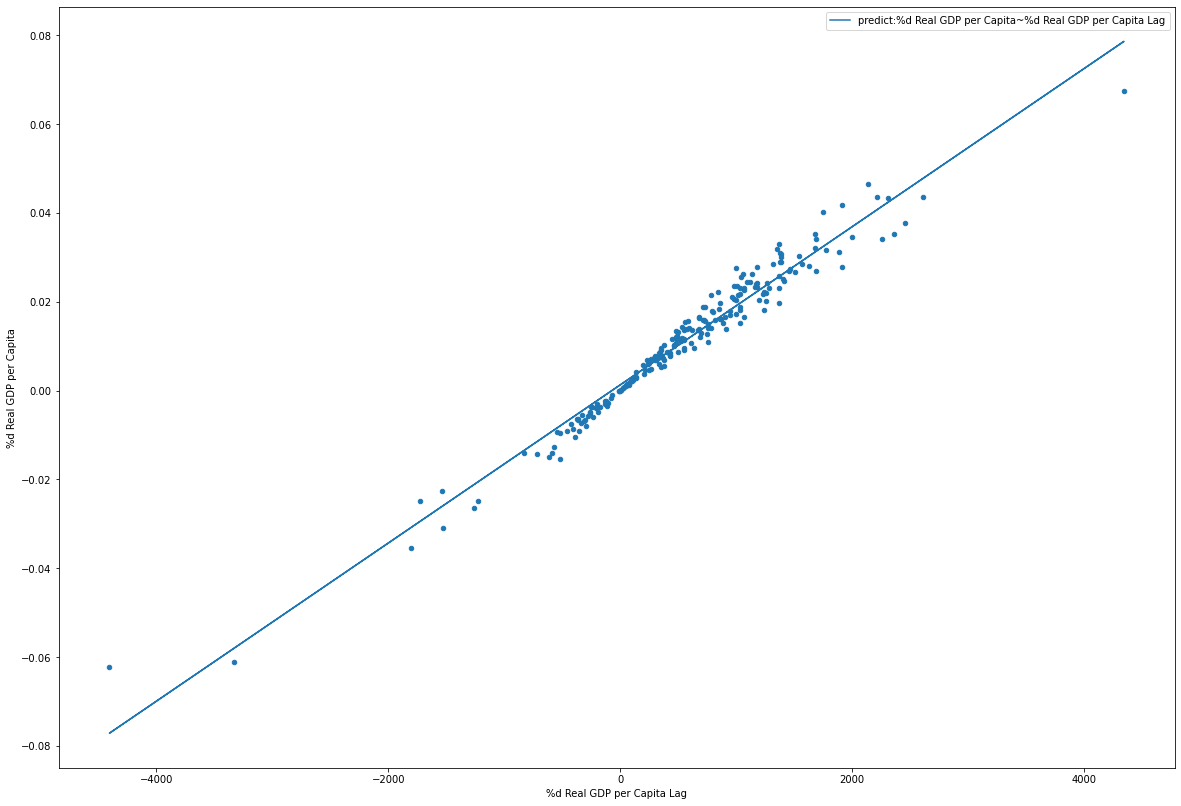

In [18]:
x = "%d Real GDP per Capita Lag"
y = "%d Real GDP per Capita"
reg_df = all_data.loc[states][[x,y]].dropna()
panel_regression(reg_df, x, y)

                            PanelOLS Estimation Summary                             
Dep. Variable:     %d Real GDP per Capita   R-squared:                        0.9673
Estimator:                       PanelOLS   R-squared (Between):              0.9350
No. Observations:                     229   R-squared (Within):               0.9673
Date:                    Thu, Jun 10 2021   R-squared (Overall):              0.9592
Time:                            20:44:35   Log-likelihood                    1043.2
Cov. Estimator:                 Clustered                                           
                                            F-statistic:                      1832.3
Entities:                              51   P-value                           0.0000
Avg Obs:                           4.4902   Distribution:                   F(3,186)
Min Obs:                           0.0000                                           
Max Obs:                           6.0000   F-statistic (robust):

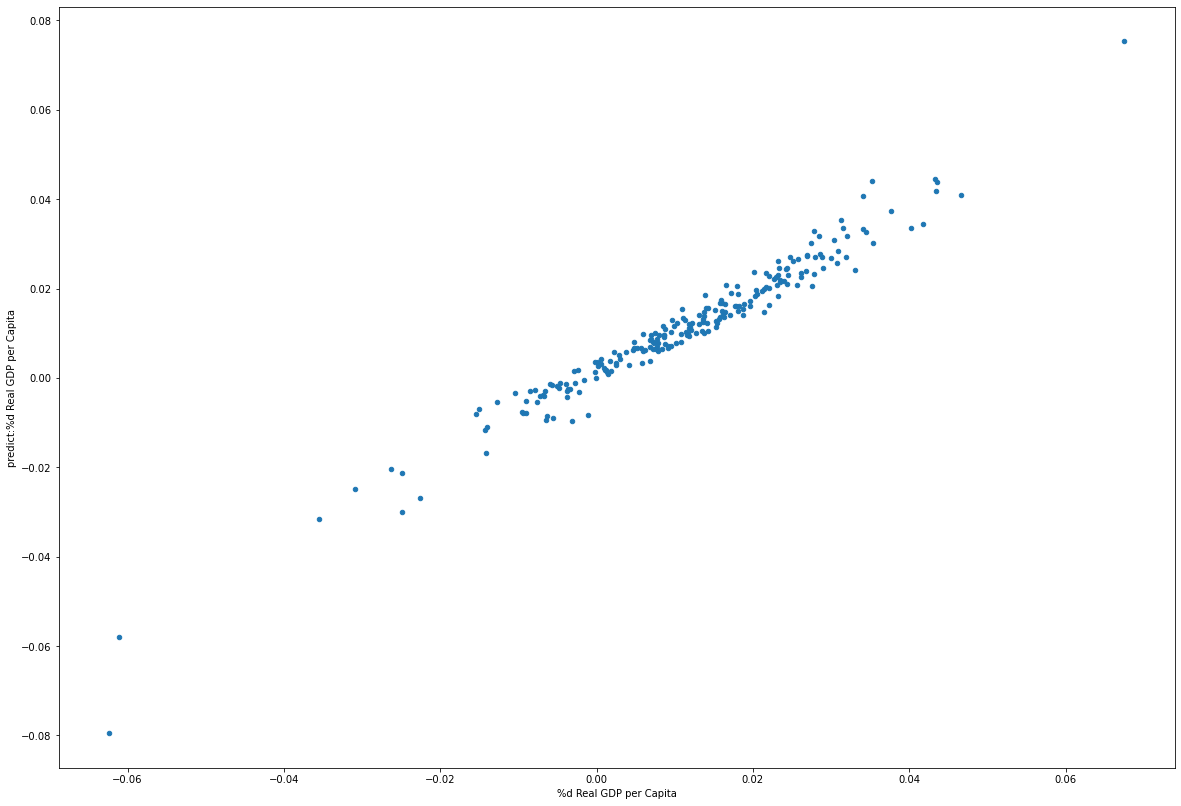

In [38]:
x = ["Overall Freedom", "Kauffman: index", "%d Real GDP per Capita Lag"]
y = ["%d Real GDP per Capita"]
reg_df = all_data.loc[states][x+y].dropna()
panel_regression(reg_df, x, y, num_exog = len(x))

                            PanelOLS Estimation Summary                             
Dep. Variable:     %d Real GDP per Capita   R-squared:                        0.9678
Estimator:                       PanelOLS   R-squared (Between):              0.9127
No. Observations:                     229   R-squared (Within):               0.9678
Date:                    Thu, Jun 10 2021   R-squared (Overall):              0.9533
Time:                            20:44:04   Log-likelihood                    1045.2
Cov. Estimator:                 Clustered                                           
                                            F-statistic:                      1391.8
Entities:                              51   P-value                           0.0000
Avg Obs:                           4.4902   Distribution:                   F(4,185)
Min Obs:                           0.0000                                           
Max Obs:                           6.0000   F-statistic (robust):

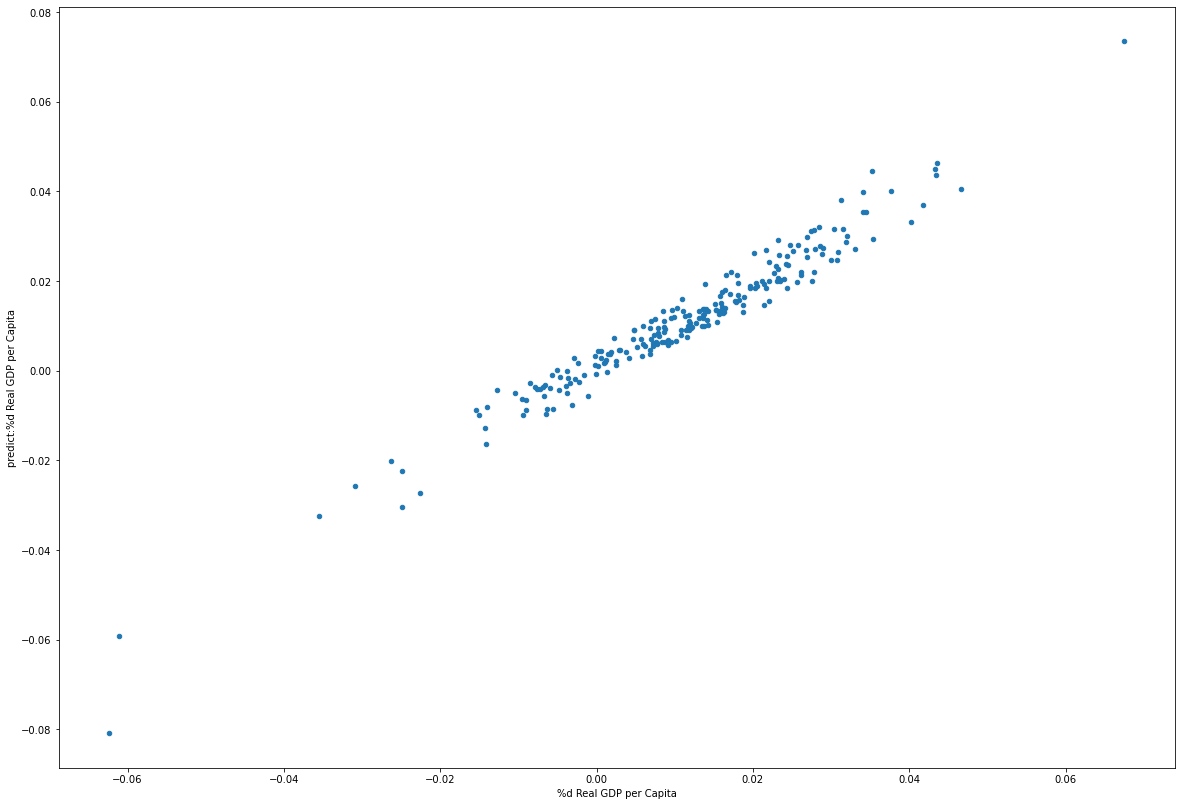

In [36]:
x = ["Personal Freedom", "Economic Freedom", "Kauffman: index", "%d Real GDP per Capita Lag"]
y = ["%d Real GDP per Capita"]
reg_df = all_data.loc[states][x+y].dropna()
panel_regression(reg_df, x, y, num_exog = len(x))

In [37]:
import pingouin
reg_df[x + y].pcorr()

Personal Freedom  Economic Freedom  \
Personal Freedom                    1.000000         -0.119824   
Economic Freedom                   -0.119824          1.000000   
Kauffman: index                    -0.212732          0.000247   
%d Real GDP per Capita Lag          0.058088         -0.316465   
%d Real GDP per Capita             -0.030951          0.300639   

                            Kauffman: index  %d Real GDP per Capita Lag  \
Personal Freedom                  -0.212732                    0.058088   
Economic Freedom                   0.000247                   -0.316465   
Kauffman: index                    1.000000                   -0.054019   
%d Real GDP per Capita Lag        -0.054019                    1.000000   
%d Real GDP per Capita             0.072287                    0.982338   

                            %d Real GDP per Capita  
Personal Freedom                         -0.030951  
Economic Freedom                          0.300639  
Kauffman: index                           0.072287  
%d Real GDP per Capita Lag                0.982338  
%d Real GDP per Capita                    1.000000

Maybe consider using Economic Freedom of North America Instead
https://www.fraserinstitute.org/studies/economic-freedom-of-north-america-2020

# International Data

In [21]:
#https://www.fraserinstitute.org/economic-freedom/dataset?geozone=world&page=dataset&min-year=2&max-year=0&filter=0
fraser_data = pd.read_excel("efw-2020-master-index-data-for-researchers.xlsx", 
    sheet_name = "EFW Panel Data 2020 Report ", index_col = [1,0])
fraser_ratings = {"Area1":"Size of Government",
                 "Area2":"Legal Systems and Property Rights",
                 "Area3":"Sound Money",
                 "Area4":"Freedom to Trade Internationally",
                 "Area5":"Regulation"}
fraser_data

Countries   Summary    Area 1    Area 2    Area 3  \
ISO_Code Year                                                          
ALB      2018        Albania  7.801329  8.085544  5.173414  9.822491   
DZA      2018        Algeria  4.967744  4.241707  4.533636  7.921634   
AGO      2018         Angola  4.749723  7.305068  3.433276  4.704104   
ARG      2018      Argentina  5.782274  6.048118  4.634890  5.065075   
ARM      2018        Armenia  7.921872  7.847084  5.982107  9.555873   
...                      ...       ...       ...       ...       ...   
VEN      1970  Venezuela, RB  6.311915  4.731849  5.780454  9.706218   
VNM      1970        Vietnam       NaN       NaN  3.520284       NaN   
YEM      1970    Yemen, Rep.       NaN       NaN       NaN       NaN   
ZMB      1970         Zambia  3.608195  1.849755  4.903345  5.136505   
ZWE      1970       Zimbabwe       NaN       NaN  2.084432  5.493741   

                 Area 4    Area 5  
ISO_Code Year                      
ALB      2018  8.203462  7.721734  
DZA      2018  2.578038  5.563704  
AGO      2018  2.919964  5.386200  
ARG      2018  7.405885  5.757401  
ARM      2018  8.461977  7.762321  
...                 ...       ...  
VEN      1970  7.528176  4.954819  
VNM      1970       NaN       NaN  
YEM      1970       NaN       NaN  
ZMB      1970       NaN  5.471487  
ZWE      1970       NaN       NaN  

[4050 rows x 7 columns]

In [22]:
#https://ourworldindata.org/grapher/cross-country-literacy-rates?tab=map&country=East+Asia+%26+Pacific~Sub-Saharan+Africa~Europe+%26+Central+Asia~Latin+America+%26+Caribbean~Middle+East+%26+North+Africa~South+Asia
literacy_data = pd.read_csv("country-literacy-rates.csv", index_col = [1,2])
literacy_data.rename(columns={"Literacy rates (World Bank, CIA World Factbook, and other sources)":"Literacy"}, inplace = True)
literacy_data.loc["FRA"]


Entity  Literacy
Year                  
1475  France       6.0
1550  France      19.0
1650  France      29.0
1750  France      29.0
1820  France      38.0
1870  France      69.0
2003  France      99.0

In [23]:
# https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2020
gdp_data = pd.read_excel("mpd2020.xlsx", sheet_name=[2], index_col = [0,2])[2]
gdp_data

country      gdppc          pop
countrycode year                                     
AFG         1820  Afghanistan        NaN   3280.00000
            1870  Afghanistan        NaN   4207.00000
            1913  Afghanistan        NaN   5730.00000
            1950  Afghanistan  1156.0000   8150.00000
            1951  Afghanistan  1170.0000   8284.00000
...                       ...        ...          ...
ZWE         2014     Zimbabwe  1594.0000  13313.99205
            2015     Zimbabwe  1560.0000  13479.13812
            2016     Zimbabwe  1534.0000  13664.79457
            2017     Zimbabwe  1582.3662  13870.26413
            2018     Zimbabwe  1611.4052  14096.61179

[21682 rows x 3 columns]

In [24]:
import numpy as np
for key in ["gdppc", "pop"]:
    fraser_data[key] = gdp_data[key]
fraser_data

Countries   Summary    Area 1    Area 2    Area 3  \
ISO_Code Year                                                          
ALB      2018        Albania  7.801329  8.085544  5.173414  9.822491   
DZA      2018        Algeria  4.967744  4.241707  4.533636  7.921634   
AGO      2018         Angola  4.749723  7.305068  3.433276  4.704104   
ARG      2018      Argentina  5.782274  6.048118  4.634890  5.065075   
ARM      2018        Armenia  7.921872  7.847084  5.982107  9.555873   
...                      ...       ...       ...       ...       ...   
VEN      1970  Venezuela, RB  6.311915  4.731849  5.780454  9.706218   
VNM      1970        Vietnam       NaN       NaN  3.520284       NaN   
YEM      1970    Yemen, Rep.       NaN       NaN       NaN       NaN   
ZMB      1970         Zambia  3.608195  1.849755  4.903345  5.136505   
ZWE      1970       Zimbabwe       NaN       NaN  2.084432  5.493741   

                 Area 4    Area 5       gdppc           pop  
ISO_Code Year                                                
ALB      2018  8.203462  7.721734  11104.1665   3062.734429  
DZA      2018  2.578038  5.563704  14228.0250  41489.774540  
AGO      2018  2.919964  5.386200   7771.4418  22637.958640  
ARG      2018  7.405885  5.757401  18556.3831  44694.768930  
ARM      2018  8.461977  7.762321  11454.4251   2906.869202  
...                 ...       ...         ...           ...  
VEN      1970  7.528176  4.954819  15289.0000  10758.017000  
VNM      1970       NaN       NaN   1172.0000  42576.676000  
YEM      1970       NaN       NaN   1961.0000   7098.239000  
ZMB      1970       NaN  5.471487   1710.0000   4251.612000  
ZWE      1970       NaN       NaN   2043.0000   5514.536000  

[4050 rows x 9 columns]

In [25]:
#https://databank.worldbank.org/reports.aspx?source=2&series=SL.UEM.TOTL.ZS&country=#

unemployment_data = pd.read_excel("unemploymentWorldBank.xlsx", sheet_name= [0])[0]
years = list(unemployment_data.keys())[4:]
# remove extra text from years
unemployment_data.rename(columns = {year:int(year[:4]) for year in years}, inplace = True)
# save list of years without extra text
years = list(unemployment_data.keys())[4:]
unemployment_data

Series Name     Series Code  \
0    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
1    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
2    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
3    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
4    Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
..                                                 ...             ...   
264                                                NaN             NaN   
265                                                NaN             NaN   
266                                                NaN             NaN   
267   Data from database: World Development Indicators             NaN   
268                           Last Updated: 05/25/2021             NaN   

       Country Name Country Code 1990   2000   2011   2012   2013       2014  \
0       Afghanistan          AFG   ..  11.65  11.51  11.52  11.54      11.45   
1           Albania          ALB   ..  16.58  13.48  13.38  15.87  18.059999   
2           Algeria          DZA   ..  29.77   9.96  10.97   9.82      10.21   
3    American Samoa          ASM   ..     ..     ..     ..     ..         ..   
4           Andorra          AND   ..     ..     ..     ..     ..         ..   
..              ...          ...  ...    ...    ...    ...    ...        ...   
264             NaN          NaN  NaN    NaN    NaN    NaN    NaN        NaN   
265             NaN          NaN  NaN    NaN    NaN    NaN    NaN        NaN   
266             NaN          NaN  NaN    NaN    NaN    NaN    NaN        NaN   
267             NaN          NaN  NaN    NaN    NaN    NaN    NaN        NaN   
268             NaN          NaN  NaN    NaN    NaN    NaN    NaN        NaN   

          2015   2016   2017   2018   2019   2020  
0        11.39  11.31  11.18  11.06  10.98  11.73  
1    17.190001  15.42  13.62   12.3  11.47   11.7  
2        11.21   10.2     12  11.89  11.81  12.83  
3           ..     ..     ..     ..     ..     ..  
4           ..     ..     ..     ..     ..     ..  
..         ...    ...    ...    ...    ...    ...  
264        NaN    NaN    NaN    NaN    NaN    NaN  
265        NaN    NaN    NaN    NaN    NaN    NaN  
266        NaN    NaN    NaN    NaN    NaN    NaN  
267        NaN    NaN    NaN    NaN    NaN    NaN  
268        NaN    NaN    NaN    NaN    NaN    NaN  

[269 rows x 16 columns]

In [26]:
countries = list(set(unemployment_data["Country Code"]))
countries

[nan,
 'MNG',
 'CIV',
 'SXM',
 'BEL',
 'ASM',
 'TKM',
 'ARG',
 'ETH',
 'KOR',
 'MLI',
 'NRU',
 'TLS',
 'IDX',
 'TSS',
 'CUW',
 'ZMB',
 'PRK',
 'BIH',
 'GIB',
 'CAF',
 'EUU',
 'TCD',
 'TTO',
 'ARE',
 'RWA',
 'FJI',
 'MNE',
 'DJI',
 'GHA',
 'KIR',
 'MEA',
 'HUN',
 'AFG',
 'UZB',
 'ARB',
 'BLR',
 'GRC',
 'IRL',
 'YEM',
 'ISL',
 'THA',
 'URY',
 'KNA',
 'HPC',
 'CZE',
 'SEN',
 'TON',
 'AGO',
 'MNP',
 'TEA',
 'OED',
 'LAO',
 'DNK',
 'MHL',
 'SVN',
 'LIE',
 'ZWE',
 'BGR',
 'CYP',
 'MAR',
 'MLT',
 'ROU',
 'GTM',
 'CYM',
 'COM',
 'KGZ',
 'TSA',
 'FIN',
 'NAC',
 'GRL',
 'GBR',
 'VGB',
 'LAC',
 'HRV',
 'GNB',
 'ESP',
 'STP',
 'NOR',
 'LDC',
 'ALB',
 'SLE',
 'ZAF',
 'NGA',
 'BOL',
 'JPN',
 'CMR',
 'TUV',
 'PYF',
 'CUB',
 'DOM',
 'EAP',
 'PNG',
 'JOR',
 'PRI',
 'NZL',
 'MYS',
 'IMN',
 'SWZ',
 'LTE',
 'BRN',
 'BRB',
 'MUS',
 'BHS',
 'UGA',
 'SMR',
 'TGO',
 'LVA',
 'EST',
 'MWI',
 'BRA',
 'ECS',
 'MNA',
 'INX',
 'DMA',
 'IDN',
 'WSM',
 'USA',
 'PAK',
 'GNQ',
 'ATG',
 'IBT',
 'TEC',
 'EAS',
 'CHE',
 '

In [32]:
fraser_data["Unemployment"] = np.nan
for country in countries:
    if country in fraser_data.index.get_level_values("ISO_Code"):
        country_unemployment_data = unemployment_data[unemployment_data["Country Code"] == country]
        for year in years:
            u_rate = country_unemployment_data[year].values[0]
            u_rate = np.nan if u_rate == ".." else float(u_rate)
            fraser_data["Unemployment"].loc[country, year]= u_rate
        
#unemployment_df = pd.DataFrame(unemployment_dct)
fraser_data

C:\Users\JLCat\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Countries   Summary    Area 1    Area 2    Area 3  \
ISO_Code Year                                                          
ALB      2018        Albania  7.801329  8.085544  5.173414  9.822491   
DZA      2018        Algeria  4.967744  4.241707  4.533636  7.921634   
AGO      2018         Angola  4.749723  7.305068  3.433276  4.704104   
ARG      2018      Argentina  5.782274  6.048118  4.634890  5.065075   
ARM      2018        Armenia  7.921872  7.847084  5.982107  9.555873   
...                      ...       ...       ...       ...       ...   
VEN      1970  Venezuela, RB  6.311915  4.731849  5.780454  9.706218   
VNM      1970        Vietnam       NaN       NaN  3.520284       NaN   
YEM      1970    Yemen, Rep.       NaN       NaN       NaN       NaN   
ZMB      1970         Zambia  3.608195  1.849755  4.903345  5.136505   
ZWE      1970       Zimbabwe       NaN       NaN  2.084432  5.493741   

                 Area 4    Area 5       gdppc           pop  Unemployment  
ISO_Code Year                                                              
ALB      2018  8.203462  7.721734  11104.1665   3062.734429     12.300000  
DZA      2018  2.578038  5.563704  14228.0250  41489.774540     11.890000  
AGO      2018  2.919964  5.386200   7771.4418  22637.958640      7.000000  
ARG      2018  7.405885  5.757401  18556.3831  44694.768930      9.220000  
ARM      2018  8.461977  7.762321  11454.4251   2906.869202     18.969999  
...                 ...       ...         ...           ...           ...  
VEN      1970  7.528176  4.954819  15289.0000  10758.017000           NaN  
VNM      1970       NaN       NaN   1172.0000  42576.676000           NaN  
YEM      1970       NaN       NaN   1961.0000   7098.239000           NaN  
ZMB      1970       NaN  5.471487   1710.0000   4251.612000           NaN  
ZWE      1970       NaN       NaN   2043.0000   5514.536000           NaN  

[4050 rows x 10 columns]

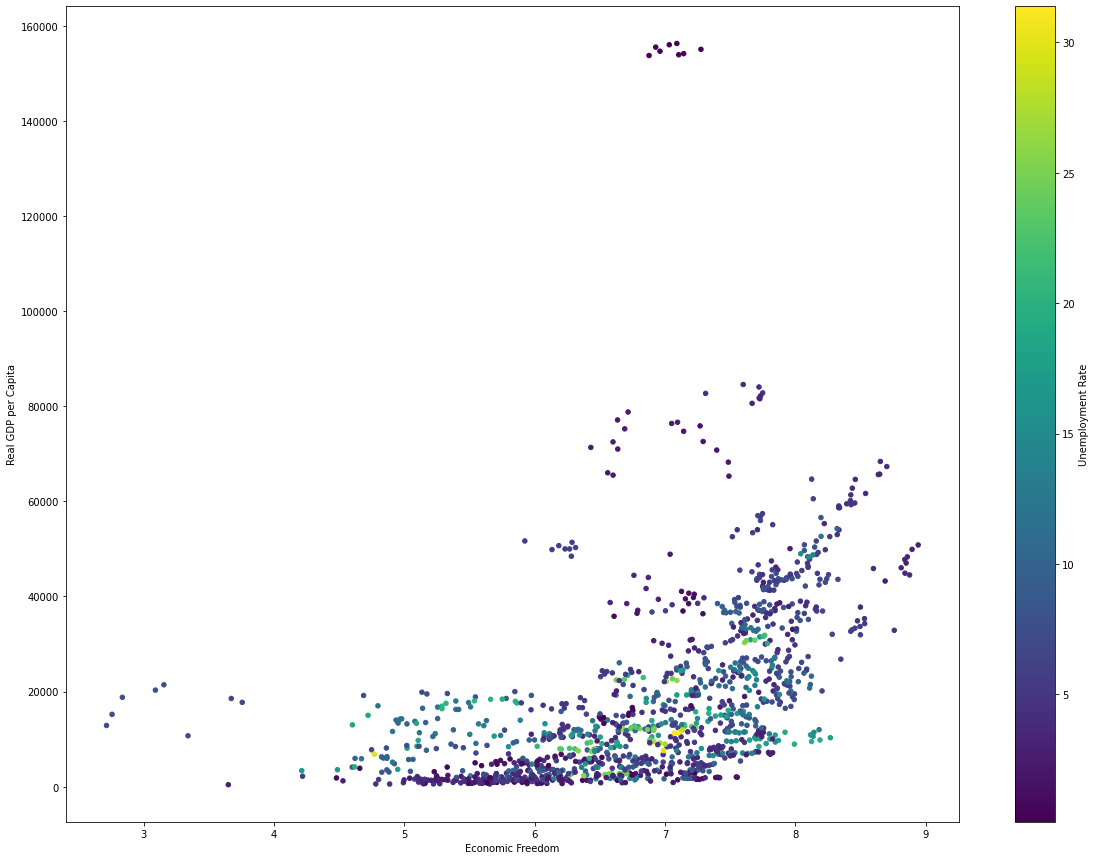

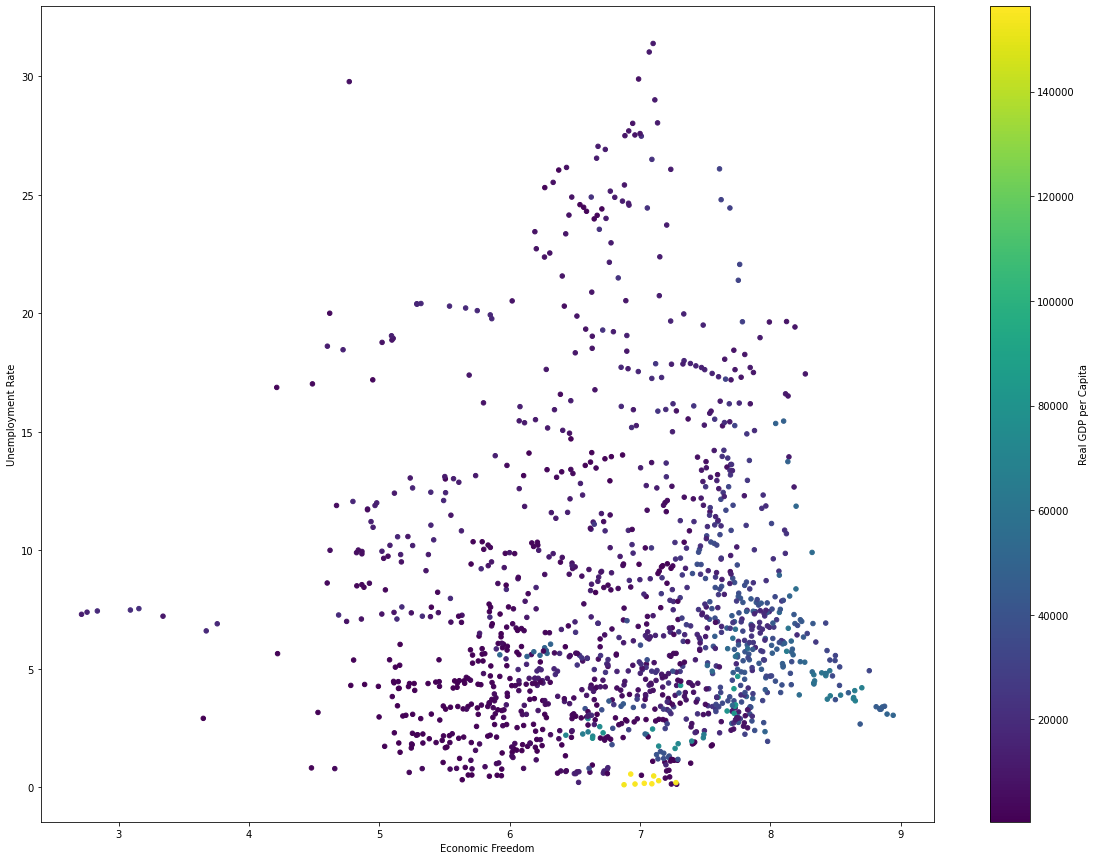

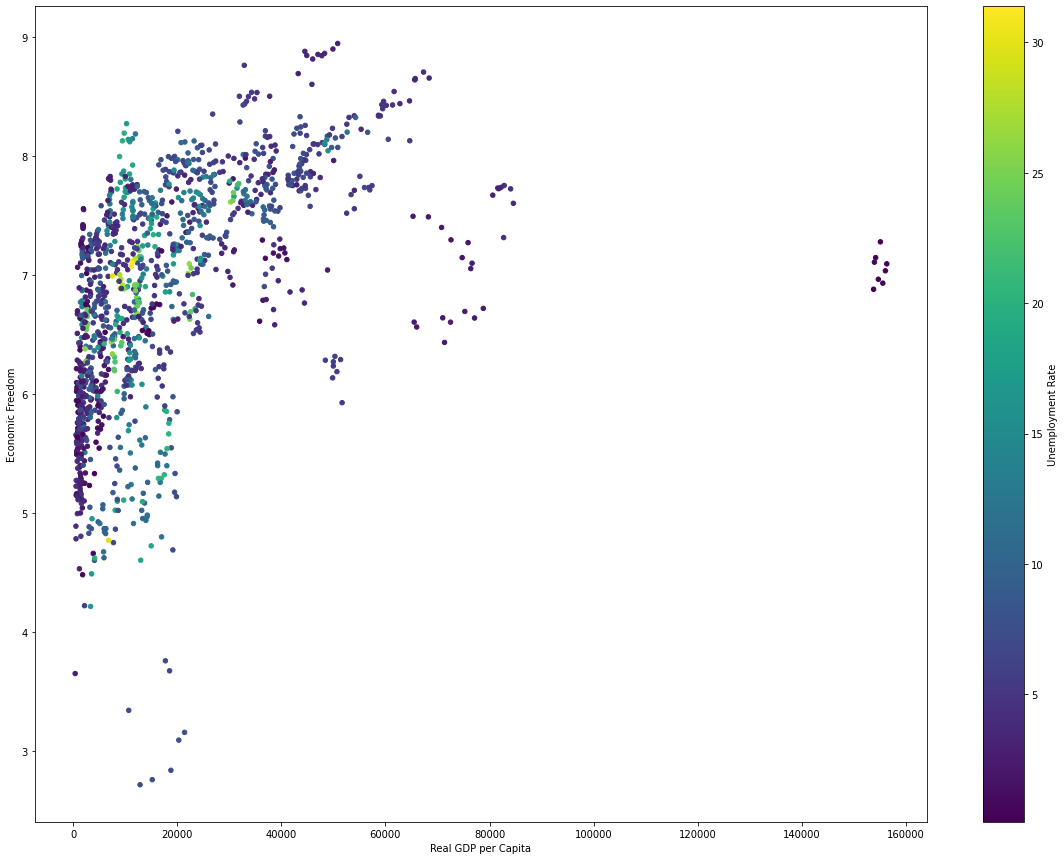

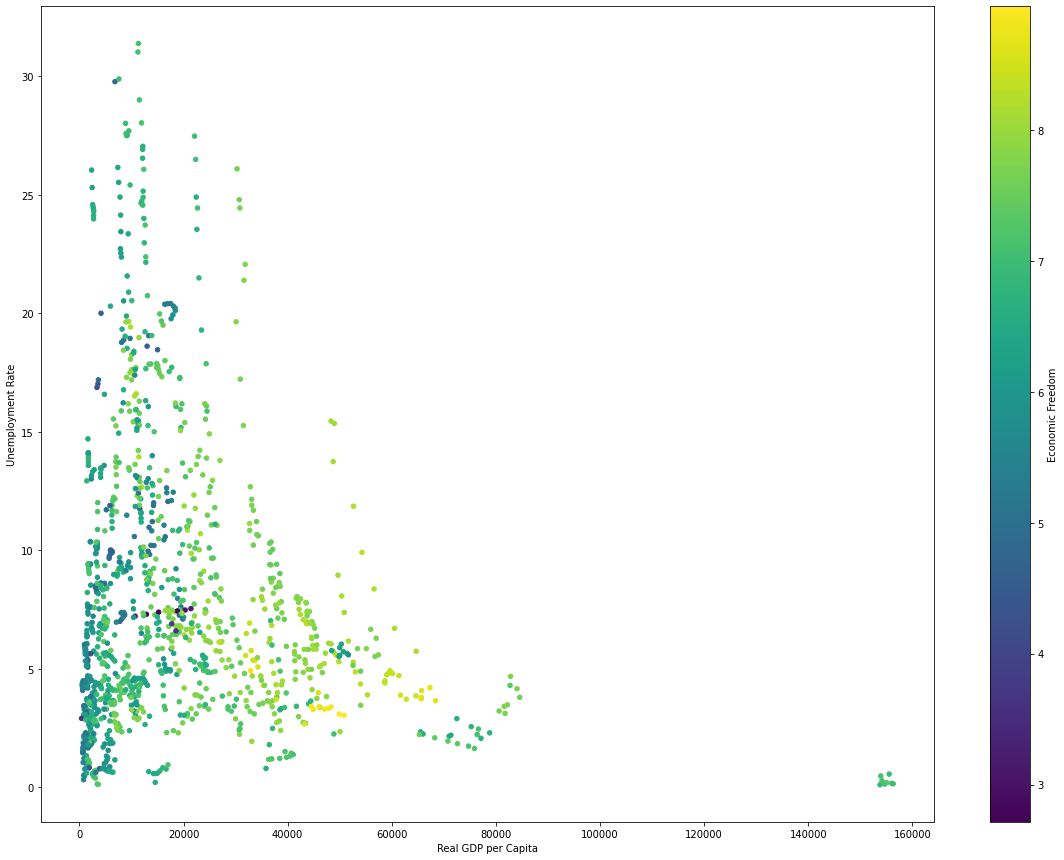

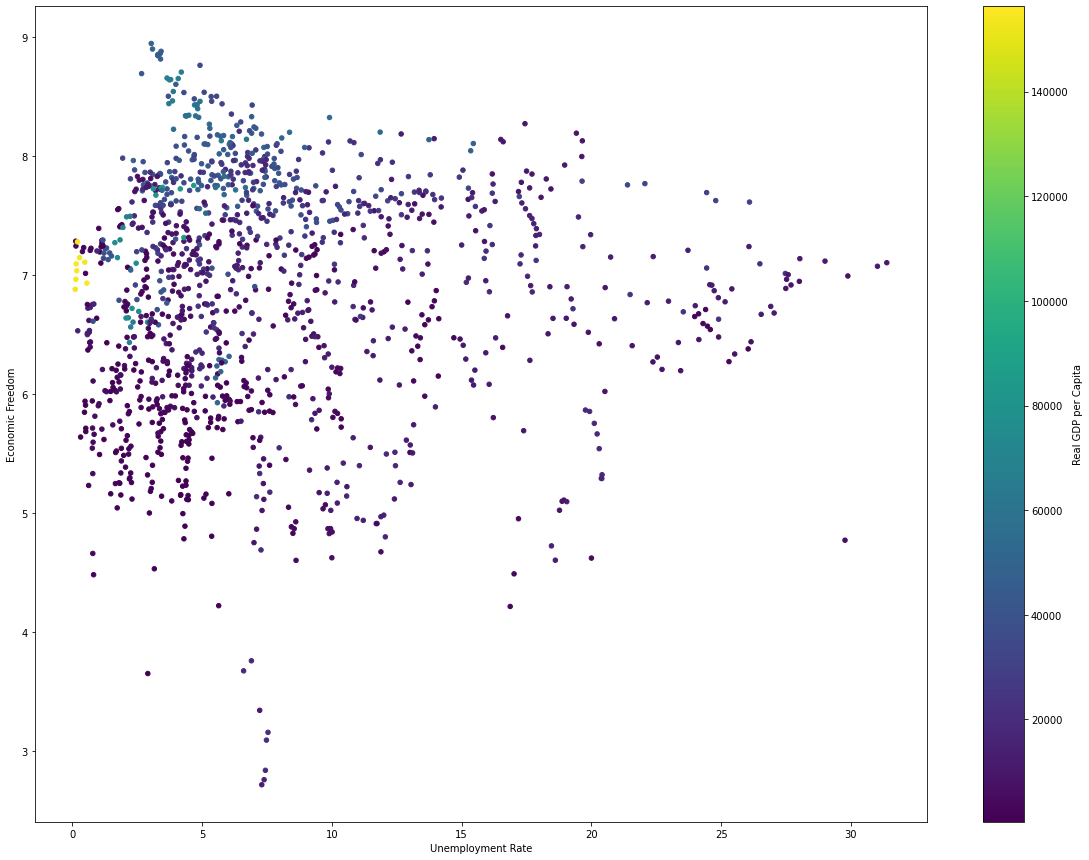

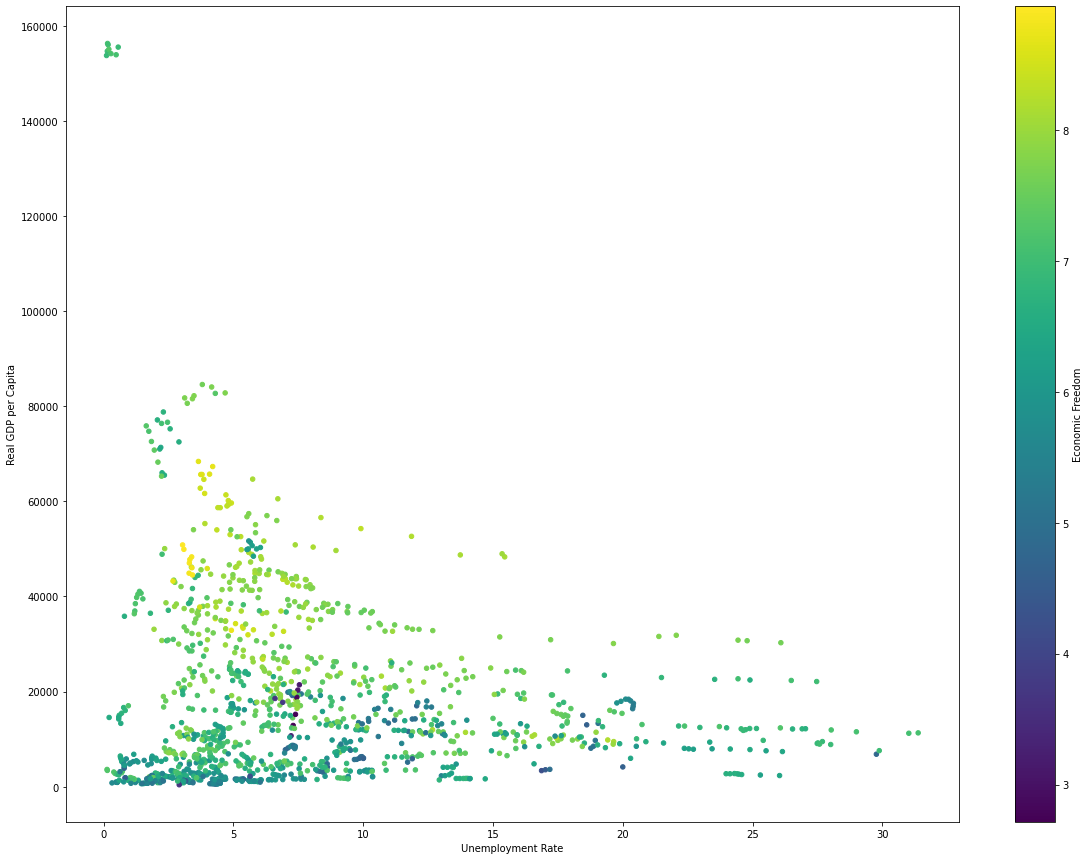

In [44]:
fraser_data.rename(columns={"Summary":"Economic Freedom",
                            "gdppc":"Real GDP per Capita",
                            "Unemployment": "Unemployment Rate"}, inplace=True)
plot_keys = ["Economic Freedom", "Real GDP per Capita", "Unemployment Rate"]
for key1 in plot_keys:
    for key2 in plot_keys:
        for key3 in plot_keys:
            if key1!= key2 and key1 != key3 and key2 != key3:
                plot_scatter(fraser_data[[key1,key2,key3]].dropna(), key1, key2, key3)